# Code for training with validation
TODO: Implement early stopping with patience

In [1]:
import torch
import copy
from sklearn.metrics import confusion_matrix


def train_model(model, train_data, train_labels, test_data, test_labels, epochs, batch_size, loss_func, optimizer):
    
    print("Epoch\t train loss\t test acc")
    for epoch in range(epochs):
        epoch_train_loss = 0
        model.train() # Set model to train mode
        
        for i in range(len(train_data)//batch_size): # BATCH SIZE MUST BE EVEN DIVIDER OF DATA LEN, otherwise we miss stuff here
            start = i*batch_size
            end = (i+1)*batch_size

            train_inputs = train_data[start:end]
            train_truth = train_labels[start:end]
            train_outputs = model(train_inputs)

            loss = loss_func(train_outputs, train_truth)
            
            #print("LOSS: ", loss)
            epoch_train_loss += loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        

        model.eval() # Set model to evaluation mode

        test_accuracy = accuracy_check(model, test_data, test_labels)

        trainloss=epoch_train_loss.item()/(len(train_data)//batch_size)
        print("{0}\t{1:.2f}\t{2:.2f}".format(epoch, trainloss, test_accuracy))
        
    


def accuracy_check(network, data, labels):
    network.eval()

    # Accuracy check
    r = network(data)
    p = torch.max(r,1)[1]
    c = torch.sum(p == labels)
    acc = c.item()/len(p)
    #print("ACCURACY:", acc)
    return(acc)

def get_conf_matrix(model, data, labels):
    confusion_matrix = np.zeros((4,4))
    model.eval()
    prediction = model(data)
    for i in range(len(data)):
        guess = torch.argmax(prediction[i], dim=-1)
        confusion_matrix[labels[i].item(), guess.item()] += 1
    
    return confusion_matrix

def save_model(model, name):
    filename = 'models/' + name
    f = open(filename,'w')
    torch.save(model, f)
    

Loading subject  1
Epoch	 train loss	 test acc
0	1.80	0.25
1	1.16	0.25
2	0.88	0.25
3	0.74	0.25
4	0.48	0.25
5	0.28	0.25
6	0.20	0.25
7	0.10	0.25
8	0.07	0.25
9	0.04	0.25
10	0.03	0.15
11	0.02	0.20
12	0.02	0.25
13	0.02	0.25
14	0.01	0.28
15	0.01	0.28
16	0.01	0.30
17	0.01	0.30
18	0.01	0.28
19	0.01	0.28
20	0.01	0.28
21	0.01	0.28
22	0.01	0.28
23	0.00	0.28
24	0.00	0.25
25	0.00	0.23
26	0.00	0.25
27	0.00	0.23
28	0.00	0.25
29	0.00	0.23
30	0.00	0.25
31	0.00	0.25
32	0.00	0.25
33	0.00	0.25
34	0.00	0.25
35	0.00	0.25
36	0.00	0.25
37	0.00	0.25
38	0.00	0.25
39	0.00	0.23
40	0.00	0.23
41	0.00	0.23
42	0.00	0.23
43	0.00	0.23
44	0.00	0.23
45	0.00	0.23
46	0.00	0.23
47	0.00	0.23
48	0.00	0.23
49	0.00	0.23


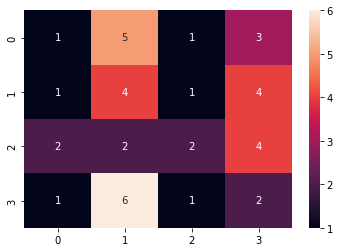

Epoch	 train loss	 test acc
0	1.73	0.25
1	1.20	0.25
2	0.96	0.25
3	0.70	0.25
4	0.43	0.25
5	0.35	0.25
6	0.20	0.25
7	0.12	0.25
8	0.05	0.25
9	0.04	0.20
10	0.03	0.23
11	0.02	0.20
12	0.02	0.23
13	0.01	0.23
14	0.01	0.25
15	0.01	0.25
16	0.01	0.23
17	0.01	0.23
18	0.01	0.23
19	0.01	0.25
20	0.01	0.23
21	0.01	0.23
22	0.01	0.23
23	0.00	0.23
24	0.01	0.25
25	0.01	0.25
26	0.00	0.23
27	0.00	0.25
28	0.00	0.23
29	0.00	0.23
30	0.00	0.25
31	0.00	0.23
32	0.00	0.25
33	0.00	0.23
34	0.00	0.20
35	0.00	0.17
36	0.00	0.17
37	0.00	0.17
38	0.00	0.17
39	0.00	0.20
40	0.00	0.23
41	0.00	0.23
42	0.00	0.20
43	0.00	0.23
44	0.00	0.23
45	0.00	0.23
46	0.00	0.23
47	0.00	0.23
48	0.00	0.23
49	0.00	0.23


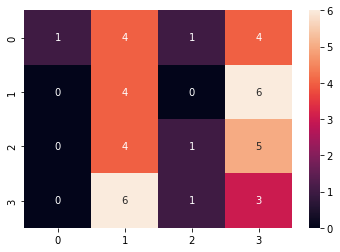

Epoch	 train loss	 test acc
0	1.88	0.25
1	1.12	0.25
2	0.80	0.25
3	0.64	0.25
4	0.50	0.25
5	0.33	0.25
6	0.27	0.25
7	0.12	0.25
8	0.05	0.25
9	0.03	0.23
10	0.03	0.12
11	0.02	0.20
12	0.02	0.23
13	0.02	0.28
14	0.01	0.28
15	0.01	0.25
16	0.01	0.25
17	0.01	0.28
18	0.01	0.28
19	0.01	0.25
20	0.01	0.25
21	0.01	0.25
22	0.01	0.25
23	0.00	0.28
24	0.00	0.25
25	0.00	0.25
26	0.00	0.23
27	0.00	0.23
28	0.00	0.25
29	0.00	0.23
30	0.00	0.23
31	0.00	0.23
32	0.00	0.23
33	0.00	0.23
34	0.00	0.23
35	0.00	0.23
36	0.00	0.23
37	0.00	0.23
38	0.00	0.25
39	0.00	0.25
40	0.00	0.23
41	0.00	0.23
42	0.00	0.25
43	0.00	0.25
44	0.00	0.25
45	0.00	0.25
46	0.00	0.23
47	0.00	0.25
48	0.00	0.28
49	0.00	0.23


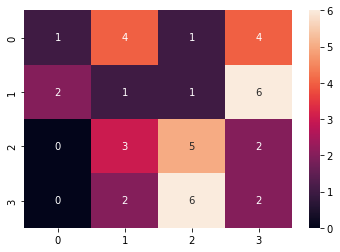

Epoch	 train loss	 test acc
0	1.90	0.25
1	1.23	0.25
2	0.84	0.25
3	0.56	0.25
4	0.38	0.25
5	0.27	0.25
6	0.23	0.25
7	0.14	0.25
8	0.09	0.25
9	0.04	0.35
10	0.03	0.33
11	0.02	0.28
12	0.01	0.28
13	0.01	0.25
14	0.01	0.23
15	0.01	0.23
16	0.01	0.23
17	0.01	0.28
18	0.01	0.25
19	0.01	0.23
20	0.01	0.23
21	0.01	0.23
22	0.00	0.23
23	0.00	0.25
24	0.00	0.25
25	0.00	0.23
26	0.00	0.23
27	0.00	0.25
28	0.00	0.25
29	0.00	0.25
30	0.00	0.25
31	0.00	0.23
32	0.00	0.30
33	0.00	0.30
34	0.00	0.25
35	0.00	0.25
36	0.00	0.25
37	0.00	0.25
38	0.00	0.25
39	0.00	0.28
40	0.00	0.28
41	0.00	0.23
42	0.00	0.23
43	0.00	0.20
44	0.00	0.23
45	0.00	0.23
46	0.00	0.23
47	0.00	0.23
48	0.00	0.23
49	0.00	0.23


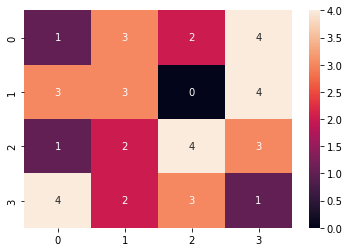

Epoch	 train loss	 test acc
0	1.84	0.25
1	1.21	0.25
2	0.86	0.25
3	0.58	0.25
4	0.37	0.25
5	0.25	0.25
6	0.20	0.25
7	0.15	0.25
8	0.06	0.25
9	0.04	0.25
10	0.02	0.25
11	0.02	0.20
12	0.02	0.17
13	0.01	0.28
14	0.01	0.25
15	0.01	0.20
16	0.01	0.25
17	0.01	0.25
18	0.01	0.28
19	0.01	0.25
20	0.00	0.23
21	0.00	0.23
22	0.00	0.25
23	0.00	0.23
24	0.00	0.25
25	0.00	0.25
26	0.00	0.25
27	0.00	0.25
28	0.00	0.23
29	0.00	0.23
30	0.00	0.23
31	0.00	0.25
32	0.00	0.25
33	0.00	0.25
34	0.00	0.20
35	0.00	0.23
36	0.00	0.23
37	0.00	0.23
38	0.00	0.25
39	0.00	0.25
40	0.00	0.23
41	0.00	0.23
42	0.00	0.23
43	0.00	0.25
44	0.00	0.23
45	0.00	0.23
46	0.00	0.25
47	0.00	0.28
48	0.00	0.25
49	0.00	0.23


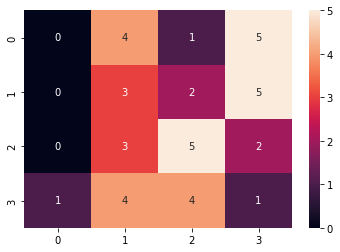

Loading subject  2
Epoch	 train loss	 test acc
0	1.84	0.25
1	1.29	0.25
2	0.79	0.25
3	0.60	0.25
4	0.46	0.25
5	0.34	0.25
6	0.18	0.25
7	0.10	0.25
8	0.08	0.25
9	0.03	0.21
10	0.02	0.23
11	0.01	0.25
12	0.01	0.21
13	0.01	0.21
14	0.01	0.21
15	0.01	0.23
16	0.01	0.23
17	0.00	0.21
18	0.00	0.23
19	0.00	0.21
20	0.00	0.21
21	0.00	0.21
22	0.00	0.21
23	0.00	0.23
24	0.00	0.21
25	0.00	0.21
26	0.00	0.23
27	0.00	0.21
28	0.00	0.21
29	0.00	0.23
30	0.00	0.25
31	0.00	0.25
32	0.00	0.23
33	0.00	0.21
34	0.00	0.23
35	0.00	0.23
36	0.00	0.25
37	0.00	0.23
38	0.00	0.23
39	0.00	0.25
40	0.00	0.23
41	0.00	0.23
42	0.00	0.25
43	0.00	0.25
44	0.00	0.25
45	0.00	0.25
46	0.00	0.25
47	0.00	0.25
48	0.00	0.23
49	0.00	0.23


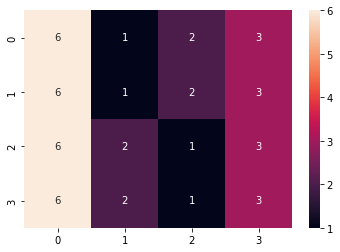

Epoch	 train loss	 test acc
0	1.91	0.25
1	1.18	0.25
2	0.82	0.25
3	0.51	0.25
4	0.36	0.25
5	0.29	0.23
6	0.24	0.25
7	0.21	0.25
8	0.11	0.23
9	0.07	0.27
10	0.03	0.23
11	0.01	0.27
12	0.01	0.27
13	0.01	0.25
14	0.01	0.25
15	0.01	0.25
16	0.00	0.23
17	0.00	0.25
18	0.00	0.25
19	0.00	0.27
20	0.00	0.27
21	0.00	0.27
22	0.00	0.25
23	0.00	0.25
24	0.00	0.27
25	0.00	0.25
26	0.00	0.23
27	0.00	0.23
28	0.00	0.23
29	0.00	0.23
30	0.00	0.23
31	0.00	0.23
32	0.00	0.23
33	0.00	0.23
34	0.00	0.23
35	0.00	0.23
36	0.00	0.25
37	0.00	0.23
38	0.00	0.23
39	0.00	0.23
40	0.00	0.25
41	0.00	0.25
42	0.00	0.25
43	0.00	0.25
44	0.00	0.25
45	0.00	0.25
46	0.00	0.25
47	0.00	0.25
48	0.00	0.25
49	0.00	0.25


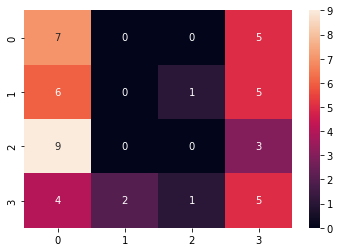

Epoch	 train loss	 test acc
0	1.86	0.25
1	1.05	0.25
2	0.79	0.25
3	0.57	0.25
4	0.40	0.25
5	0.27	0.25
6	0.24	0.25
7	0.18	0.25
8	0.10	0.25
9	0.06	0.27
10	0.02	0.29
11	0.01	0.25
12	0.01	0.25
13	0.01	0.23
14	0.01	0.23
15	0.01	0.23
16	0.00	0.25
17	0.00	0.25
18	0.00	0.25
19	0.00	0.25
20	0.00	0.25
21	0.00	0.25
22	0.00	0.23
23	0.00	0.21
24	0.00	0.23
25	0.00	0.21
26	0.00	0.21
27	0.00	0.23
28	0.00	0.23
29	0.00	0.25
30	0.00	0.23
31	0.00	0.21
32	0.00	0.21
33	0.00	0.23
34	0.00	0.19
35	0.00	0.21
36	0.00	0.21
37	0.00	0.21
38	0.00	0.21
39	0.00	0.21
40	0.00	0.21
41	0.00	0.23
42	0.00	0.25
43	0.00	0.25
44	0.00	0.25
45	0.00	0.25
46	0.00	0.25
47	0.00	0.25
48	0.00	0.23
49	0.00	0.23


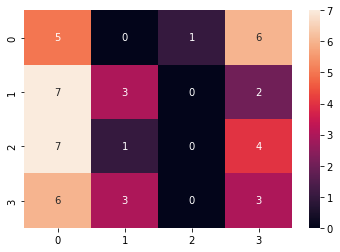

Epoch	 train loss	 test acc
0	2.00	0.25
1	1.13	0.25
2	0.72	0.25
3	0.48	0.25
4	0.35	0.25
5	0.31	0.25
6	0.22	0.25
7	0.14	0.25
8	0.08	0.25
9	0.04	0.27
10	0.02	0.29
11	0.01	0.31
12	0.01	0.35
13	0.01	0.38
14	0.01	0.38
15	0.01	0.38
16	0.01	0.35
17	0.00	0.38
18	0.00	0.35
19	0.00	0.38
20	0.00	0.40
21	0.00	0.38
22	0.00	0.35
23	0.00	0.38
24	0.00	0.38
25	0.00	0.38
26	0.00	0.38
27	0.00	0.38
28	0.00	0.38
29	0.00	0.40
30	0.00	0.40
31	0.00	0.40
32	0.00	0.40
33	0.00	0.40
34	0.00	0.38
35	0.00	0.38
36	0.00	0.38
37	0.00	0.38
38	0.00	0.38
39	0.00	0.40
40	0.00	0.40
41	0.00	0.40
42	0.00	0.38
43	0.00	0.38
44	0.00	0.38
45	0.00	0.38
46	0.00	0.38
47	0.00	0.38
48	0.00	0.38
49	0.00	0.35


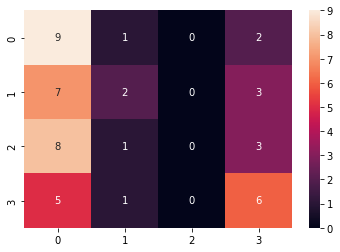

Epoch	 train loss	 test acc
0	1.83	0.25
1	1.25	0.25
2	0.86	0.25
3	0.60	0.25
4	0.45	0.25
5	0.39	0.25
6	0.27	0.25
7	0.16	0.25
8	0.09	0.25
9	0.04	0.25
10	0.02	0.40
11	0.01	0.46
12	0.01	0.44
13	0.01	0.44
14	0.01	0.40
15	0.01	0.40
16	0.01	0.44
17	0.01	0.42
18	0.00	0.42
19	0.00	0.44
20	0.00	0.42
21	0.00	0.42
22	0.00	0.42
23	0.00	0.42
24	0.00	0.42
25	0.00	0.42
26	0.00	0.44
27	0.00	0.42
28	0.00	0.42
29	0.00	0.42
30	0.00	0.42
31	0.00	0.42
32	0.00	0.42
33	0.00	0.42
34	0.00	0.42
35	0.00	0.42
36	0.00	0.44
37	0.00	0.44
38	0.00	0.42
39	0.00	0.42
40	0.00	0.44
41	0.00	0.42
42	0.00	0.44
43	0.00	0.44
44	0.00	0.44
45	0.00	0.44
46	0.00	0.44
47	0.00	0.44
48	0.00	0.44
49	0.00	0.44


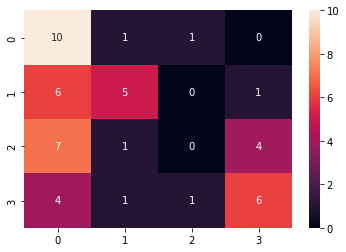

Loading subject  3
Epoch	 train loss	 test acc
0	1.86	0.25
1	1.33	0.25
2	0.92	0.25
3	0.67	0.25
4	0.41	0.25
5	0.30	0.25
6	0.16	0.25
7	0.17	0.25
8	0.14	0.25
9	0.14	0.25
10	0.05	0.25
11	0.03	0.25
12	0.03	0.25
13	0.02	0.25
14	0.01	0.25
15	0.01	0.25
16	0.01	0.25
17	0.01	0.28
18	0.01	0.28
19	0.01	0.28
20	0.00	0.28
21	0.00	0.25
22	0.00	0.25
23	0.00	0.25
24	0.00	0.22
25	0.00	0.22
26	0.00	0.25
27	0.00	0.22
28	0.00	0.22
29	0.00	0.25
30	0.00	0.22
31	0.00	0.25
32	0.00	0.25
33	0.00	0.28
34	0.00	0.31
35	0.00	0.28
36	0.00	0.28
37	0.00	0.25
38	0.00	0.25
39	0.00	0.25
40	0.00	0.25
41	0.00	0.25
42	0.00	0.25
43	0.00	0.22
44	0.00	0.25
45	0.00	0.22
46	0.00	0.25
47	0.00	0.25
48	0.00	0.22
49	0.00	0.22


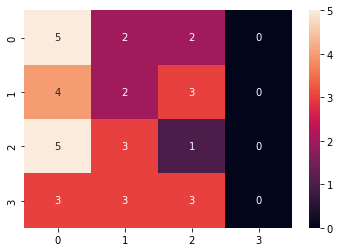

Epoch	 train loss	 test acc
0	1.96	0.25
1	1.35	0.25
2	0.84	0.25
3	0.54	0.25
4	0.38	0.25
5	0.22	0.25
6	0.16	0.25
7	0.12	0.25
8	0.11	0.25
9	0.05	0.28
10	0.03	0.31
11	0.02	0.25
12	0.02	0.25
13	0.01	0.28
14	0.01	0.28
15	0.01	0.28
16	0.01	0.28
17	0.01	0.31
18	0.01	0.31
19	0.01	0.28
20	0.01	0.28
21	0.01	0.28
22	0.00	0.28
23	0.01	0.33
24	0.00	0.33
25	0.00	0.33
26	0.00	0.28
27	0.00	0.33
28	0.00	0.28
29	0.00	0.28
30	0.00	0.33
31	0.00	0.36
32	0.00	0.33
33	0.00	0.33
34	0.00	0.31
35	0.00	0.28
36	0.00	0.28
37	0.00	0.28
38	0.00	0.28
39	0.00	0.28
40	0.00	0.28
41	0.00	0.28
42	0.00	0.28
43	0.00	0.28
44	0.00	0.28
45	0.00	0.28
46	0.00	0.28
47	0.00	0.28
48	0.00	0.28
49	0.00	0.28


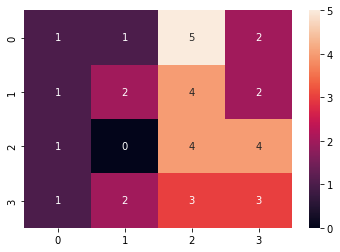

Epoch	 train loss	 test acc
0	1.84	0.25
1	1.29	0.25
2	0.93	0.25
3	0.75	0.25
4	0.47	0.25
5	0.33	0.25
6	0.24	0.25
7	0.17	0.25
8	0.07	0.25
9	0.04	0.25
10	0.03	0.28
11	0.02	0.25
12	0.02	0.33
13	0.01	0.33
14	0.01	0.36
15	0.01	0.31
16	0.01	0.25
17	0.01	0.28
18	0.01	0.25
19	0.01	0.25
20	0.01	0.25
21	0.00	0.25
22	0.01	0.25
23	0.01	0.28
24	0.01	0.31
25	0.00	0.25
26	0.00	0.28
27	0.00	0.25
28	0.00	0.28
29	0.00	0.28
30	0.00	0.31
31	0.00	0.28
32	0.00	0.31
33	0.00	0.31
34	0.00	0.31
35	0.00	0.33
36	0.01	0.25
37	0.01	0.28
38	0.00	0.33
39	0.00	0.25
40	0.00	0.33
41	0.00	0.33
42	0.00	0.28
43	0.00	0.28
44	0.00	0.28
45	0.00	0.28
46	0.00	0.28
47	0.00	0.28
48	0.00	0.28
49	0.00	0.28


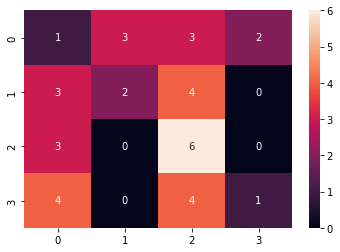

Epoch	 train loss	 test acc
0	2.09	0.25
1	1.29	0.25
2	1.20	0.25
3	0.74	0.25
4	0.50	0.25
5	0.31	0.25
6	0.26	0.25
7	0.19	0.25
8	0.11	0.25
9	0.07	0.33
10	0.04	0.25
11	0.03	0.25
12	0.02	0.22
13	0.02	0.31
14	0.02	0.28
15	0.01	0.36
16	0.01	0.39
17	0.01	0.33
18	0.01	0.31
19	0.01	0.31
20	0.01	0.31
21	0.01	0.28
22	0.00	0.33
23	0.00	0.33
24	0.00	0.33
25	0.00	0.31
26	0.00	0.36
27	0.00	0.33
28	0.00	0.31
29	0.00	0.36
30	0.00	0.36
31	0.00	0.36
32	0.00	0.31
33	0.00	0.31
34	0.00	0.31
35	0.00	0.33
36	0.00	0.33
37	0.00	0.33
38	0.00	0.31
39	0.00	0.31
40	0.00	0.31
41	0.00	0.33
42	0.00	0.31
43	0.00	0.33
44	0.00	0.36
45	0.00	0.36
46	0.00	0.36
47	0.00	0.36
48	0.00	0.33
49	0.00	0.33


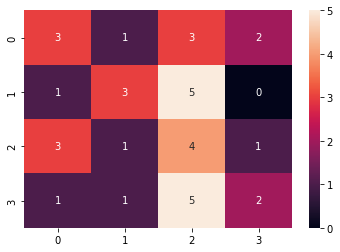

Epoch	 train loss	 test acc
0	1.92	0.25
1	1.28	0.25
2	0.80	0.25
3	0.50	0.25
4	0.33	0.25
5	0.20	0.25
6	0.15	0.25
7	0.11	0.25
8	0.06	0.25
9	0.04	0.25
10	0.03	0.25
11	0.02	0.25
12	0.02	0.25
13	0.01	0.22
14	0.01	0.25
15	0.01	0.22
16	0.01	0.25
17	0.01	0.25
18	0.01	0.25
19	0.01	0.22
20	0.01	0.22
21	0.01	0.22
22	0.00	0.25
23	0.00	0.25
24	0.00	0.25
25	0.00	0.25
26	0.00	0.25
27	0.00	0.25
28	0.00	0.25
29	0.00	0.25
30	0.00	0.25
31	0.00	0.25
32	0.00	0.25
33	0.00	0.25
34	0.00	0.25
35	0.00	0.25
36	0.00	0.25
37	0.00	0.25
38	0.00	0.25
39	0.00	0.25
40	0.00	0.25
41	0.00	0.25
42	0.00	0.25
43	0.00	0.25
44	0.00	0.25
45	0.00	0.25
46	0.00	0.25
47	0.00	0.25
48	0.00	0.25
49	0.00	0.25


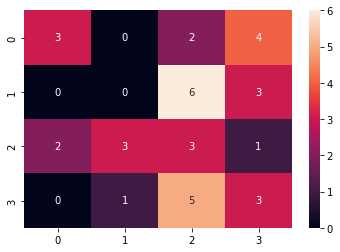

Loading subject  4
Epoch	 train loss	 test acc
0	1.93	0.25
1	1.32	0.25
2	0.95	0.25
3	0.73	0.25
4	0.54	0.25
5	0.47	0.25
6	0.44	0.25
7	0.49	0.25
8	0.29	0.25
9	0.25	0.29
10	0.10	0.25
11	0.05	0.25
12	0.02	0.21
13	0.02	0.19
14	0.01	0.19
15	0.01	0.19
16	0.01	0.19
17	0.01	0.19
18	0.01	0.19
19	0.01	0.19
20	0.01	0.19
21	0.00	0.19
22	0.00	0.21
23	0.00	0.21
24	0.00	0.19
25	0.00	0.19
26	0.00	0.19
27	0.00	0.19
28	0.00	0.19
29	0.00	0.21
30	0.00	0.21
31	0.00	0.19
32	0.00	0.19
33	0.00	0.21
34	0.00	0.19
35	0.00	0.21
36	0.00	0.21
37	0.00	0.21
38	0.00	0.21
39	0.00	0.23
40	0.00	0.23
41	0.00	0.23
42	0.00	0.23
43	0.00	0.21
44	0.00	0.21
45	0.00	0.19
46	0.00	0.19
47	0.00	0.21
48	0.00	0.19
49	0.00	0.19


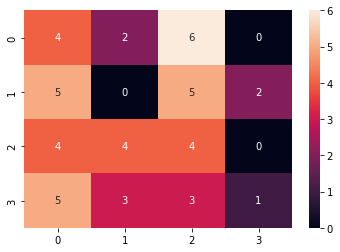

Epoch	 train loss	 test acc
0	1.83	0.25
1	1.31	0.25
2	0.96	0.25
3	0.68	0.25
4	0.53	0.25
5	0.47	0.25
6	0.41	0.25
7	0.26	0.25
8	0.26	0.25
9	0.11	0.25
10	0.07	0.23
11	0.03	0.31
12	0.02	0.31
13	0.01	0.29
14	0.01	0.31
15	0.01	0.29
16	0.01	0.31
17	0.01	0.31
18	0.01	0.27
19	0.01	0.27
20	0.01	0.31
21	0.01	0.31
22	0.00	0.31
23	0.01	0.31
24	0.00	0.31
25	0.00	0.31
26	0.00	0.31
27	0.00	0.31
28	0.00	0.31
29	0.00	0.31
30	0.00	0.31
31	0.00	0.29
32	0.00	0.31
33	0.00	0.31
34	0.00	0.29
35	0.00	0.29
36	0.00	0.29
37	0.00	0.29
38	0.00	0.29
39	0.00	0.29
40	0.00	0.29
41	0.00	0.29
42	0.00	0.31
43	0.00	0.31
44	0.00	0.29
45	0.00	0.31
46	0.00	0.31
47	0.00	0.31
48	0.00	0.31
49	0.00	0.29


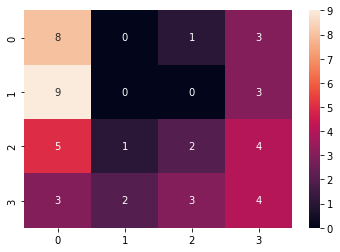

Epoch	 train loss	 test acc
0	2.00	0.25
1	1.24	0.25
2	0.87	0.25
3	0.64	0.25
4	0.43	0.25
5	0.38	0.25
6	0.43	0.25
7	0.36	0.25
8	0.30	0.25
9	0.29	0.25
10	0.16	0.29
11	0.09	0.27
12	0.04	0.29
13	0.03	0.31
14	0.01	0.31
15	0.01	0.33
16	0.01	0.31
17	0.01	0.33
18	0.01	0.33
19	0.01	0.31
20	0.01	0.33
21	0.01	0.33
22	0.01	0.33
23	0.01	0.33
24	0.00	0.33
25	0.00	0.31
26	0.00	0.33
27	0.00	0.33
28	0.00	0.33
29	0.00	0.31
30	0.00	0.31
31	0.00	0.31
32	0.00	0.31
33	0.00	0.33
34	0.00	0.33
35	0.00	0.31
36	0.00	0.31
37	0.00	0.33
38	0.00	0.33
39	0.00	0.33
40	0.00	0.33
41	0.00	0.33
42	0.00	0.31
43	0.00	0.31
44	0.00	0.31
45	0.00	0.33
46	0.00	0.33
47	0.00	0.33
48	0.00	0.33
49	0.00	0.33


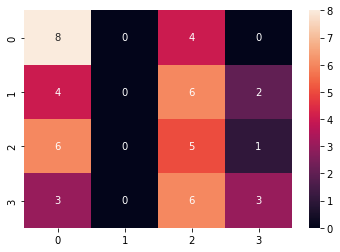

Epoch	 train loss	 test acc
0	1.89	0.25
1	1.31	0.25
2	0.88	0.25
3	0.63	0.25
4	0.46	0.25
5	0.43	0.25
6	0.45	0.25
7	0.39	0.25
8	0.28	0.27
9	0.22	0.29
10	0.16	0.25
11	0.08	0.25
12	0.03	0.25
13	0.02	0.25
14	0.01	0.25
15	0.01	0.25
16	0.01	0.25
17	0.01	0.23
18	0.01	0.23
19	0.01	0.25
20	0.01	0.23
21	0.01	0.23
22	0.01	0.23
23	0.00	0.23
24	0.00	0.23
25	0.00	0.25
26	0.00	0.25
27	0.00	0.25
28	0.00	0.23
29	0.00	0.23
30	0.00	0.25
31	0.00	0.25
32	0.00	0.25
33	0.00	0.23
34	0.00	0.23
35	0.00	0.23
36	0.00	0.23
37	0.00	0.23
38	0.00	0.23
39	0.00	0.25
40	0.00	0.21
41	0.00	0.25
42	0.00	0.23
43	0.00	0.23
44	0.00	0.23
45	0.00	0.23
46	0.00	0.25
47	0.00	0.25
48	0.00	0.25
49	0.00	0.27


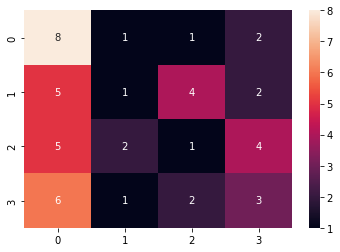

Epoch	 train loss	 test acc
0	1.99	0.25
1	1.27	0.25
2	0.90	0.25
3	0.65	0.25
4	0.51	0.25
5	0.37	0.25
6	0.32	0.25
7	0.28	0.25
8	0.26	0.25
9	0.21	0.23
10	0.20	0.21
11	0.12	0.25
12	0.06	0.17
13	0.02	0.21
14	0.01	0.21
15	0.01	0.19
16	0.01	0.17
17	0.01	0.17
18	0.01	0.19
19	0.01	0.17
20	0.01	0.17
21	0.00	0.17
22	0.00	0.17
23	0.00	0.17
24	0.00	0.17
25	0.00	0.19
26	0.00	0.19
27	0.00	0.17
28	0.00	0.17
29	0.00	0.17
30	0.00	0.17
31	0.00	0.17
32	0.00	0.17
33	0.00	0.17
34	0.00	0.17
35	0.00	0.17
36	0.00	0.17
37	0.00	0.17
38	0.00	0.17
39	0.00	0.17
40	0.00	0.17
41	0.00	0.17
42	0.00	0.17
43	0.00	0.17
44	0.00	0.17
45	0.00	0.17
46	0.00	0.17
47	0.00	0.17
48	0.00	0.17
49	0.00	0.17


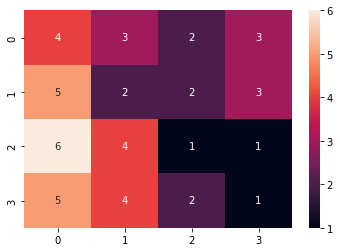

Loading subject  5
Epoch	 train loss	 test acc
0	1.78	0.25
1	1.16	0.25
2	0.79	0.25
3	0.60	0.25
4	0.54	0.25
5	0.52	0.25
6	0.37	0.25
7	0.22	0.25
8	0.10	0.31
9	0.06	0.35
10	0.02	0.25
11	0.01	0.27
12	0.01	0.25
13	0.01	0.25
14	0.01	0.27
15	0.01	0.25
16	0.01	0.27
17	0.01	0.23
18	0.01	0.25
19	0.01	0.25
20	0.00	0.23
21	0.01	0.25
22	0.00	0.23
23	0.00	0.25
24	0.00	0.25
25	0.00	0.25
26	0.00	0.25
27	0.00	0.25
28	0.00	0.25
29	0.00	0.25
30	0.00	0.25
31	0.00	0.25
32	0.00	0.25
33	0.00	0.25
34	0.00	0.25
35	0.00	0.25
36	0.00	0.25
37	0.00	0.25
38	0.00	0.25
39	0.00	0.27
40	0.00	0.23
41	0.00	0.23
42	0.00	0.23
43	0.00	0.23
44	0.00	0.25
45	0.00	0.25
46	0.00	0.23
47	0.00	0.23
48	0.00	0.25
49	0.00	0.25


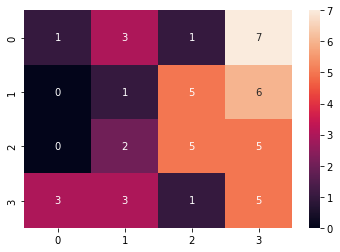

Epoch	 train loss	 test acc
0	1.86	0.25
1	1.23	0.25
2	0.84	0.25
3	0.64	0.25
4	0.47	0.25
5	0.38	0.25
6	0.37	0.25
7	0.28	0.27
8	0.16	0.25
9	0.08	0.33
10	0.04	0.33
11	0.03	0.31
12	0.02	0.31
13	0.01	0.35
14	0.01	0.33
15	0.01	0.33
16	0.01	0.31
17	0.01	0.33
18	0.01	0.31
19	0.00	0.29
20	0.01	0.31
21	0.01	0.31
22	0.01	0.29
23	0.00	0.31
24	0.00	0.31
25	0.00	0.31
26	0.00	0.31
27	0.00	0.31
28	0.00	0.31
29	0.00	0.27
30	0.00	0.31
31	0.00	0.29
32	0.00	0.29
33	0.00	0.27
34	0.00	0.27
35	0.00	0.29
36	0.00	0.31
37	0.00	0.27
38	0.00	0.27
39	0.00	0.31
40	0.00	0.29
41	0.00	0.29
42	0.00	0.27
43	0.00	0.29
44	0.00	0.29
45	0.00	0.27
46	0.00	0.25
47	0.00	0.27
48	0.00	0.31
49	0.00	0.31


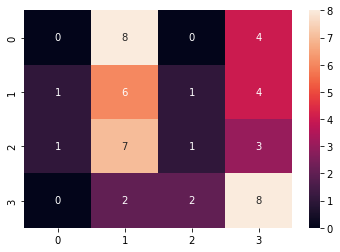

Epoch	 train loss	 test acc
0	1.83	0.25
1	1.29	0.25
2	0.91	0.25
3	0.69	0.25
4	0.55	0.25
5	0.55	0.25
6	0.33	0.25
7	0.21	0.25
8	0.13	0.25
9	0.06	0.25
10	0.03	0.25
11	0.02	0.23
12	0.01	0.25
13	0.01	0.25
14	0.01	0.25
15	0.01	0.27
16	0.01	0.27
17	0.01	0.27
18	0.01	0.27
19	0.01	0.27
20	0.01	0.29
21	0.00	0.29
22	0.00	0.29
23	0.00	0.29
24	0.00	0.29
25	0.00	0.27
26	0.00	0.27
27	0.00	0.27
28	0.00	0.27
29	0.00	0.27
30	0.00	0.27
31	0.00	0.27
32	0.00	0.27
33	0.00	0.27
34	0.00	0.27
35	0.00	0.27
36	0.00	0.27
37	0.00	0.27
38	0.00	0.27
39	0.00	0.27
40	0.00	0.27
41	0.00	0.27
42	0.00	0.27
43	0.00	0.27
44	0.00	0.27
45	0.00	0.27
46	0.00	0.27
47	0.00	0.27
48	0.00	0.27
49	0.00	0.27


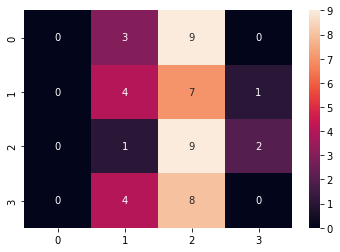

Epoch	 train loss	 test acc
0	1.89	0.25
1	1.26	0.25
2	0.77	0.25
3	0.54	0.25
4	0.44	0.25
5	0.32	0.25
6	0.37	0.25
7	0.27	0.17
8	0.16	0.23
9	0.13	0.27
10	0.05	0.29
11	0.03	0.29
12	0.02	0.31
13	0.01	0.33
14	0.01	0.29
15	0.01	0.35
16	0.01	0.29
17	0.01	0.33
18	0.01	0.31
19	0.01	0.33
20	0.01	0.31
21	0.00	0.31
22	0.00	0.33
23	0.00	0.29
24	0.00	0.31
25	0.00	0.31
26	0.00	0.31
27	0.00	0.31
28	0.00	0.29
29	0.00	0.29
30	0.00	0.33
31	0.00	0.33
32	0.00	0.31
33	0.00	0.29
34	0.00	0.33
35	0.00	0.31
36	0.00	0.31
37	0.00	0.31
38	0.00	0.31
39	0.00	0.33
40	0.00	0.33
41	0.00	0.29
42	0.00	0.33
43	0.00	0.33
44	0.00	0.33
45	0.00	0.33
46	0.00	0.33
47	0.00	0.33
48	0.00	0.31
49	0.00	0.31


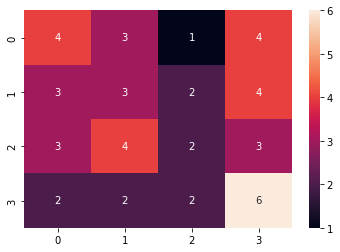

Epoch	 train loss	 test acc
0	1.85	0.25
1	1.37	0.25
2	0.93	0.25
3	0.74	0.25
4	0.60	0.25
5	0.48	0.25
6	0.40	0.25
7	0.30	0.31
8	0.17	0.27
9	0.07	0.38
10	0.03	0.33
11	0.02	0.31
12	0.02	0.31
13	0.01	0.33
14	0.01	0.33
15	0.01	0.31
16	0.01	0.31
17	0.01	0.31
18	0.01	0.31
19	0.01	0.31
20	0.00	0.29
21	0.00	0.29
22	0.00	0.31
23	0.00	0.31
24	0.00	0.31
25	0.00	0.31
26	0.00	0.31
27	0.00	0.31
28	0.00	0.31
29	0.00	0.31
30	0.00	0.31
31	0.00	0.31
32	0.00	0.31
33	0.00	0.31
34	0.00	0.31
35	0.00	0.29
36	0.00	0.31
37	0.00	0.31
38	0.00	0.31
39	0.00	0.31
40	0.00	0.31
41	0.00	0.35
42	0.00	0.35
43	0.00	0.33
44	0.00	0.33
45	0.00	0.31
46	0.00	0.31
47	0.00	0.31
48	0.00	0.33
49	0.00	0.33


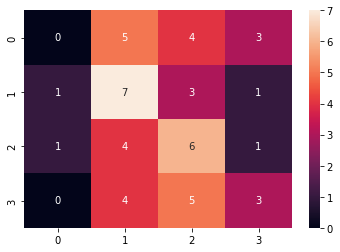

Loading subject  6
Epoch	 train loss	 test acc
0	1.92	0.25
1	1.15	0.25
2	0.79	0.25
3	0.50	0.25
4	0.36	0.25
5	0.25	0.25
6	0.14	0.25
7	0.07	0.25
8	0.04	0.25
9	0.02	0.25
10	0.01	0.25
11	0.01	0.23
12	0.01	0.27
13	0.01	0.30
14	0.01	0.30
15	0.01	0.27
16	0.00	0.30
17	0.00	0.27
18	0.00	0.27
19	0.00	0.27
20	0.00	0.25
21	0.00	0.25
22	0.00	0.25
23	0.00	0.25
24	0.00	0.23
25	0.00	0.27
26	0.00	0.23
27	0.00	0.25
28	0.00	0.23
29	0.00	0.27
30	0.00	0.27
31	0.00	0.25
32	0.00	0.30
33	0.00	0.27
34	0.00	0.27
35	0.00	0.27
36	0.00	0.27
37	0.00	0.27
38	0.00	0.25
39	0.00	0.27
40	0.00	0.27
41	0.00	0.23
42	0.00	0.27
43	0.00	0.23
44	0.00	0.23
45	0.00	0.23
46	0.00	0.25
47	0.00	0.27
48	0.00	0.27
49	0.00	0.27


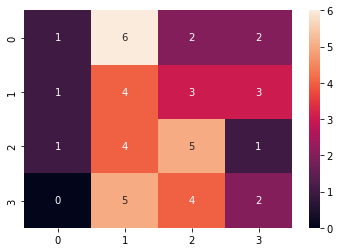

Epoch	 train loss	 test acc
0	2.07	0.26
1	1.19	0.26
2	0.65	0.26
3	0.38	0.26
4	0.28	0.26
5	0.24	0.26
6	0.10	0.26
7	0.05	0.26
8	0.03	0.26
9	0.02	0.26
10	0.02	0.23
11	0.01	0.12
12	0.01	0.16
13	0.01	0.12
14	0.01	0.12
15	0.01	0.12
16	0.01	0.14
17	0.00	0.14
18	0.00	0.12
19	0.00	0.14
20	0.00	0.16
21	0.00	0.16
22	0.00	0.19
23	0.00	0.19
24	0.00	0.19
25	0.00	0.19
26	0.00	0.19
27	0.00	0.19
28	0.00	0.19
29	0.00	0.19
30	0.00	0.16
31	0.00	0.16
32	0.00	0.19
33	0.00	0.19
34	0.00	0.21
35	0.00	0.21
36	0.00	0.21
37	0.00	0.21
38	0.00	0.21
39	0.00	0.19
40	0.00	0.21
41	0.00	0.21
42	0.00	0.19
43	0.00	0.21
44	0.00	0.21
45	0.00	0.21
46	0.00	0.21
47	0.00	0.21
48	0.00	0.21
49	0.00	0.21


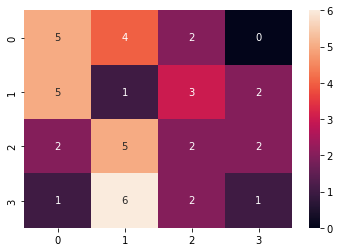

Epoch	 train loss	 test acc
0	2.02	0.26
1	1.14	0.26
2	0.71	0.26
3	0.44	0.26
4	0.24	0.26
5	0.20	0.26
6	0.10	0.26
7	0.06	0.26
8	0.03	0.26
9	0.02	0.26
10	0.01	0.26
11	0.01	0.28
12	0.01	0.30
13	0.01	0.28
14	0.00	0.28
15	0.00	0.28
16	0.00	0.28
17	0.00	0.30
18	0.00	0.30
19	0.00	0.28
20	0.00	0.28
21	0.00	0.28
22	0.00	0.30
23	0.00	0.30
24	0.00	0.30
25	0.00	0.30
26	0.00	0.28
27	0.00	0.28
28	0.00	0.28
29	0.00	0.28
30	0.00	0.28
31	0.00	0.28
32	0.00	0.28
33	0.00	0.28
34	0.00	0.28
35	0.00	0.28
36	0.00	0.28
37	0.00	0.28
38	0.00	0.28
39	0.00	0.28
40	0.00	0.28
41	0.00	0.30
42	0.00	0.28
43	0.00	0.26
44	0.00	0.26
45	0.00	0.26
46	0.00	0.28
47	0.00	0.28
48	0.00	0.28
49	0.00	0.28


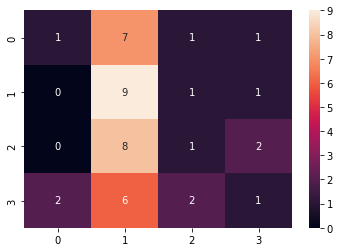

Epoch	 train loss	 test acc
0	1.95	0.23
1	1.33	0.26
2	0.94	0.26
3	0.65	0.26
4	0.36	0.26
5	0.24	0.26
6	0.17	0.26
7	0.11	0.26
8	0.07	0.26
9	0.03	0.26
10	0.02	0.26
11	0.01	0.28
12	0.01	0.28
13	0.01	0.23
14	0.01	0.23
15	0.00	0.26
16	0.01	0.26
17	0.00	0.26
18	0.00	0.23
19	0.00	0.23
20	0.00	0.26
21	0.00	0.23
22	0.00	0.23
23	0.00	0.23
24	0.00	0.23
25	0.00	0.23
26	0.00	0.23
27	0.00	0.23
28	0.00	0.23
29	0.00	0.23
30	0.00	0.23
31	0.00	0.23
32	0.00	0.23
33	0.00	0.23
34	0.00	0.23
35	0.00	0.23
36	0.00	0.23
37	0.00	0.23
38	0.00	0.23
39	0.00	0.23
40	0.00	0.23
41	0.00	0.26
42	0.00	0.23
43	0.00	0.23
44	0.00	0.23
45	0.00	0.23
46	0.00	0.23
47	0.00	0.23
48	0.00	0.23
49	0.00	0.23


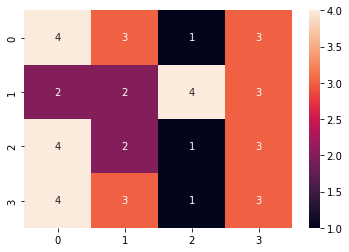

Epoch	 train loss	 test acc
0	1.97	0.26
1	1.40	0.26
2	0.97	0.26
3	0.57	0.26
4	0.35	0.23
5	0.32	0.23
6	0.24	0.26
7	0.12	0.26
8	0.06	0.23
9	0.03	0.21
10	0.02	0.28
11	0.01	0.33
12	0.01	0.35
13	0.01	0.35
14	0.01	0.35
15	0.01	0.33
16	0.00	0.33
17	0.00	0.33
18	0.00	0.37
19	0.00	0.35
20	0.00	0.33
21	0.00	0.30
22	0.00	0.30
23	0.00	0.30
24	0.00	0.28
25	0.00	0.28
26	0.00	0.28
27	0.00	0.30
28	0.00	0.30
29	0.00	0.30
30	0.00	0.30
31	0.00	0.30
32	0.00	0.28
33	0.00	0.28
34	0.00	0.28
35	0.00	0.28
36	0.00	0.30
37	0.00	0.30
38	0.00	0.28
39	0.00	0.28
40	0.00	0.30
41	0.00	0.28
42	0.00	0.30
43	0.00	0.33
44	0.00	0.28
45	0.00	0.28
46	0.00	0.28
47	0.00	0.30
48	0.00	0.28
49	0.00	0.30


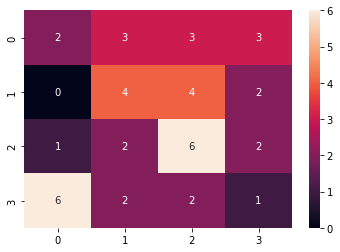

Loading subject  7
Epoch	 train loss	 test acc
0	1.94	0.25
1	1.40	0.25
2	0.85	0.25
3	0.50	0.25
4	0.35	0.25
5	0.33	0.25
6	0.29	0.25
7	0.13	0.23
8	0.08	0.38
9	0.03	0.31
10	0.02	0.33
11	0.01	0.27
12	0.01	0.29
13	0.01	0.29
14	0.01	0.31
15	0.01	0.31
16	0.01	0.31
17	0.01	0.31
18	0.00	0.29
19	0.00	0.29
20	0.00	0.29
21	0.00	0.31
22	0.00	0.27
23	0.00	0.27
24	0.00	0.25
25	0.00	0.29
26	0.00	0.27
27	0.00	0.27
28	0.00	0.29
29	0.00	0.29
30	0.00	0.29
31	0.00	0.29
32	0.00	0.29
33	0.00	0.27
34	0.00	0.29
35	0.00	0.29
36	0.00	0.29
37	0.00	0.27
38	0.00	0.27
39	0.00	0.27
40	0.00	0.25
41	0.00	0.25
42	0.00	0.29
43	0.00	0.27
44	0.00	0.31
45	0.00	0.27
46	0.00	0.27
47	0.00	0.29
48	0.00	0.31
49	0.00	0.31


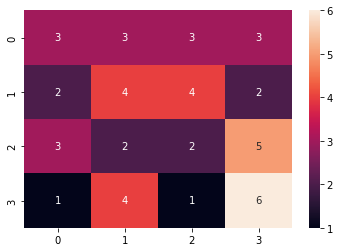

Epoch	 train loss	 test acc
0	2.13	0.25
1	1.17	0.25
2	0.80	0.25
3	0.53	0.25
4	0.36	0.25
5	0.29	0.25
6	0.18	0.25
7	0.18	0.25
8	0.09	0.25
9	0.04	0.25
10	0.02	0.27
11	0.02	0.31
12	0.01	0.33
13	0.01	0.31
14	0.01	0.31
15	0.01	0.31
16	0.01	0.31
17	0.01	0.31
18	0.01	0.31
19	0.00	0.29
20	0.00	0.31
21	0.00	0.31
22	0.00	0.31
23	0.00	0.29
24	0.00	0.29
25	0.00	0.29
26	0.00	0.29
27	0.00	0.29
28	0.00	0.29
29	0.00	0.29
30	0.00	0.29
31	0.00	0.29
32	0.00	0.29
33	0.00	0.29
34	0.00	0.29
35	0.00	0.29
36	0.00	0.29
37	0.00	0.31
38	0.00	0.31
39	0.00	0.29
40	0.00	0.29
41	0.00	0.29
42	0.00	0.29
43	0.00	0.29
44	0.00	0.29
45	0.00	0.29
46	0.00	0.29
47	0.00	0.29
48	0.00	0.31
49	0.00	0.29


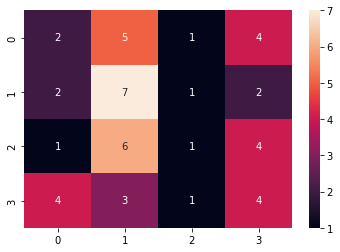

Epoch	 train loss	 test acc
0	1.99	0.25
1	1.34	0.25
2	0.94	0.25
3	0.66	0.25
4	0.45	0.25
5	0.34	0.25
6	0.32	0.25
7	0.17	0.25
8	0.15	0.25
9	0.08	0.33
10	0.04	0.31
11	0.03	0.27
12	0.02	0.38
13	0.01	0.40
14	0.01	0.35
15	0.01	0.35
16	0.01	0.33
17	0.00	0.33
18	0.00	0.33
19	0.01	0.35
20	0.00	0.35
21	0.00	0.35
22	0.00	0.35
23	0.00	0.35
24	0.00	0.31
25	0.00	0.31
26	0.00	0.33
27	0.00	0.33
28	0.00	0.29
29	0.00	0.29
30	0.00	0.29
31	0.00	0.33
32	0.00	0.31
33	0.00	0.31
34	0.00	0.31
35	0.00	0.31
36	0.00	0.31
37	0.00	0.31
38	0.00	0.31
39	0.00	0.29
40	0.00	0.29
41	0.00	0.31
42	0.00	0.31
43	0.00	0.29
44	0.00	0.27
45	0.00	0.27
46	0.00	0.27
47	0.00	0.29
48	0.00	0.29
49	0.00	0.31


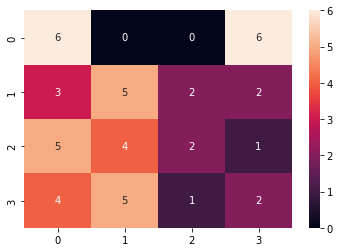

Epoch	 train loss	 test acc
0	1.85	0.25
1	1.38	0.25
2	0.83	0.25
3	0.59	0.25
4	0.42	0.25
5	0.37	0.25
6	0.26	0.25
7	0.20	0.25
8	0.10	0.25
9	0.05	0.21
10	0.03	0.31
11	0.02	0.29
12	0.01	0.29
13	0.01	0.27
14	0.01	0.27
15	0.01	0.27
16	0.01	0.27
17	0.01	0.27
18	0.00	0.27
19	0.00	0.25
20	0.00	0.25
21	0.00	0.23
22	0.00	0.23
23	0.00	0.27
24	0.00	0.27
25	0.00	0.27
26	0.00	0.27
27	0.00	0.25
28	0.00	0.23
29	0.00	0.23
30	0.00	0.25
31	0.00	0.25
32	0.00	0.25
33	0.00	0.25
34	0.00	0.25
35	0.00	0.23
36	0.00	0.23
37	0.00	0.23
38	0.00	0.23
39	0.00	0.23
40	0.00	0.23
41	0.00	0.27
42	0.00	0.27
43	0.00	0.25
44	0.00	0.27
45	0.00	0.27
46	0.00	0.27
47	0.00	0.27
48	0.00	0.27
49	0.00	0.25


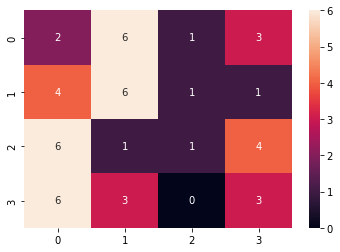

Epoch	 train loss	 test acc
0	2.08	0.25
1	1.29	0.25
2	0.80	0.25
3	0.56	0.25
4	0.37	0.25
5	0.26	0.25
6	0.18	0.25
7	0.12	0.25
8	0.08	0.25
9	0.04	0.25
10	0.03	0.25
11	0.02	0.27
12	0.01	0.25
13	0.01	0.31
14	0.01	0.33
15	0.01	0.29
16	0.01	0.29
17	0.01	0.29
18	0.01	0.25
19	0.01	0.29
20	0.00	0.25
21	0.00	0.27
22	0.00	0.25
23	0.00	0.23
24	0.00	0.33
25	0.00	0.31
26	0.00	0.27
27	0.00	0.29
28	0.00	0.27
29	0.00	0.31
30	0.00	0.29
31	0.00	0.29
32	0.00	0.25
33	0.00	0.25
34	0.00	0.25
35	0.00	0.27
36	0.00	0.25
37	0.00	0.27
38	0.00	0.27
39	0.00	0.25
40	0.00	0.27
41	0.00	0.29
42	0.00	0.29
43	0.00	0.29
44	0.00	0.31
45	0.00	0.31
46	0.00	0.29
47	0.00	0.27
48	0.00	0.27
49	0.00	0.29


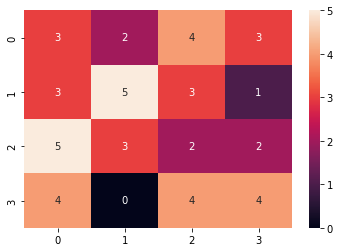

Loading subject  8
Epoch	 train loss	 test acc
0	1.86	0.25
1	1.22	0.25
2	0.92	0.25
3	0.57	0.25
4	0.33	0.25
5	0.20	0.25
6	0.17	0.25
7	0.09	0.25
8	0.07	0.25
9	0.05	0.25
10	0.03	0.33
11	0.02	0.30
12	0.01	0.25
13	0.01	0.33
14	0.01	0.28
15	0.01	0.28
16	0.00	0.28
17	0.01	0.28
18	0.00	0.28
19	0.00	0.28
20	0.00	0.25
21	0.00	0.30
22	0.00	0.30
23	0.00	0.30
24	0.00	0.28
25	0.00	0.28
26	0.00	0.28
27	0.00	0.25
28	0.00	0.28
29	0.00	0.28
30	0.00	0.25
31	0.00	0.25
32	0.00	0.25
33	0.00	0.25
34	0.00	0.28
35	0.00	0.25
36	0.00	0.23
37	0.00	0.23
38	0.00	0.23
39	0.00	0.23
40	0.00	0.23
41	0.00	0.23
42	0.00	0.25
43	0.00	0.28
44	0.00	0.23
45	0.00	0.25
46	0.00	0.23
47	0.00	0.23
48	0.00	0.23
49	0.00	0.23


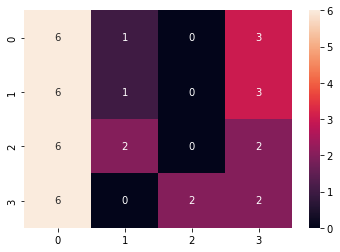

Epoch	 train loss	 test acc
0	1.82	0.25
1	1.11	0.25
2	0.81	0.25
3	0.49	0.25
4	0.31	0.25
5	0.23	0.25
6	0.19	0.25
7	0.17	0.25
8	0.10	0.25
9	0.07	0.28
10	0.03	0.28
11	0.02	0.20
12	0.01	0.23
13	0.01	0.28
14	0.01	0.28
15	0.01	0.28
16	0.01	0.28
17	0.01	0.28
18	0.00	0.28
19	0.01	0.28
20	0.00	0.30
21	0.00	0.28
22	0.00	0.28
23	0.00	0.28
24	0.00	0.28
25	0.00	0.28
26	0.00	0.28
27	0.00	0.28
28	0.00	0.30
29	0.00	0.28
30	0.00	0.28
31	0.00	0.28
32	0.00	0.28
33	0.00	0.28
34	0.00	0.28
35	0.00	0.28
36	0.00	0.28
37	0.00	0.28
38	0.00	0.28
39	0.00	0.28
40	0.00	0.28
41	0.00	0.28
42	0.00	0.28
43	0.00	0.28
44	0.00	0.28
45	0.00	0.28
46	0.00	0.28
47	0.00	0.28
48	0.00	0.28
49	0.00	0.28


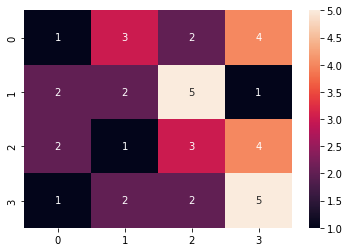

Epoch	 train loss	 test acc
0	1.89	0.25
1	1.05	0.25
2	0.73	0.25
3	0.47	0.25
4	0.27	0.25
5	0.17	0.25
6	0.11	0.25
7	0.08	0.25
8	0.05	0.25
9	0.03	0.25
10	0.02	0.25
11	0.02	0.28
12	0.01	0.30
13	0.01	0.33
14	0.01	0.30
15	0.01	0.30
16	0.01	0.30
17	0.01	0.35
18	0.01	0.38
19	0.00	0.33
20	0.00	0.33
21	0.00	0.33
22	0.00	0.35
23	0.00	0.35
24	0.00	0.33
25	0.00	0.33
26	0.00	0.33
27	0.00	0.30
28	0.00	0.33
29	0.00	0.30
30	0.00	0.30
31	0.00	0.30
32	0.00	0.30
33	0.00	0.30
34	0.00	0.30
35	0.00	0.30
36	0.00	0.30
37	0.00	0.30
38	0.00	0.30
39	0.00	0.30
40	0.00	0.30
41	0.00	0.30
42	0.00	0.30
43	0.00	0.30
44	0.00	0.28
45	0.00	0.30
46	0.00	0.30
47	0.00	0.28
48	0.00	0.30
49	0.00	0.30


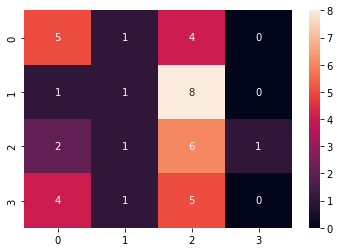

Epoch	 train loss	 test acc
0	1.80	0.25
1	1.09	0.25
2	0.64	0.25
3	0.37	0.25
4	0.22	0.25
5	0.20	0.25
6	0.15	0.25
7	0.07	0.25
8	0.05	0.28
9	0.02	0.30
10	0.02	0.25
11	0.01	0.28
12	0.01	0.28
13	0.01	0.35
14	0.01	0.35
15	0.01	0.33
16	0.00	0.33
17	0.00	0.33
18	0.00	0.33
19	0.00	0.33
20	0.00	0.33
21	0.00	0.33
22	0.00	0.33
23	0.00	0.33
24	0.00	0.33
25	0.00	0.35
26	0.00	0.35
27	0.00	0.33
28	0.00	0.30
29	0.00	0.33
30	0.00	0.35
31	0.00	0.30
32	0.00	0.30
33	0.00	0.30
34	0.00	0.33
35	0.00	0.30
36	0.00	0.30
37	0.00	0.28
38	0.00	0.28
39	0.00	0.28
40	0.00	0.28
41	0.00	0.28
42	0.00	0.28
43	0.00	0.28
44	0.00	0.28
45	0.00	0.28
46	0.00	0.28
47	0.00	0.28
48	0.00	0.28
49	0.00	0.28


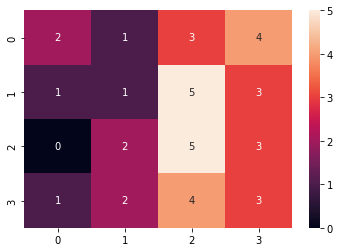

Epoch	 train loss	 test acc
0	1.84	0.25
1	1.13	0.25
2	0.72	0.25
3	0.40	0.25
4	0.24	0.25
5	0.18	0.25
6	0.12	0.25
7	0.08	0.25
8	0.04	0.25
9	0.03	0.25
10	0.01	0.25
11	0.01	0.25
12	0.01	0.25
13	0.01	0.25
14	0.01	0.25
15	0.01	0.28
16	0.00	0.28
17	0.00	0.25
18	0.00	0.25
19	0.00	0.23
20	0.00	0.25
21	0.00	0.25
22	0.00	0.25
23	0.00	0.25
24	0.00	0.28
25	0.00	0.25
26	0.00	0.28
27	0.00	0.25
28	0.00	0.25
29	0.00	0.25
30	0.00	0.25
31	0.00	0.25
32	0.00	0.23
33	0.00	0.23
34	0.00	0.23
35	0.00	0.25
36	0.00	0.23
37	0.00	0.23
38	0.00	0.23
39	0.00	0.25
40	0.00	0.25
41	0.00	0.23
42	0.00	0.23
43	0.00	0.23
44	0.00	0.23
45	0.00	0.23
46	0.00	0.23
47	0.00	0.23
48	0.00	0.23
49	0.00	0.23


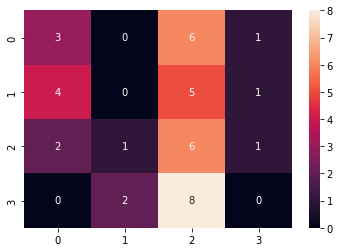

Loading subject  9
Epoch	 train loss	 test acc
0	1.96	0.25
1	1.20	0.25
2	0.73	0.25
3	0.48	0.25
4	0.34	0.25
5	0.34	0.25
6	0.15	0.25
7	0.11	0.27
8	0.05	0.21
9	0.03	0.27
10	0.02	0.31
11	0.01	0.31
12	0.01	0.31
13	0.01	0.29
14	0.01	0.29
15	0.01	0.25
16	0.01	0.27
17	0.01	0.27
18	0.01	0.27
19	0.01	0.27
20	0.01	0.29
21	0.00	0.29
22	0.00	0.29
23	0.00	0.27
24	0.00	0.27
25	0.00	0.27
26	0.00	0.29
27	0.00	0.29
28	0.00	0.27
29	0.00	0.27
30	0.00	0.27
31	0.00	0.27
32	0.00	0.27
33	0.00	0.29
34	0.00	0.27
35	0.00	0.27
36	0.00	0.27
37	0.00	0.29
38	0.00	0.29
39	0.00	0.29
40	0.00	0.29
41	0.00	0.31
42	0.00	0.29
43	0.00	0.29
44	0.00	0.29
45	0.00	0.27
46	0.00	0.25
47	0.00	0.31
48	0.00	0.31
49	0.00	0.31


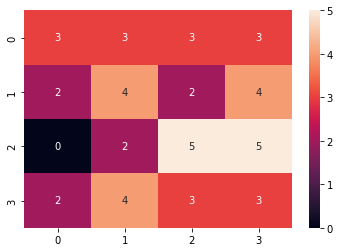

Epoch	 train loss	 test acc
0	1.92	0.25
1	1.26	0.25
2	0.88	0.25
3	0.53	0.25
4	0.36	0.25
5	0.30	0.25
6	0.22	0.25
7	0.29	0.25
8	0.28	0.25
9	0.31	0.23
10	0.18	0.25
11	0.06	0.19
12	0.04	0.17
13	0.02	0.19
14	0.01	0.19
15	0.01	0.17
16	0.01	0.15
17	0.01	0.15
18	0.01	0.21
19	0.00	0.15
20	0.00	0.17
21	0.00	0.17
22	0.00	0.15
23	0.00	0.17
24	0.00	0.19
25	0.00	0.15
26	0.00	0.15
27	0.00	0.17
28	0.00	0.17
29	0.00	0.15
30	0.00	0.17
31	0.00	0.17
32	0.00	0.21
33	0.00	0.19
34	0.00	0.19
35	0.00	0.19
36	0.00	0.19
37	0.00	0.21
38	0.00	0.21
39	0.00	0.23
40	0.00	0.21
41	0.00	0.21
42	0.00	0.21
43	0.00	0.23
44	0.00	0.23
45	0.00	0.21
46	0.00	0.21
47	0.00	0.21
48	0.00	0.19
49	0.00	0.21


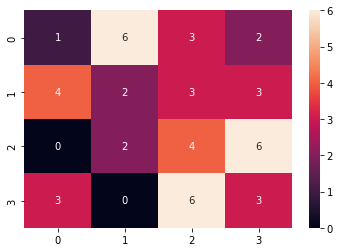

Epoch	 train loss	 test acc
0	1.85	0.25
1	1.33	0.25
2	0.85	0.25
3	0.60	0.25
4	0.34	0.25
5	0.30	0.25
6	0.28	0.27
7	0.20	0.27
8	0.20	0.25
9	0.14	0.31
10	0.08	0.27
11	0.04	0.31
12	0.02	0.29
13	0.01	0.27
14	0.01	0.31
15	0.01	0.29
16	0.01	0.29
17	0.01	0.29
18	0.01	0.29
19	0.01	0.29
20	0.01	0.29
21	0.00	0.29
22	0.00	0.29
23	0.00	0.29
24	0.00	0.29
25	0.00	0.29
26	0.00	0.29
27	0.00	0.29
28	0.00	0.29
29	0.00	0.29
30	0.00	0.29
31	0.00	0.29
32	0.00	0.29
33	0.00	0.29
34	0.00	0.29
35	0.00	0.29
36	0.00	0.29
37	0.00	0.29
38	0.00	0.29
39	0.00	0.29
40	0.00	0.29
41	0.00	0.29
42	0.00	0.29
43	0.00	0.29
44	0.00	0.29
45	0.00	0.29
46	0.00	0.29
47	0.00	0.29
48	0.00	0.29
49	0.00	0.29


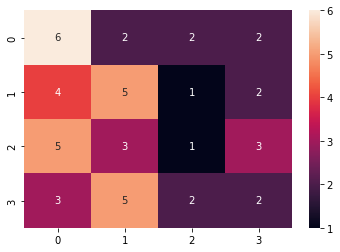

Epoch	 train loss	 test acc
0	1.90	0.25
1	1.25	0.25
2	0.85	0.25
3	0.58	0.25
4	0.35	0.25
5	0.34	0.25
6	0.20	0.19
7	0.14	0.25
8	0.10	0.27
9	0.04	0.27
10	0.02	0.23
11	0.01	0.23
12	0.01	0.23
13	0.01	0.25
14	0.01	0.23
15	0.01	0.23
16	0.01	0.25
17	0.01	0.29
18	0.01	0.27
19	0.00	0.29
20	0.00	0.25
21	0.00	0.25
22	0.00	0.27
23	0.00	0.27
24	0.00	0.29
25	0.00	0.29
26	0.00	0.29
27	0.00	0.29
28	0.00	0.29
29	0.00	0.29
30	0.00	0.29
31	0.00	0.27
32	0.00	0.29
33	0.00	0.27
34	0.00	0.29
35	0.00	0.29
36	0.00	0.29
37	0.00	0.29
38	0.00	0.29
39	0.00	0.29
40	0.00	0.27
41	0.00	0.27
42	0.00	0.27
43	0.00	0.25
44	0.00	0.27
45	0.00	0.25
46	0.00	0.25
47	0.00	0.27
48	0.00	0.25
49	0.00	0.27


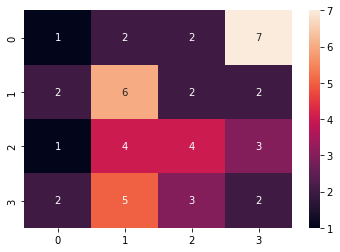

Epoch	 train loss	 test acc
0	1.92	0.25
1	1.41	0.25
2	0.85	0.25
3	0.54	0.25
4	0.34	0.25
5	0.23	0.25
6	0.24	0.25
7	0.19	0.27
8	0.20	0.29
9	0.16	0.25
10	0.09	0.27
11	0.04	0.33
12	0.02	0.33
13	0.01	0.29
14	0.01	0.27
15	0.01	0.31
16	0.01	0.33
17	0.01	0.31
18	0.01	0.27
19	0.00	0.27
20	0.00	0.27
21	0.00	0.29
22	0.00	0.27
23	0.00	0.29
24	0.00	0.29
25	0.00	0.29
26	0.00	0.29
27	0.00	0.27
28	0.00	0.27
29	0.00	0.27
30	0.00	0.27
31	0.00	0.27
32	0.00	0.27
33	0.00	0.29
34	0.00	0.29
35	0.00	0.27
36	0.00	0.29
37	0.00	0.29
38	0.00	0.29
39	0.00	0.27
40	0.00	0.27
41	0.00	0.27
42	0.00	0.29
43	0.00	0.27
44	0.00	0.29
45	0.00	0.29
46	0.00	0.29
47	0.00	0.29
48	0.00	0.29
49	0.00	0.29


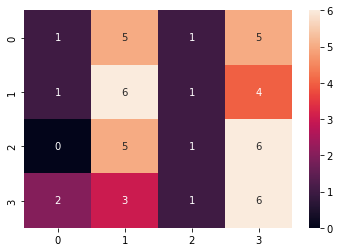

Loading subject  10
Epoch	 train loss	 test acc
0	1.85	0.25
1	1.44	0.25
2	0.99	0.25
3	0.74	0.25
4	0.58	0.25
5	0.43	0.25
6	0.36	0.25
7	0.26	0.25
8	0.19	0.25
9	0.11	0.25
10	0.06	0.31
11	0.03	0.33
12	0.02	0.35
13	0.02	0.29
14	0.02	0.29
15	0.02	0.40
16	0.01	0.33
17	0.01	0.38
18	0.01	0.31
19	0.01	0.29
20	0.01	0.31
21	0.01	0.33
22	0.01	0.33
23	0.00	0.33
24	0.00	0.31
25	0.00	0.29
26	0.00	0.33
27	0.00	0.31
28	0.00	0.31
29	0.00	0.33
30	0.00	0.33
31	0.00	0.29
32	0.00	0.29
33	0.00	0.31
34	0.00	0.29
35	0.00	0.31
36	0.00	0.31
37	0.00	0.29
38	0.00	0.31
39	0.00	0.33
40	0.00	0.31
41	0.00	0.33
42	0.00	0.29
43	0.00	0.27
44	0.00	0.29
45	0.00	0.31
46	0.00	0.31
47	0.00	0.33
48	0.00	0.33
49	0.00	0.31


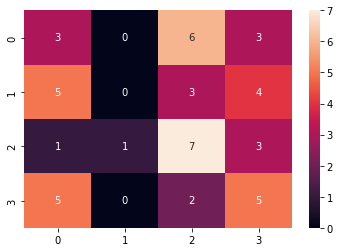

Epoch	 train loss	 test acc
0	1.83	0.25
1	1.26	0.25
2	0.89	0.25
3	0.67	0.25
4	0.46	0.25
5	0.34	0.25
6	0.28	0.25
7	0.22	0.25
8	0.14	0.25
9	0.07	0.31
10	0.06	0.25
11	0.05	0.31
12	0.03	0.25
13	0.02	0.31
14	0.01	0.27
15	0.01	0.23
16	0.01	0.27
17	0.01	0.27
18	0.01	0.27
19	0.01	0.25
20	0.00	0.25
21	0.00	0.25
22	0.00	0.27
23	0.00	0.25
24	0.00	0.23
25	0.00	0.29
26	0.00	0.25
27	0.00	0.25
28	0.00	0.27
29	0.00	0.27
30	0.00	0.29
31	0.00	0.29
32	0.00	0.27
33	0.00	0.27
34	0.00	0.27
35	0.00	0.27
36	0.00	0.27
37	0.00	0.25
38	0.00	0.27
39	0.00	0.27
40	0.00	0.25
41	0.00	0.27
42	0.00	0.27
43	0.00	0.25
44	0.00	0.31
45	0.00	0.29
46	0.00	0.33
47	0.00	0.31
48	0.00	0.29
49	0.00	0.29


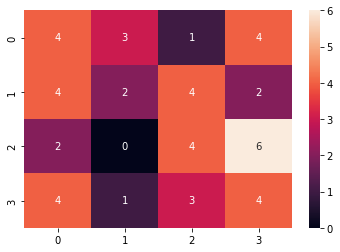

Epoch	 train loss	 test acc
0	1.83	0.25
1	1.31	0.25
2	0.97	0.25
3	0.75	0.25
4	0.53	0.25
5	0.37	0.25
6	0.30	0.25
7	0.19	0.25
8	0.12	0.25
9	0.06	0.25
10	0.04	0.35
11	0.03	0.27
12	0.02	0.27
13	0.02	0.35
14	0.01	0.29
15	0.01	0.33
16	0.01	0.29
17	0.01	0.27
18	0.01	0.29
19	0.00	0.31
20	0.00	0.33
21	0.00	0.33
22	0.00	0.29
23	0.00	0.33
24	0.00	0.29
25	0.00	0.31
26	0.00	0.29
27	0.00	0.29
28	0.00	0.29
29	0.00	0.29
30	0.00	0.29
31	0.00	0.27
32	0.00	0.29
33	0.00	0.31
34	0.00	0.29
35	0.00	0.33
36	0.00	0.23
37	0.00	0.29
38	0.00	0.29
39	0.00	0.27
40	0.00	0.27
41	0.00	0.29
42	0.00	0.31
43	0.00	0.29
44	0.00	0.29
45	0.00	0.27
46	0.00	0.27
47	0.00	0.31
48	0.00	0.29
49	0.00	0.29


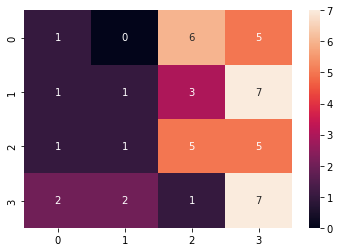

Epoch	 train loss	 test acc
0	1.85	0.25
1	1.32	0.25
2	0.85	0.25
3	0.70	0.25
4	0.56	0.25
5	0.49	0.25
6	0.40	0.25
7	0.28	0.25
8	0.13	0.21
9	0.09	0.29
10	0.06	0.25
11	0.03	0.27
12	0.03	0.35
13	0.02	0.33
14	0.01	0.29
15	0.02	0.27
16	0.01	0.25
17	0.01	0.29
18	0.01	0.29
19	0.01	0.29
20	0.01	0.27
21	0.00	0.27
22	0.00	0.27
23	0.01	0.25
24	0.00	0.25
25	0.00	0.25
26	0.00	0.27
27	0.00	0.27
28	0.00	0.29
29	0.00	0.29
30	0.00	0.25
31	0.00	0.27
32	0.00	0.27
33	0.00	0.25
34	0.00	0.27
35	0.00	0.27
36	0.00	0.27
37	0.00	0.29
38	0.00	0.29
39	0.00	0.27
40	0.00	0.27
41	0.00	0.25
42	0.00	0.27
43	0.00	0.23
44	0.00	0.25
45	0.00	0.25
46	0.00	0.25
47	0.00	0.25
48	0.00	0.27
49	0.00	0.25


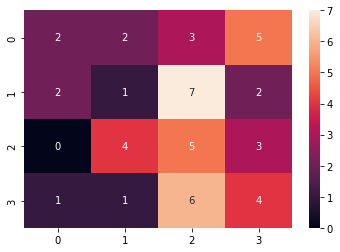

Epoch	 train loss	 test acc
0	1.85	0.25
1	1.23	0.25
2	0.83	0.25
3	0.59	0.25
4	0.41	0.25
5	0.33	0.25
6	0.23	0.25
7	0.28	0.25
8	0.17	0.25
9	0.18	0.25
10	0.09	0.23
11	0.06	0.21
12	0.03	0.27
13	0.02	0.29
14	0.01	0.27
15	0.01	0.27
16	0.01	0.27
17	0.00	0.25
18	0.00	0.27
19	0.00	0.25
20	0.00	0.27
21	0.00	0.29
22	0.00	0.29
23	0.00	0.29
24	0.00	0.29
25	0.00	0.29
26	0.00	0.29
27	0.00	0.29
28	0.00	0.27
29	0.00	0.27
30	0.00	0.27
31	0.00	0.29
32	0.00	0.29
33	0.00	0.29
34	0.00	0.29
35	0.00	0.31
36	0.00	0.31
37	0.00	0.29
38	0.00	0.29
39	0.00	0.29
40	0.00	0.29
41	0.00	0.29
42	0.00	0.29
43	0.00	0.29
44	0.00	0.29
45	0.00	0.31
46	0.00	0.31
47	0.00	0.29
48	0.00	0.29
49	0.00	0.29


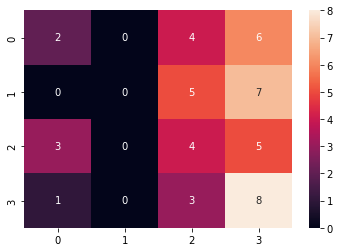

Loading subject  1
Epoch	 train loss	 test acc
0	1.46	0.25
1	1.25	0.25
2	1.12	0.25
3	1.03	0.25
4	0.93	0.25
5	0.82	0.25
6	0.74	0.25
7	0.69	0.25
8	0.63	0.25
9	0.52	0.20
10	0.48	0.25
11	0.43	0.23
12	0.34	0.23
13	0.32	0.30
14	0.29	0.30
15	0.26	0.33
16	0.23	0.30
17	0.20	0.30
18	0.17	0.28
19	0.16	0.30
20	0.13	0.30
21	0.12	0.30
22	0.11	0.30
23	0.09	0.28
24	0.08	0.30
25	0.08	0.30
26	0.08	0.25
27	0.06	0.30
28	0.06	0.30
29	0.05	0.30
30	0.05	0.30
31	0.05	0.30
32	0.05	0.28
33	0.04	0.28
34	0.03	0.28
35	0.04	0.25
36	0.03	0.25
37	0.03	0.25
38	0.03	0.28
39	0.03	0.25
40	0.02	0.28
41	0.02	0.23
42	0.02	0.25
43	0.02	0.25
44	0.02	0.23
45	0.02	0.25
46	0.02	0.28
47	0.02	0.28
48	0.02	0.25
49	0.02	0.25


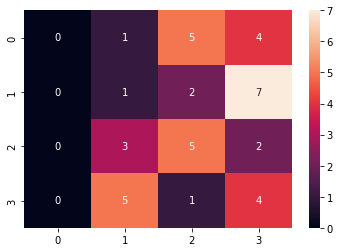

Epoch	 train loss	 test acc
0	1.48	0.25
1	1.26	0.25
2	1.14	0.25
3	1.00	0.25
4	0.88	0.25
5	0.85	0.25
6	0.71	0.25
7	0.66	0.25
8	0.59	0.25
9	0.52	0.25
10	0.46	0.25
11	0.40	0.25
12	0.40	0.12
13	0.29	0.12
14	0.26	0.12
15	0.23	0.12
16	0.21	0.15
17	0.16	0.10
18	0.16	0.12
19	0.13	0.15
20	0.13	0.15
21	0.12	0.12
22	0.11	0.12
23	0.09	0.12
24	0.08	0.12
25	0.08	0.12
26	0.06	0.12
27	0.07	0.12
28	0.06	0.12
29	0.05	0.10
30	0.05	0.12
31	0.04	0.12
32	0.05	0.10
33	0.04	0.10
34	0.03	0.12
35	0.03	0.12
36	0.03	0.12
37	0.03	0.10
38	0.03	0.10
39	0.02	0.12
40	0.03	0.12
41	0.03	0.12
42	0.02	0.10
43	0.02	0.10
44	0.02	0.10
45	0.02	0.10
46	0.02	0.12
47	0.02	0.12
48	0.02	0.12
49	0.02	0.10


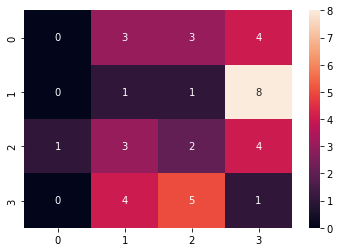

Epoch	 train loss	 test acc
0	1.50	0.25
1	1.29	0.25
2	1.15	0.25
3	1.03	0.25
4	0.95	0.25
5	0.85	0.25
6	0.80	0.25
7	0.72	0.25
8	0.65	0.25
9	0.59	0.25
10	0.51	0.25
11	0.43	0.25
12	0.40	0.23
13	0.36	0.23
14	0.33	0.20
15	0.28	0.23
16	0.21	0.23
17	0.22	0.25
18	0.20	0.25
19	0.19	0.25
20	0.13	0.28
21	0.14	0.28
22	0.12	0.28
23	0.10	0.28
24	0.09	0.28
25	0.09	0.28
26	0.08	0.30
27	0.07	0.30
28	0.08	0.30
29	0.06	0.28
30	0.06	0.30
31	0.05	0.30
32	0.05	0.30
33	0.05	0.30
34	0.04	0.30
35	0.04	0.30
36	0.04	0.30
37	0.04	0.28
38	0.03	0.30
39	0.03	0.30
40	0.03	0.28
41	0.03	0.30
42	0.03	0.30
43	0.02	0.30
44	0.02	0.30
45	0.02	0.28
46	0.02	0.30
47	0.02	0.30
48	0.02	0.30
49	0.02	0.30


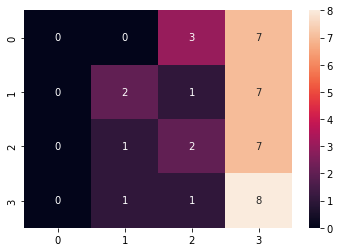

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.24	0.25
2	1.11	0.25
3	1.01	0.25
4	0.94	0.25
5	0.84	0.25
6	0.72	0.25
7	0.68	0.25
8	0.61	0.25
9	0.58	0.25
10	0.47	0.25
11	0.40	0.25
12	0.38	0.30
13	0.32	0.30
14	0.27	0.35
15	0.25	0.35
16	0.21	0.38
17	0.20	0.35
18	0.16	0.38
19	0.14	0.38
20	0.12	0.38
21	0.12	0.40
22	0.10	0.38
23	0.10	0.40
24	0.09	0.40
25	0.08	0.38
26	0.07	0.40
27	0.06	0.38
28	0.06	0.38
29	0.05	0.38
30	0.05	0.38
31	0.04	0.38
32	0.04	0.38
33	0.04	0.38
34	0.03	0.35
35	0.03	0.38
36	0.03	0.38
37	0.03	0.38
38	0.03	0.40
39	0.03	0.40
40	0.02	0.40
41	0.02	0.40
42	0.02	0.35
43	0.02	0.38
44	0.02	0.40
45	0.02	0.40
46	0.02	0.38
47	0.02	0.35
48	0.02	0.38
49	0.01	0.35


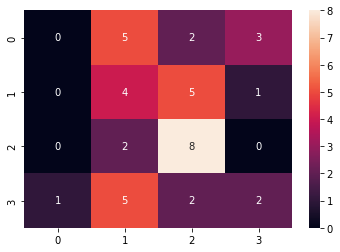

Epoch	 train loss	 test acc
0	1.54	0.25
1	1.25	0.25
2	1.10	0.25
3	1.03	0.25
4	0.94	0.25
5	0.86	0.25
6	0.79	0.25
7	0.68	0.25
8	0.64	0.25
9	0.58	0.25
10	0.52	0.25
11	0.45	0.25
12	0.41	0.25
13	0.35	0.28
14	0.31	0.25
15	0.29	0.25
16	0.25	0.25
17	0.23	0.28
18	0.17	0.25
19	0.19	0.33
20	0.16	0.23
21	0.14	0.25
22	0.12	0.25
23	0.12	0.23
24	0.10	0.25
25	0.10	0.25
26	0.08	0.28
27	0.07	0.25
28	0.07	0.25
29	0.06	0.25
30	0.05	0.25
31	0.05	0.28
32	0.05	0.23
33	0.05	0.25
34	0.04	0.25
35	0.04	0.30
36	0.04	0.28
37	0.04	0.28
38	0.04	0.28
39	0.04	0.23
40	0.03	0.25
41	0.03	0.28
42	0.03	0.25
43	0.03	0.30
44	0.02	0.28
45	0.02	0.28
46	0.02	0.28
47	0.02	0.28
48	0.02	0.30
49	0.02	0.28


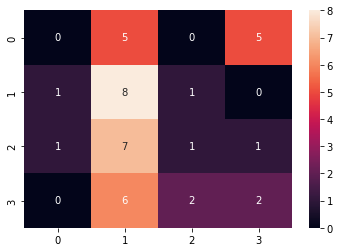

Loading subject  2
Epoch	 train loss	 test acc
0	1.50	0.25
1	1.24	0.25
2	1.08	0.25
3	0.96	0.25
4	0.82	0.25
5	0.75	0.25
6	0.66	0.25
7	0.58	0.25
8	0.49	0.25
9	0.43	0.25
10	0.38	0.25
11	0.30	0.23
12	0.24	0.21
13	0.20	0.21
14	0.17	0.21
15	0.17	0.29
16	0.14	0.25
17	0.11	0.25
18	0.10	0.23
19	0.08	0.25
20	0.08	0.23
21	0.07	0.27
22	0.06	0.27
23	0.06	0.23
24	0.05	0.25
25	0.05	0.25
26	0.04	0.27
27	0.04	0.25
28	0.04	0.25
29	0.03	0.25
30	0.03	0.25
31	0.03	0.27
32	0.03	0.23
33	0.02	0.25
34	0.02	0.25
35	0.02	0.27
36	0.02	0.27
37	0.02	0.25
38	0.02	0.29
39	0.02	0.25
40	0.02	0.27
41	0.01	0.27
42	0.01	0.25
43	0.01	0.25
44	0.01	0.25
45	0.01	0.25
46	0.01	0.25
47	0.01	0.25
48	0.01	0.27
49	0.01	0.27


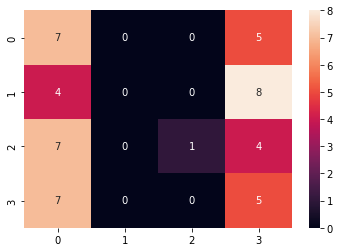

Epoch	 train loss	 test acc
0	1.46	0.25
1	1.20	0.25
2	1.02	0.25
3	0.90	0.25
4	0.81	0.25
5	0.66	0.25
6	0.59	0.25
7	0.49	0.25
8	0.40	0.25
9	0.33	0.25
10	0.29	0.25
11	0.21	0.29
12	0.19	0.25
13	0.16	0.25
14	0.12	0.17
15	0.12	0.17
16	0.10	0.19
17	0.09	0.17
18	0.07	0.19
19	0.06	0.17
20	0.06	0.17
21	0.05	0.17
22	0.05	0.17
23	0.04	0.19
24	0.05	0.21
25	0.04	0.17
26	0.03	0.15
27	0.03	0.19
28	0.03	0.19
29	0.02	0.19
30	0.03	0.19
31	0.02	0.15
32	0.02	0.17
33	0.02	0.17
34	0.02	0.17
35	0.02	0.15
36	0.02	0.15
37	0.01	0.19
38	0.01	0.21
39	0.01	0.19
40	0.01	0.17
41	0.01	0.19
42	0.01	0.21
43	0.01	0.17
44	0.01	0.17
45	0.01	0.19
46	0.01	0.19
47	0.01	0.19
48	0.01	0.21
49	0.01	0.19


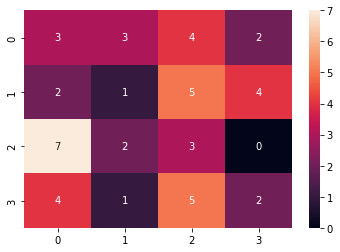

Epoch	 train loss	 test acc
0	1.56	0.25
1	1.20	0.25
2	1.04	0.25
3	0.91	0.25
4	0.78	0.25
5	0.70	0.25
6	0.59	0.25
7	0.48	0.25
8	0.43	0.25
9	0.33	0.25
10	0.28	0.25
11	0.23	0.23
12	0.19	0.25
13	0.17	0.21
14	0.13	0.21
15	0.12	0.19
16	0.09	0.21
17	0.09	0.21
18	0.08	0.19
19	0.07	0.23
20	0.06	0.21
21	0.06	0.21
22	0.05	0.23
23	0.04	0.21
24	0.04	0.23
25	0.04	0.21
26	0.03	0.23
27	0.03	0.25
28	0.03	0.23
29	0.02	0.25
30	0.02	0.23
31	0.02	0.27
32	0.02	0.25
33	0.02	0.25
34	0.02	0.27
35	0.02	0.25
36	0.02	0.25
37	0.02	0.25
38	0.01	0.25
39	0.01	0.25
40	0.01	0.27
41	0.01	0.23
42	0.01	0.23
43	0.01	0.23
44	0.01	0.25
45	0.01	0.23
46	0.01	0.25
47	0.01	0.23
48	0.01	0.21
49	0.01	0.23


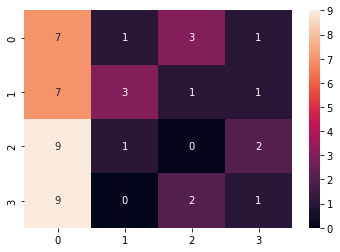

Epoch	 train loss	 test acc
0	1.42	0.25
1	1.14	0.25
2	0.98	0.25
3	0.85	0.25
4	0.74	0.25
5	0.60	0.25
6	0.51	0.25
7	0.40	0.25
8	0.32	0.25
9	0.29	0.25
10	0.24	0.25
11	0.19	0.27
12	0.16	0.27
13	0.13	0.33
14	0.11	0.31
15	0.10	0.29
16	0.08	0.27
17	0.07	0.27
18	0.07	0.29
19	0.06	0.27
20	0.05	0.29
21	0.05	0.29
22	0.04	0.31
23	0.04	0.33
24	0.03	0.33
25	0.03	0.31
26	0.03	0.27
27	0.03	0.31
28	0.02	0.35
29	0.03	0.33
30	0.02	0.33
31	0.02	0.29
32	0.02	0.29
33	0.02	0.33
34	0.01	0.31
35	0.02	0.33
36	0.02	0.33
37	0.01	0.33
38	0.01	0.33
39	0.01	0.33
40	0.01	0.33
41	0.01	0.33
42	0.01	0.33
43	0.01	0.31
44	0.01	0.31
45	0.01	0.33
46	0.01	0.31
47	0.01	0.31
48	0.01	0.33
49	0.01	0.33


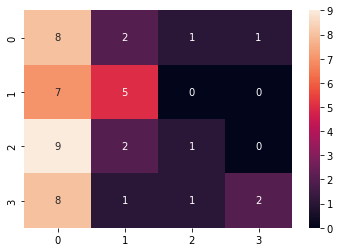

Epoch	 train loss	 test acc
0	1.48	0.25
1	1.21	0.25
2	1.00	0.25
3	0.90	0.25
4	0.79	0.25
5	0.66	0.25
6	0.56	0.25
7	0.46	0.25
8	0.39	0.25
9	0.34	0.25
10	0.27	0.25
11	0.22	0.25
12	0.17	0.27
13	0.16	0.31
14	0.14	0.29
15	0.12	0.31
16	0.11	0.29
17	0.08	0.31
18	0.07	0.29
19	0.06	0.31
20	0.05	0.31
21	0.05	0.29
22	0.05	0.29
23	0.04	0.27
24	0.04	0.27
25	0.04	0.27
26	0.03	0.29
27	0.03	0.27
28	0.02	0.27
29	0.02	0.29
30	0.02	0.29
31	0.02	0.29
32	0.02	0.27
33	0.02	0.27
34	0.02	0.27
35	0.02	0.27
36	0.01	0.27
37	0.01	0.31
38	0.01	0.29
39	0.01	0.29
40	0.01	0.27
41	0.01	0.29
42	0.01	0.29
43	0.01	0.29
44	0.01	0.29
45	0.01	0.27
46	0.01	0.29
47	0.01	0.29
48	0.01	0.31
49	0.01	0.27


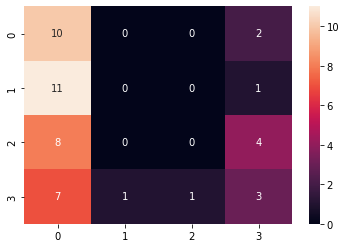

Loading subject  3
Epoch	 train loss	 test acc
0	1.55	0.25
1	1.26	0.25
2	1.21	0.25
3	1.12	0.25
4	1.04	0.25
5	0.96	0.25
6	0.87	0.25
7	0.81	0.25
8	0.72	0.25
9	0.65	0.25
10	0.64	0.25
11	0.60	0.25
12	0.52	0.25
13	0.44	0.25
14	0.39	0.25
15	0.33	0.25
16	0.29	0.22
17	0.28	0.33
18	0.28	0.22
19	0.20	0.28
20	0.19	0.28
21	0.15	0.25
22	0.13	0.28
23	0.13	0.25
24	0.12	0.25
25	0.11	0.25
26	0.10	0.25
27	0.08	0.25
28	0.08	0.25
29	0.07	0.22
30	0.06	0.22
31	0.07	0.28
32	0.05	0.25
33	0.05	0.19
34	0.05	0.25
35	0.04	0.25
36	0.04	0.22
37	0.04	0.28
38	0.04	0.28
39	0.04	0.28
40	0.03	0.22
41	0.03	0.25
42	0.02	0.22
43	0.03	0.25
44	0.02	0.22
45	0.02	0.25
46	0.02	0.22
47	0.02	0.25
48	0.02	0.22
49	0.02	0.22


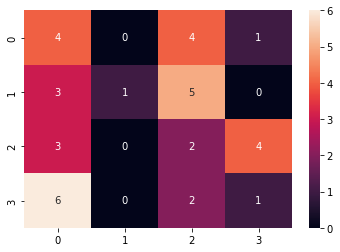

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.22	0.25
2	1.12	0.25
3	1.04	0.25
4	0.95	0.25
5	0.86	0.25
6	0.80	0.25
7	0.71	0.25
8	0.60	0.25
9	0.55	0.25
10	0.45	0.25
11	0.40	0.25
12	0.32	0.25
13	0.33	0.25
14	0.25	0.25
15	0.22	0.25
16	0.18	0.28
17	0.16	0.28
18	0.13	0.19
19	0.12	0.25
20	0.11	0.22
21	0.09	0.25
22	0.08	0.25
23	0.08	0.22
24	0.06	0.25
25	0.06	0.22
26	0.05	0.25
27	0.05	0.22
28	0.05	0.25
29	0.04	0.25
30	0.04	0.25
31	0.03	0.25
32	0.03	0.28
33	0.03	0.28
34	0.03	0.25
35	0.02	0.25
36	0.02	0.25
37	0.02	0.25
38	0.02	0.31
39	0.02	0.25
40	0.02	0.28
41	0.02	0.28
42	0.02	0.28
43	0.02	0.28
44	0.01	0.28
45	0.01	0.28
46	0.01	0.28
47	0.01	0.28
48	0.01	0.22
49	0.01	0.28


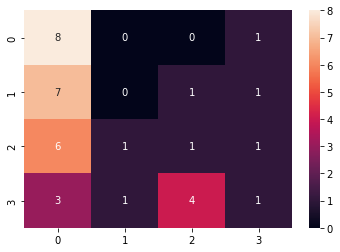

Epoch	 train loss	 test acc
0	1.41	0.25
1	1.27	0.25
2	1.09	0.25
3	1.03	0.25
4	0.92	0.25
5	0.79	0.25
6	0.70	0.25
7	0.64	0.25
8	0.52	0.25
9	0.46	0.25
10	0.39	0.25
11	0.33	0.25
12	0.29	0.25
13	0.25	0.25
14	0.22	0.25
15	0.21	0.22
16	0.18	0.22
17	0.14	0.19
18	0.11	0.14
19	0.11	0.17
20	0.09	0.17
21	0.08	0.17
22	0.08	0.14
23	0.07	0.14
24	0.06	0.14
25	0.06	0.14
26	0.05	0.14
27	0.05	0.17
28	0.05	0.14
29	0.04	0.17
30	0.03	0.14
31	0.03	0.14
32	0.03	0.14
33	0.03	0.14
34	0.03	0.14
35	0.03	0.17
36	0.03	0.14
37	0.02	0.17
38	0.02	0.17
39	0.02	0.17
40	0.02	0.19
41	0.02	0.14
42	0.02	0.17
43	0.02	0.17
44	0.01	0.17
45	0.02	0.17
46	0.01	0.17
47	0.01	0.17
48	0.01	0.17
49	0.01	0.17


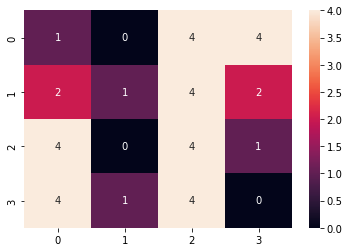

Epoch	 train loss	 test acc
0	1.45	0.25
1	1.23	0.25
2	1.14	0.25
3	1.08	0.25
4	0.98	0.25
5	0.94	0.25
6	0.89	0.25
7	0.80	0.25
8	0.76	0.25
9	0.65	0.25
10	0.59	0.25
11	0.54	0.25
12	0.44	0.25
13	0.38	0.25
14	0.38	0.17
15	0.28	0.14
16	0.26	0.14
17	0.23	0.14
18	0.20	0.17
19	0.17	0.17
20	0.15	0.19
21	0.13	0.17
22	0.12	0.17
23	0.10	0.19
24	0.09	0.17
25	0.08	0.17
26	0.08	0.17
27	0.08	0.14
28	0.07	0.19
29	0.07	0.17
30	0.06	0.19
31	0.05	0.17
32	0.04	0.19
33	0.04	0.19
34	0.04	0.19
35	0.03	0.14
36	0.03	0.19
37	0.03	0.22
38	0.03	0.19
39	0.03	0.17
40	0.02	0.19
41	0.02	0.17
42	0.03	0.22
43	0.02	0.22
44	0.03	0.19
45	0.02	0.17
46	0.02	0.17
47	0.02	0.19
48	0.02	0.19
49	0.02	0.19


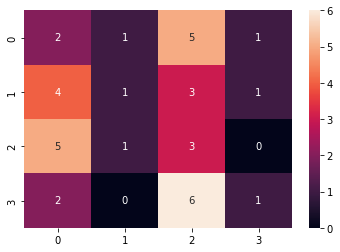

Epoch	 train loss	 test acc
0	1.45	0.25
1	1.24	0.25
2	1.13	0.25
3	1.04	0.25
4	0.93	0.25
5	0.83	0.25
6	0.73	0.25
7	0.70	0.25
8	0.62	0.25
9	0.54	0.25
10	0.48	0.25
11	0.37	0.25
12	0.33	0.25
13	0.31	0.25
14	0.25	0.25
15	0.21	0.25
16	0.19	0.22
17	0.14	0.17
18	0.14	0.17
19	0.12	0.11
20	0.10	0.14
21	0.09	0.14
22	0.09	0.17
23	0.08	0.17
24	0.06	0.19
25	0.06	0.14
26	0.05	0.14
27	0.05	0.14
28	0.04	0.17
29	0.04	0.14
30	0.04	0.17
31	0.04	0.11
32	0.03	0.14
33	0.03	0.17
34	0.03	0.14
35	0.03	0.17
36	0.02	0.19
37	0.02	0.19
38	0.02	0.17
39	0.02	0.17
40	0.02	0.19
41	0.02	0.19
42	0.02	0.17
43	0.02	0.22
44	0.01	0.17
45	0.01	0.19
46	0.01	0.17
47	0.01	0.19
48	0.01	0.17
49	0.01	0.19


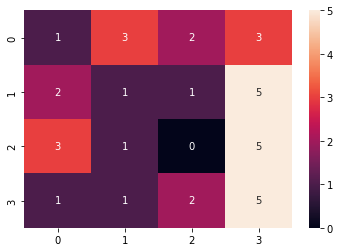

Loading subject  4
Epoch	 train loss	 test acc
0	1.45	0.25
1	1.31	0.25
2	1.20	0.25
3	1.10	0.25
4	1.04	0.25
5	0.97	0.25
6	0.88	0.25
7	0.81	0.25
8	0.73	0.25
9	0.68	0.25
10	0.61	0.25
11	0.55	0.25
12	0.49	0.27
13	0.45	0.25
14	0.41	0.23
15	0.37	0.25
16	0.30	0.23
17	0.30	0.25
18	0.27	0.23
19	0.24	0.27
20	0.22	0.25
21	0.20	0.29
22	0.18	0.35
23	0.16	0.31
24	0.14	0.29
25	0.13	0.35
26	0.11	0.33
27	0.12	0.29
28	0.11	0.33
29	0.10	0.31
30	0.09	0.33
31	0.08	0.35
32	0.08	0.35
33	0.07	0.33
34	0.06	0.33
35	0.06	0.35
36	0.05	0.35
37	0.04	0.33
38	0.05	0.35
39	0.05	0.35
40	0.04	0.33
41	0.04	0.33
42	0.04	0.31
43	0.04	0.29
44	0.04	0.33
45	0.04	0.29
46	0.04	0.31
47	0.03	0.29
48	0.03	0.35
49	0.03	0.33


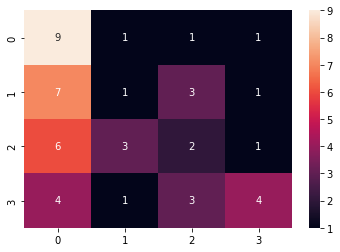

Epoch	 train loss	 test acc
0	1.40	0.25
1	1.19	0.25
2	1.08	0.25
3	0.98	0.25
4	0.91	0.25
5	0.79	0.25
6	0.76	0.25
7	0.67	0.25
8	0.59	0.25
9	0.52	0.25
10	0.46	0.25
11	0.41	0.25
12	0.40	0.25
13	0.36	0.27
14	0.31	0.29
15	0.27	0.31
16	0.23	0.35
17	0.22	0.31
18	0.18	0.31
19	0.17	0.31
20	0.17	0.29
21	0.15	0.35
22	0.14	0.29
23	0.12	0.35
24	0.11	0.33
25	0.09	0.31
26	0.09	0.35
27	0.09	0.35
28	0.08	0.35
29	0.08	0.33
30	0.07	0.35
31	0.06	0.31
32	0.06	0.35
33	0.06	0.35
34	0.05	0.35
35	0.05	0.33
36	0.05	0.38
37	0.04	0.42
38	0.04	0.38
39	0.04	0.29
40	0.04	0.35
41	0.04	0.38
42	0.04	0.35
43	0.03	0.33
44	0.03	0.35
45	0.03	0.33
46	0.03	0.35
47	0.03	0.33
48	0.03	0.38
49	0.03	0.31


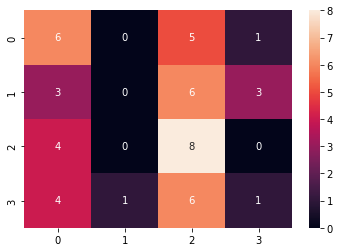

Epoch	 train loss	 test acc
0	1.47	0.25
1	1.22	0.25
2	1.16	0.25
3	1.04	0.25
4	0.94	0.25
5	0.87	0.25
6	0.82	0.25
7	0.73	0.25
8	0.65	0.25
9	0.59	0.25
10	0.55	0.25
11	0.49	0.25
12	0.45	0.25
13	0.40	0.25
14	0.37	0.23
15	0.31	0.25
16	0.30	0.25
17	0.27	0.23
18	0.25	0.25
19	0.22	0.27
20	0.20	0.25
21	0.17	0.25
22	0.16	0.25
23	0.14	0.25
24	0.13	0.25
25	0.12	0.25
26	0.12	0.27
27	0.11	0.25
28	0.09	0.25
29	0.08	0.25
30	0.07	0.25
31	0.07	0.25
32	0.07	0.23
33	0.07	0.25
34	0.06	0.25
35	0.05	0.25
36	0.05	0.25
37	0.05	0.25
38	0.05	0.25
39	0.04	0.29
40	0.04	0.27
41	0.04	0.23
42	0.04	0.27
43	0.04	0.25
44	0.03	0.27
45	0.04	0.23
46	0.03	0.25
47	0.03	0.23
48	0.03	0.23
49	0.02	0.25


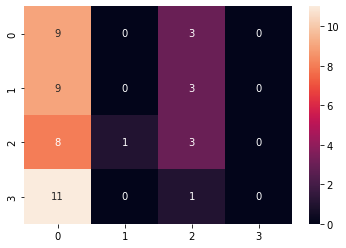

Epoch	 train loss	 test acc
0	1.47	0.25
1	1.25	0.25
2	1.13	0.25
3	1.04	0.25
4	0.96	0.25
5	0.90	0.25
6	0.84	0.25
7	0.76	0.25
8	0.67	0.25
9	0.63	0.25
10	0.61	0.23
11	0.51	0.29
12	0.49	0.27
13	0.40	0.21
14	0.39	0.25
15	0.34	0.23
16	0.30	0.21
17	0.28	0.25
18	0.24	0.27
19	0.22	0.25
20	0.21	0.27
21	0.18	0.19
22	0.16	0.23
23	0.16	0.19
24	0.15	0.23
25	0.13	0.27
26	0.12	0.23
27	0.11	0.23
28	0.10	0.27
29	0.10	0.23
30	0.08	0.23
31	0.08	0.31
32	0.07	0.23
33	0.06	0.25
34	0.06	0.27
35	0.05	0.23
36	0.06	0.27
37	0.06	0.23
38	0.05	0.29
39	0.05	0.27
40	0.04	0.29
41	0.04	0.27
42	0.04	0.27
43	0.04	0.25
44	0.04	0.29
45	0.04	0.29
46	0.03	0.25
47	0.03	0.27
48	0.03	0.27
49	0.03	0.27


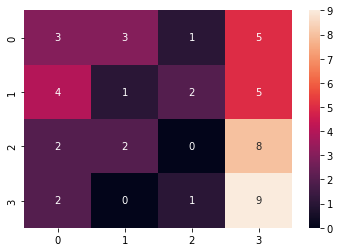

Epoch	 train loss	 test acc
0	1.53	0.25
1	1.29	0.25
2	1.17	0.25
3	1.07	0.25
4	0.97	0.25
5	0.91	0.25
6	0.81	0.25
7	0.75	0.25
8	0.68	0.25
9	0.63	0.25
10	0.57	0.25
11	0.50	0.23
12	0.44	0.21
13	0.41	0.23
14	0.38	0.25
15	0.33	0.25
16	0.30	0.25
17	0.27	0.31
18	0.28	0.23
19	0.22	0.27
20	0.22	0.35
21	0.18	0.33
22	0.16	0.33
23	0.17	0.33
24	0.15	0.35
25	0.14	0.38
26	0.11	0.29
27	0.12	0.31
28	0.12	0.31
29	0.10	0.27
30	0.09	0.27
31	0.08	0.31
32	0.08	0.27
33	0.07	0.31
34	0.07	0.29
35	0.06	0.31
36	0.07	0.33
37	0.06	0.27
38	0.05	0.27
39	0.05	0.27
40	0.05	0.31
41	0.04	0.27
42	0.04	0.27
43	0.04	0.31
44	0.04	0.31
45	0.04	0.27
46	0.04	0.29
47	0.03	0.29
48	0.03	0.29
49	0.03	0.33


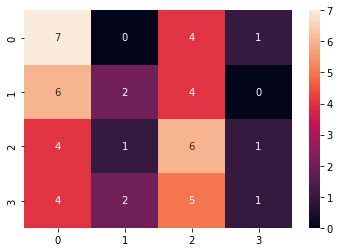

Loading subject  5
Epoch	 train loss	 test acc
0	1.48	0.25
1	1.31	0.25
2	1.19	0.25
3	1.13	0.25
4	1.08	0.25
5	0.97	0.25
6	0.87	0.25
7	0.86	0.25
8	0.76	0.25
9	0.71	0.25
10	0.64	0.23
11	0.60	0.27
12	0.50	0.27
13	0.52	0.29
14	0.42	0.23
15	0.38	0.27
16	0.34	0.23
17	0.32	0.23
18	0.27	0.25
19	0.26	0.25
20	0.22	0.23
21	0.23	0.23
22	0.17	0.27
23	0.16	0.25
24	0.16	0.23
25	0.15	0.25
26	0.13	0.25
27	0.13	0.25
28	0.13	0.23
29	0.11	0.23
30	0.10	0.23
31	0.08	0.25
32	0.08	0.23
33	0.07	0.23
34	0.07	0.25
35	0.07	0.25
36	0.07	0.25
37	0.06	0.23
38	0.06	0.25
39	0.05	0.21
40	0.05	0.25
41	0.04	0.25
42	0.04	0.21
43	0.04	0.23
44	0.04	0.23
45	0.03	0.23
46	0.03	0.23
47	0.03	0.21
48	0.03	0.21
49	0.03	0.23


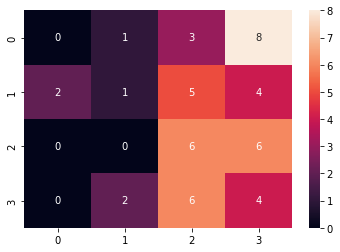

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.31	0.25
2	1.22	0.25
3	1.12	0.25
4	1.05	0.25
5	1.01	0.25
6	0.91	0.25
7	0.85	0.25
8	0.83	0.25
9	0.73	0.25
10	0.67	0.23
11	0.59	0.21
12	0.56	0.23
13	0.50	0.23
14	0.45	0.23
15	0.39	0.25
16	0.36	0.27
17	0.33	0.29
18	0.31	0.27
19	0.26	0.27
20	0.27	0.23
21	0.23	0.23
22	0.21	0.25
23	0.17	0.21
24	0.16	0.23
25	0.16	0.19
26	0.13	0.23
27	0.13	0.23
28	0.11	0.21
29	0.12	0.21
30	0.11	0.21
31	0.09	0.19
32	0.09	0.19
33	0.09	0.25
34	0.07	0.23
35	0.07	0.23
36	0.07	0.19
37	0.06	0.21
38	0.07	0.29
39	0.06	0.21
40	0.05	0.33
41	0.05	0.21
42	0.04	0.29
43	0.04	0.21
44	0.04	0.27
45	0.04	0.21
46	0.04	0.27
47	0.04	0.25
48	0.04	0.29
49	0.03	0.35


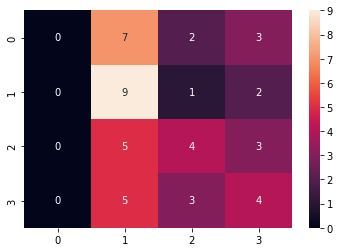

Epoch	 train loss	 test acc
0	1.50	0.25
1	1.32	0.25
2	1.18	0.25
3	1.09	0.25
4	0.98	0.25
5	0.90	0.25
6	0.82	0.25
7	0.75	0.25
8	0.70	0.25
9	0.60	0.25
10	0.56	0.25
11	0.50	0.25
12	0.45	0.27
13	0.39	0.29
14	0.34	0.29
15	0.32	0.27
16	0.28	0.27
17	0.24	0.27
18	0.22	0.27
19	0.19	0.27
20	0.17	0.29
21	0.16	0.27
22	0.15	0.27
23	0.15	0.31
24	0.12	0.31
25	0.11	0.27
26	0.11	0.31
27	0.09	0.27
28	0.08	0.29
29	0.08	0.27
30	0.08	0.31
31	0.08	0.29
32	0.06	0.27
33	0.06	0.29
34	0.05	0.27
35	0.05	0.27
36	0.04	0.27
37	0.04	0.27
38	0.05	0.27
39	0.04	0.29
40	0.03	0.29
41	0.03	0.29
42	0.03	0.29
43	0.03	0.27
44	0.03	0.29
45	0.03	0.27
46	0.03	0.31
47	0.03	0.27
48	0.02	0.29
49	0.02	0.29


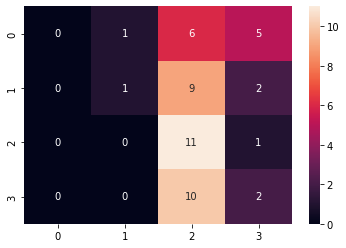

Epoch	 train loss	 test acc
0	1.48	0.25
1	1.31	0.25
2	1.20	0.25
3	1.07	0.25
4	1.02	0.25
5	0.98	0.25
6	0.85	0.25
7	0.84	0.25
8	0.74	0.25
9	0.72	0.25
10	0.62	0.25
11	0.58	0.27
12	0.50	0.29
13	0.47	0.27
14	0.41	0.29
15	0.36	0.29
16	0.34	0.29
17	0.33	0.27
18	0.26	0.27
19	0.25	0.27
20	0.21	0.27
21	0.22	0.29
22	0.20	0.29
23	0.18	0.29
24	0.16	0.29
25	0.14	0.27
26	0.12	0.27
27	0.12	0.29
28	0.11	0.29
29	0.11	0.29
30	0.10	0.29
31	0.08	0.27
32	0.08	0.29
33	0.07	0.29
34	0.07	0.27
35	0.06	0.29
36	0.06	0.29
37	0.06	0.29
38	0.05	0.29
39	0.05	0.29
40	0.05	0.29
41	0.04	0.27
42	0.04	0.27
43	0.04	0.27
44	0.04	0.27
45	0.04	0.29
46	0.04	0.29
47	0.03	0.29
48	0.04	0.29
49	0.03	0.29


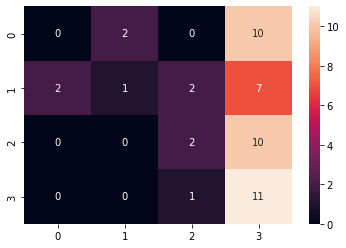

Epoch	 train loss	 test acc
0	1.50	0.25
1	1.27	0.25
2	1.21	0.25
3	1.14	0.25
4	1.07	0.25
5	0.97	0.25
6	0.92	0.25
7	0.81	0.25
8	0.76	0.25
9	0.70	0.25
10	0.64	0.25
11	0.60	0.27
12	0.59	0.27
13	0.46	0.29
14	0.39	0.35
15	0.40	0.35
16	0.34	0.31
17	0.30	0.31
18	0.26	0.31
19	0.25	0.31
20	0.21	0.31
21	0.20	0.33
22	0.21	0.33
23	0.17	0.31
24	0.16	0.38
25	0.14	0.38
26	0.12	0.33
27	0.12	0.33
28	0.11	0.31
29	0.09	0.33
30	0.09	0.29
31	0.08	0.31
32	0.07	0.29
33	0.07	0.33
34	0.06	0.31
35	0.07	0.31
36	0.06	0.31
37	0.06	0.33
38	0.05	0.31
39	0.05	0.31
40	0.05	0.35
41	0.04	0.33
42	0.04	0.31
43	0.03	0.31
44	0.03	0.31
45	0.04	0.31
46	0.03	0.31
47	0.03	0.31
48	0.03	0.31
49	0.03	0.31


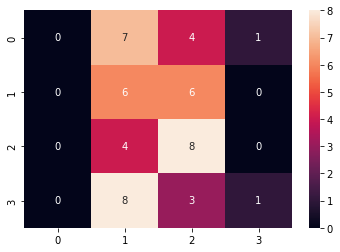

Loading subject  6
Epoch	 train loss	 test acc
0	1.47	0.25
1	1.26	0.25
2	1.10	0.25
3	1.03	0.25
4	0.93	0.25
5	0.75	0.25
6	0.69	0.25
7	0.60	0.25
8	0.49	0.25
9	0.43	0.25
10	0.34	0.25
11	0.27	0.25
12	0.22	0.25
13	0.18	0.18
14	0.18	0.23
15	0.14	0.25
16	0.12	0.23
17	0.10	0.25
18	0.08	0.27
19	0.08	0.27
20	0.06	0.27
21	0.05	0.27
22	0.05	0.27
23	0.05	0.27
24	0.04	0.27
25	0.04	0.27
26	0.04	0.27
27	0.03	0.27
28	0.03	0.27
29	0.03	0.27
30	0.03	0.27
31	0.02	0.27
32	0.02	0.27
33	0.02	0.27
34	0.02	0.27
35	0.02	0.27
36	0.02	0.27
37	0.02	0.27
38	0.02	0.27
39	0.02	0.25
40	0.01	0.27
41	0.01	0.27
42	0.01	0.25
43	0.01	0.27
44	0.01	0.27
45	0.01	0.27
46	0.01	0.27
47	0.01	0.27
48	0.01	0.27
49	0.01	0.27


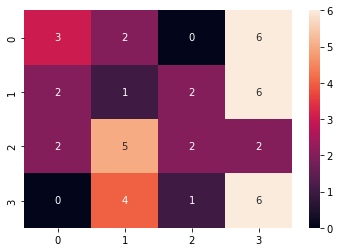

Epoch	 train loss	 test acc
0	1.54	0.26
1	1.27	0.26
2	1.08	0.26
3	0.91	0.26
4	0.79	0.26
5	0.67	0.26
6	0.55	0.26
7	0.45	0.26
8	0.36	0.26
9	0.29	0.26
10	0.22	0.26
11	0.18	0.26
12	0.16	0.28
13	0.12	0.23
14	0.10	0.23
15	0.08	0.23
16	0.07	0.19
17	0.06	0.23
18	0.05	0.21
19	0.04	0.21
20	0.04	0.19
21	0.03	0.19
22	0.03	0.16
23	0.03	0.16
24	0.03	0.23
25	0.03	0.19
26	0.03	0.19
27	0.02	0.19
28	0.02	0.19
29	0.02	0.19
30	0.02	0.21
31	0.02	0.19
32	0.01	0.19
33	0.01	0.19
34	0.01	0.19
35	0.01	0.19
36	0.01	0.19
37	0.01	0.19
38	0.01	0.19
39	0.01	0.16
40	0.01	0.19
41	0.01	0.19
42	0.01	0.16
43	0.01	0.19
44	0.01	0.16
45	0.01	0.19
46	0.01	0.19
47	0.01	0.16
48	0.01	0.16
49	0.01	0.16


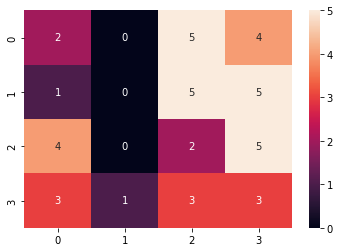

Epoch	 train loss	 test acc
0	1.47	0.26
1	1.20	0.26
2	1.06	0.26
3	0.99	0.26
4	0.84	0.26
5	0.75	0.26
6	0.61	0.26
7	0.50	0.26
8	0.47	0.26
9	0.38	0.26
10	0.31	0.26
11	0.26	0.26
12	0.22	0.26
13	0.17	0.26
14	0.16	0.28
15	0.14	0.21
16	0.11	0.21
17	0.10	0.21
18	0.08	0.23
19	0.07	0.23
20	0.05	0.21
21	0.05	0.23
22	0.04	0.23
23	0.04	0.23
24	0.04	0.23
25	0.03	0.23
26	0.03	0.23
27	0.03	0.21
28	0.02	0.21
29	0.02	0.21
30	0.02	0.21
31	0.02	0.21
32	0.02	0.21
33	0.02	0.21
34	0.02	0.21
35	0.02	0.23
36	0.01	0.21
37	0.02	0.21
38	0.02	0.21
39	0.01	0.19
40	0.01	0.21
41	0.01	0.19
42	0.01	0.21
43	0.01	0.19
44	0.01	0.19
45	0.01	0.19
46	0.01	0.19
47	0.01	0.19
48	0.01	0.19
49	0.01	0.19


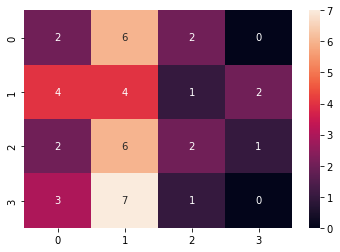

Epoch	 train loss	 test acc
0	1.52	0.26
1	1.22	0.26
2	1.06	0.26
3	0.88	0.26
4	0.77	0.26
5	0.65	0.26
6	0.52	0.26
7	0.41	0.26
8	0.32	0.26
9	0.24	0.26
10	0.21	0.26
11	0.15	0.26
12	0.14	0.26
13	0.11	0.26
14	0.08	0.19
15	0.08	0.16
16	0.07	0.16
17	0.06	0.16
18	0.05	0.16
19	0.04	0.16
20	0.03	0.16
21	0.04	0.16
22	0.03	0.16
23	0.03	0.14
24	0.03	0.16
25	0.03	0.14
26	0.02	0.19
27	0.02	0.16
28	0.02	0.19
29	0.02	0.16
30	0.02	0.19
31	0.02	0.19
32	0.01	0.19
33	0.01	0.16
34	0.01	0.19
35	0.01	0.19
36	0.01	0.19
37	0.01	0.19
38	0.01	0.19
39	0.01	0.19
40	0.01	0.19
41	0.01	0.19
42	0.01	0.19
43	0.01	0.19
44	0.01	0.19
45	0.01	0.19
46	0.01	0.19
47	0.01	0.19
48	0.01	0.19
49	0.01	0.19


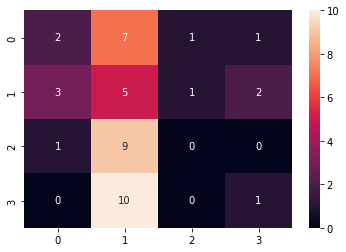

Epoch	 train loss	 test acc
0	1.50	0.26
1	1.20	0.26
2	1.07	0.26
3	0.91	0.26
4	0.76	0.26
5	0.67	0.26
6	0.54	0.26
7	0.43	0.26
8	0.37	0.26
9	0.27	0.26
10	0.22	0.26
11	0.19	0.28
12	0.15	0.35
13	0.12	0.30
14	0.10	0.26
15	0.09	0.26
16	0.08	0.26
17	0.07	0.26
18	0.07	0.26
19	0.05	0.26
20	0.04	0.28
21	0.04	0.28
22	0.03	0.30
23	0.03	0.30
24	0.03	0.28
25	0.03	0.28
26	0.03	0.28
27	0.02	0.30
28	0.02	0.28
29	0.02	0.30
30	0.02	0.28
31	0.02	0.28
32	0.02	0.30
33	0.01	0.30
34	0.01	0.28
35	0.01	0.30
36	0.01	0.30
37	0.01	0.30
38	0.01	0.30
39	0.01	0.30
40	0.01	0.30
41	0.01	0.28
42	0.01	0.28
43	0.01	0.30
44	0.01	0.28
45	0.01	0.30
46	0.01	0.30
47	0.01	0.30
48	0.01	0.30
49	0.01	0.30


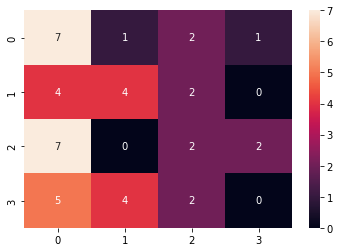

Loading subject  7
Epoch	 train loss	 test acc
0	1.51	0.25
1	1.27	0.25
2	1.14	0.25
3	1.02	0.25
4	0.95	0.25
5	0.84	0.25
6	0.73	0.25
7	0.65	0.25
8	0.56	0.25
9	0.48	0.25
10	0.43	0.23
11	0.38	0.33
12	0.28	0.29
13	0.26	0.33
14	0.22	0.31
15	0.20	0.31
16	0.18	0.35
17	0.14	0.31
18	0.12	0.33
19	0.11	0.29
20	0.09	0.29
21	0.08	0.31
22	0.07	0.31
23	0.07	0.35
24	0.06	0.33
25	0.06	0.38
26	0.05	0.35
27	0.05	0.38
28	0.04	0.35
29	0.04	0.38
30	0.03	0.35
31	0.03	0.33
32	0.03	0.35
33	0.03	0.35
34	0.03	0.33
35	0.02	0.31
36	0.02	0.35
37	0.02	0.35
38	0.02	0.35
39	0.02	0.38
40	0.02	0.40
41	0.02	0.40
42	0.02	0.38
43	0.02	0.38
44	0.01	0.38
45	0.02	0.33
46	0.01	0.38
47	0.01	0.38
48	0.01	0.35
49	0.01	0.38


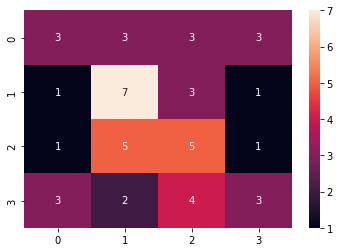

Epoch	 train loss	 test acc
0	1.51	0.25
1	1.22	0.25
2	1.10	0.25
3	0.94	0.25
4	0.88	0.25
5	0.70	0.25
6	0.63	0.25
7	0.53	0.25
8	0.47	0.25
9	0.39	0.25
10	0.33	0.29
11	0.27	0.33
12	0.21	0.31
13	0.17	0.29
14	0.14	0.35
15	0.12	0.29
16	0.11	0.33
17	0.10	0.38
18	0.09	0.33
19	0.08	0.29
20	0.07	0.31
21	0.06	0.31
22	0.06	0.31
23	0.05	0.33
24	0.05	0.33
25	0.04	0.33
26	0.03	0.35
27	0.03	0.35
28	0.03	0.31
29	0.03	0.38
30	0.03	0.38
31	0.02	0.35
32	0.02	0.33
33	0.02	0.35
34	0.02	0.38
35	0.02	0.35
36	0.02	0.40
37	0.02	0.35
38	0.02	0.35
39	0.02	0.40
40	0.02	0.38
41	0.01	0.33
42	0.01	0.31
43	0.01	0.31
44	0.01	0.31
45	0.01	0.33
46	0.01	0.31
47	0.01	0.33
48	0.01	0.38
49	0.01	0.38


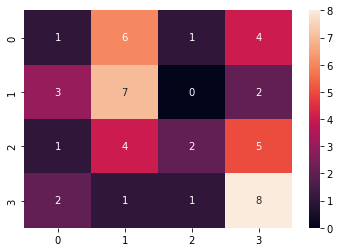

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.30	0.25
2	1.16	0.25
3	1.06	0.25
4	0.96	0.25
5	0.89	0.25
6	0.75	0.25
7	0.69	0.25
8	0.61	0.25
9	0.51	0.25
10	0.45	0.25
11	0.42	0.25
12	0.34	0.33
13	0.28	0.29
14	0.25	0.29
15	0.21	0.33
16	0.18	0.29
17	0.17	0.31
18	0.13	0.33
19	0.13	0.31
20	0.10	0.31
21	0.09	0.33
22	0.08	0.31
23	0.06	0.33
24	0.06	0.31
25	0.06	0.33
26	0.06	0.31
27	0.06	0.33
28	0.04	0.31
29	0.05	0.33
30	0.04	0.31
31	0.03	0.33
32	0.03	0.31
33	0.03	0.31
34	0.03	0.29
35	0.03	0.31
36	0.03	0.33
37	0.03	0.33
38	0.02	0.33
39	0.02	0.31
40	0.02	0.35
41	0.02	0.31
42	0.02	0.33
43	0.02	0.31
44	0.02	0.29
45	0.01	0.33
46	0.02	0.29
47	0.01	0.29
48	0.01	0.31
49	0.01	0.29


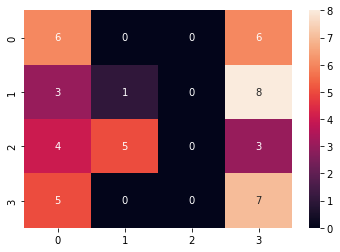

Epoch	 train loss	 test acc
0	1.48	0.25
1	1.26	0.25
2	1.14	0.25
3	1.06	0.25
4	0.94	0.25
5	0.90	0.25
6	0.76	0.25
7	0.71	0.25
8	0.59	0.25
9	0.53	0.25
10	0.48	0.27
11	0.36	0.33
12	0.32	0.42
13	0.25	0.35
14	0.23	0.29
15	0.21	0.33
16	0.18	0.38
17	0.14	0.35
18	0.13	0.31
19	0.11	0.35
20	0.10	0.35
21	0.09	0.33
22	0.08	0.33
23	0.07	0.40
24	0.06	0.33
25	0.05	0.31
26	0.05	0.33
27	0.05	0.33
28	0.04	0.35
29	0.04	0.35
30	0.03	0.31
31	0.03	0.40
32	0.03	0.38
33	0.03	0.38
34	0.03	0.40
35	0.03	0.38
36	0.02	0.38
37	0.02	0.38
38	0.02	0.38
39	0.02	0.38
40	0.02	0.40
41	0.02	0.40
42	0.02	0.38
43	0.01	0.35
44	0.01	0.38
45	0.01	0.38
46	0.01	0.38
47	0.01	0.38
48	0.01	0.40
49	0.01	0.33


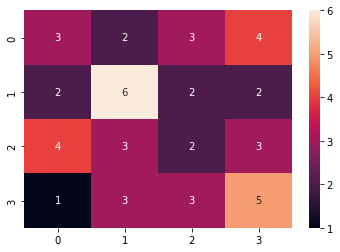

Epoch	 train loss	 test acc
0	1.44	0.25
1	1.28	0.25
2	1.10	0.25
3	1.02	0.25
4	0.97	0.25
5	0.82	0.25
6	0.75	0.25
7	0.63	0.25
8	0.59	0.25
9	0.48	0.27
10	0.41	0.27
11	0.34	0.27
12	0.31	0.23
13	0.27	0.23
14	0.20	0.23
15	0.19	0.25
16	0.16	0.25
17	0.14	0.23
18	0.12	0.21
19	0.11	0.21
20	0.10	0.23
21	0.08	0.23
22	0.08	0.25
23	0.06	0.25
24	0.06	0.25
25	0.05	0.23
26	0.05	0.25
27	0.04	0.25
28	0.04	0.25
29	0.03	0.23
30	0.04	0.23
31	0.03	0.25
32	0.02	0.25
33	0.03	0.27
34	0.02	0.27
35	0.02	0.25
36	0.02	0.25
37	0.02	0.25
38	0.02	0.25
39	0.02	0.27
40	0.02	0.27
41	0.02	0.27
42	0.02	0.23
43	0.02	0.25
44	0.02	0.25
45	0.01	0.23
46	0.02	0.27
47	0.01	0.25
48	0.01	0.25
49	0.02	0.27


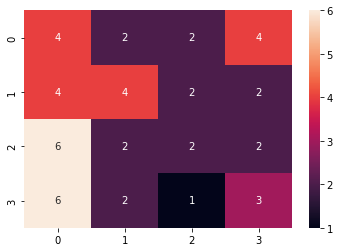

Loading subject  8
Epoch	 train loss	 test acc
0	1.59	0.25
1	1.23	0.25
2	1.06	0.25
3	0.91	0.25
4	0.81	0.25
5	0.69	0.25
6	0.61	0.25
7	0.50	0.25
8	0.46	0.25
9	0.40	0.25
10	0.33	0.25
11	0.27	0.28
12	0.24	0.25
13	0.19	0.28
14	0.18	0.23
15	0.16	0.20
16	0.14	0.23
17	0.13	0.20
18	0.10	0.23
19	0.09	0.20
20	0.09	0.23
21	0.08	0.20
22	0.07	0.20
23	0.06	0.20
24	0.06	0.20
25	0.05	0.20
26	0.05	0.23
27	0.05	0.20
28	0.04	0.23
29	0.04	0.20
30	0.04	0.20
31	0.03	0.17
32	0.03	0.20
33	0.03	0.20
34	0.03	0.20
35	0.03	0.20
36	0.02	0.20
37	0.02	0.20
38	0.02	0.20
39	0.02	0.20
40	0.02	0.20
41	0.02	0.20
42	0.02	0.20
43	0.02	0.20
44	0.02	0.20
45	0.02	0.20
46	0.01	0.20
47	0.01	0.20
48	0.01	0.20
49	0.01	0.20


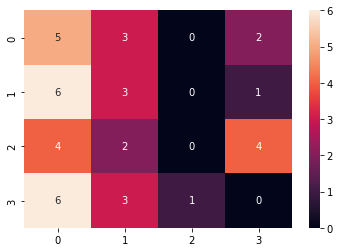

Epoch	 train loss	 test acc
0	1.45	0.25
1	1.21	0.25
2	1.02	0.25
3	0.90	0.25
4	0.84	0.25
5	0.71	0.25
6	0.62	0.25
7	0.56	0.25
8	0.45	0.25
9	0.38	0.25
10	0.35	0.25
11	0.28	0.25
12	0.23	0.25
13	0.21	0.25
14	0.18	0.35
15	0.16	0.38
16	0.14	0.35
17	0.12	0.35
18	0.11	0.30
19	0.10	0.33
20	0.08	0.35
21	0.08	0.35
22	0.07	0.38
23	0.06	0.38
24	0.05	0.33
25	0.05	0.38
26	0.05	0.35
27	0.04	0.30
28	0.04	0.33
29	0.04	0.33
30	0.04	0.35
31	0.03	0.30
32	0.03	0.30
33	0.03	0.30
34	0.03	0.33
35	0.03	0.30
36	0.02	0.30
37	0.02	0.28
38	0.02	0.30
39	0.02	0.33
40	0.02	0.33
41	0.02	0.33
42	0.02	0.33
43	0.02	0.30
44	0.02	0.30
45	0.02	0.30
46	0.01	0.30
47	0.01	0.33
48	0.01	0.33
49	0.01	0.33


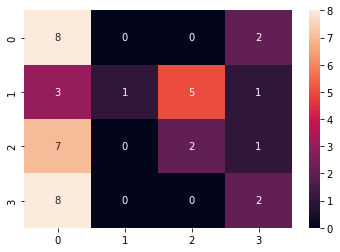

Epoch	 train loss	 test acc
0	1.50	0.25
1	1.15	0.25
2	1.03	0.25
3	0.87	0.25
4	0.79	0.25
5	0.69	0.25
6	0.56	0.25
7	0.52	0.25
8	0.45	0.25
9	0.38	0.25
10	0.33	0.25
11	0.30	0.25
12	0.22	0.25
13	0.19	0.25
14	0.17	0.23
15	0.13	0.28
16	0.12	0.30
17	0.12	0.33
18	0.10	0.30
19	0.09	0.33
20	0.08	0.33
21	0.07	0.33
22	0.06	0.35
23	0.05	0.38
24	0.05	0.35
25	0.05	0.35
26	0.05	0.35
27	0.04	0.35
28	0.04	0.35
29	0.03	0.35
30	0.03	0.35
31	0.03	0.35
32	0.03	0.35
33	0.02	0.35
34	0.02	0.35
35	0.02	0.33
36	0.02	0.35
37	0.02	0.30
38	0.02	0.30
39	0.02	0.30
40	0.02	0.30
41	0.02	0.33
42	0.02	0.28
43	0.01	0.30
44	0.01	0.30
45	0.01	0.30
46	0.01	0.28
47	0.01	0.28
48	0.01	0.33
49	0.01	0.30


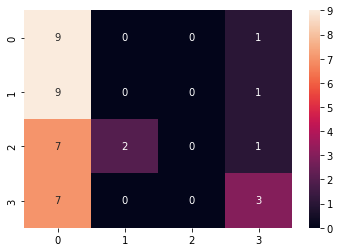

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.12	0.25
2	1.01	0.25
3	0.89	0.25
4	0.77	0.25
5	0.66	0.25
6	0.59	0.25
7	0.53	0.25
8	0.45	0.25
9	0.37	0.25
10	0.33	0.25
11	0.27	0.25
12	0.23	0.25
13	0.21	0.23
14	0.19	0.20
15	0.16	0.23
16	0.14	0.25
17	0.12	0.25
18	0.11	0.23
19	0.10	0.25
20	0.08	0.20
21	0.07	0.20
22	0.06	0.20
23	0.06	0.25
24	0.05	0.25
25	0.05	0.25
26	0.04	0.20
27	0.04	0.23
28	0.04	0.23
29	0.03	0.25
30	0.04	0.20
31	0.03	0.25
32	0.03	0.28
33	0.03	0.25
34	0.03	0.25
35	0.02	0.23
36	0.03	0.20
37	0.02	0.28
38	0.02	0.23
39	0.02	0.30
40	0.02	0.25
41	0.02	0.25
42	0.01	0.23
43	0.01	0.28
44	0.02	0.25
45	0.01	0.25
46	0.01	0.25
47	0.01	0.25
48	0.01	0.20
49	0.01	0.25


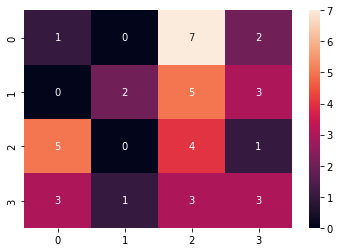

Epoch	 train loss	 test acc
0	1.41	0.25
1	1.14	0.25
2	0.99	0.25
3	0.89	0.25
4	0.78	0.25
5	0.69	0.25
6	0.59	0.25
7	0.49	0.25
8	0.43	0.25
9	0.36	0.25
10	0.32	0.25
11	0.28	0.25
12	0.24	0.25
13	0.20	0.25
14	0.18	0.28
15	0.15	0.23
16	0.13	0.25
17	0.14	0.28
18	0.11	0.25
19	0.09	0.23
20	0.09	0.28
21	0.08	0.28
22	0.07	0.25
23	0.06	0.30
24	0.06	0.30
25	0.05	0.28
26	0.05	0.28
27	0.04	0.30
28	0.04	0.28
29	0.04	0.28
30	0.04	0.23
31	0.03	0.25
32	0.03	0.25
33	0.03	0.28
34	0.03	0.28
35	0.03	0.25
36	0.02	0.23
37	0.02	0.25
38	0.02	0.28
39	0.03	0.25
40	0.02	0.28
41	0.02	0.25
42	0.02	0.25
43	0.02	0.25
44	0.02	0.28
45	0.02	0.28
46	0.02	0.28
47	0.01	0.23
48	0.01	0.28
49	0.01	0.30


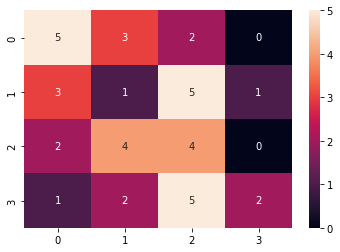

Loading subject  9
Epoch	 train loss	 test acc
0	1.48	0.25
1	1.27	0.25
2	1.11	0.25
3	1.05	0.25
4	0.96	0.25
5	0.88	0.25
6	0.80	0.25
7	0.74	0.25
8	0.70	0.25
9	0.64	0.25
10	0.58	0.21
11	0.52	0.21
12	0.49	0.23
13	0.40	0.23
14	0.37	0.23
15	0.33	0.19
16	0.32	0.27
17	0.27	0.25
18	0.24	0.29
19	0.23	0.23
20	0.19	0.23
21	0.17	0.21
22	0.16	0.27
23	0.13	0.27
24	0.12	0.27
25	0.12	0.25
26	0.12	0.23
27	0.12	0.23
28	0.10	0.29
29	0.09	0.25
30	0.07	0.27
31	0.06	0.23
32	0.06	0.21
33	0.05	0.25
34	0.05	0.25
35	0.04	0.23
36	0.05	0.25
37	0.04	0.31
38	0.05	0.29
39	0.04	0.31
40	0.04	0.25
41	0.03	0.25
42	0.03	0.27
43	0.03	0.25
44	0.03	0.27
45	0.03	0.25
46	0.02	0.27
47	0.03	0.27
48	0.02	0.25
49	0.02	0.27


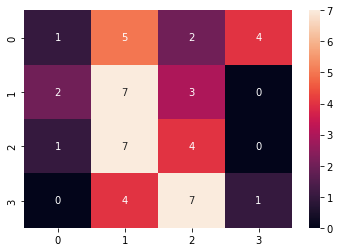

Epoch	 train loss	 test acc
0	1.53	0.25
1	1.26	0.25
2	1.15	0.25
3	1.04	0.25
4	1.02	0.25
5	0.93	0.25
6	0.84	0.25
7	0.77	0.25
8	0.71	0.25
9	0.65	0.25
10	0.57	0.25
11	0.52	0.25
12	0.49	0.29
13	0.42	0.25
14	0.37	0.27
15	0.31	0.29
16	0.28	0.27
17	0.25	0.31
18	0.23	0.25
19	0.21	0.35
20	0.19	0.33
21	0.16	0.25
22	0.15	0.35
23	0.11	0.35
24	0.12	0.31
25	0.10	0.35
26	0.09	0.31
27	0.09	0.38
28	0.07	0.35
29	0.08	0.33
30	0.07	0.33
31	0.08	0.33
32	0.06	0.33
33	0.05	0.33
34	0.04	0.38
35	0.05	0.38
36	0.04	0.38
37	0.04	0.33
38	0.03	0.35
39	0.03	0.40
40	0.03	0.33
41	0.03	0.40
42	0.04	0.40
43	0.04	0.38
44	0.03	0.33
45	0.02	0.31
46	0.02	0.33
47	0.02	0.31
48	0.02	0.31
49	0.02	0.31


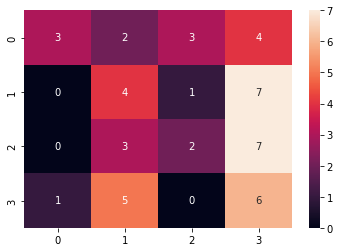

Epoch	 train loss	 test acc
0	1.45	0.25
1	1.25	0.25
2	1.10	0.25
3	1.02	0.25
4	0.95	0.25
5	0.84	0.25
6	0.77	0.25
7	0.72	0.25
8	0.63	0.25
9	0.58	0.25
10	0.53	0.29
11	0.45	0.23
12	0.39	0.25
13	0.37	0.21
14	0.30	0.25
15	0.27	0.29
16	0.27	0.29
17	0.22	0.33
18	0.19	0.31
19	0.19	0.29
20	0.17	0.33
21	0.15	0.31
22	0.14	0.33
23	0.12	0.23
24	0.11	0.23
25	0.10	0.27
26	0.09	0.27
27	0.09	0.31
28	0.10	0.31
29	0.10	0.23
30	0.08	0.38
31	0.06	0.31
32	0.05	0.23
33	0.05	0.29
34	0.04	0.27
35	0.05	0.31
36	0.04	0.31
37	0.04	0.29
38	0.03	0.31
39	0.03	0.25
40	0.03	0.35
41	0.02	0.29
42	0.03	0.31
43	0.03	0.29
44	0.02	0.29
45	0.02	0.31
46	0.02	0.29
47	0.02	0.31
48	0.02	0.31
49	0.02	0.23


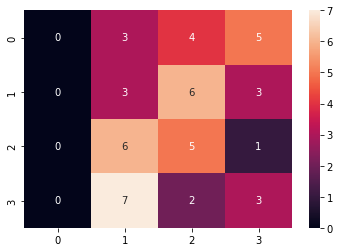

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.21	0.25
2	1.10	0.25
3	0.99	0.25
4	0.93	0.25
5	0.82	0.25
6	0.74	0.25
7	0.65	0.25
8	0.64	0.25
9	0.53	0.25
10	0.46	0.25
11	0.42	0.27
12	0.40	0.33
13	0.33	0.33
14	0.28	0.29
15	0.26	0.29
16	0.24	0.31
17	0.19	0.33
18	0.17	0.33
19	0.17	0.31
20	0.14	0.29
21	0.13	0.29
22	0.13	0.29
23	0.10	0.33
24	0.12	0.35
25	0.10	0.31
26	0.09	0.31
27	0.07	0.33
28	0.06	0.29
29	0.06	0.31
30	0.05	0.31
31	0.05	0.33
32	0.06	0.29
33	0.05	0.31
34	0.05	0.27
35	0.05	0.35
36	0.05	0.31
37	0.04	0.31
38	0.03	0.40
39	0.03	0.31
40	0.03	0.35
41	0.02	0.33
42	0.02	0.33
43	0.02	0.38
44	0.02	0.35
45	0.02	0.31
46	0.02	0.31
47	0.02	0.33
48	0.02	0.31
49	0.01	0.31


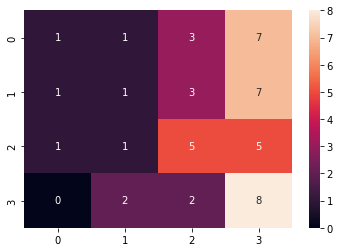

Epoch	 train loss	 test acc
0	1.43	0.25
1	1.27	0.25
2	1.15	0.25
3	1.03	0.25
4	0.96	0.25
5	0.87	0.25
6	0.79	0.25
7	0.71	0.25
8	0.65	0.25
9	0.56	0.25
10	0.53	0.25
11	0.47	0.25
12	0.40	0.23
13	0.36	0.27
14	0.34	0.23
15	0.29	0.27
16	0.26	0.27
17	0.21	0.27
18	0.19	0.33
19	0.18	0.23
20	0.16	0.25
21	0.14	0.25
22	0.13	0.25
23	0.11	0.25
24	0.11	0.21
25	0.09	0.25
26	0.07	0.23
27	0.07	0.27
28	0.07	0.27
29	0.06	0.23
30	0.07	0.21
31	0.06	0.21
32	0.05	0.21
33	0.05	0.25
34	0.05	0.21
35	0.04	0.23
36	0.03	0.19
37	0.04	0.25
38	0.03	0.21
39	0.03	0.21
40	0.02	0.21
41	0.02	0.23
42	0.03	0.29
43	0.02	0.25
44	0.02	0.21
45	0.02	0.23
46	0.02	0.27
47	0.02	0.23
48	0.02	0.21
49	0.02	0.19


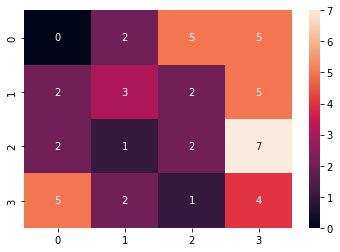

Loading subject  10
Epoch	 train loss	 test acc
0	1.44	0.25
1	1.16	0.25
2	1.04	0.25
3	0.94	0.25
4	0.90	0.25
5	0.79	0.25
6	0.69	0.25
7	0.59	0.25
8	0.58	0.25
9	0.48	0.25
10	0.42	0.25
11	0.37	0.27
12	0.31	0.25
13	0.26	0.27
14	0.23	0.21
15	0.20	0.25
16	0.17	0.19
17	0.13	0.21
18	0.13	0.23
19	0.11	0.21
20	0.10	0.21
21	0.08	0.23
22	0.07	0.17
23	0.07	0.23
24	0.06	0.19
25	0.05	0.21
26	0.05	0.19
27	0.04	0.17
28	0.04	0.19
29	0.04	0.21
30	0.04	0.17
31	0.04	0.21
32	0.04	0.15
33	0.03	0.17
34	0.03	0.17
35	0.03	0.21
36	0.03	0.15
37	0.02	0.19
38	0.02	0.19
39	0.02	0.19
40	0.02	0.15
41	0.02	0.17
42	0.01	0.17
43	0.01	0.17
44	0.02	0.17
45	0.01	0.17
46	0.01	0.17
47	0.01	0.17
48	0.01	0.15
49	0.01	0.17


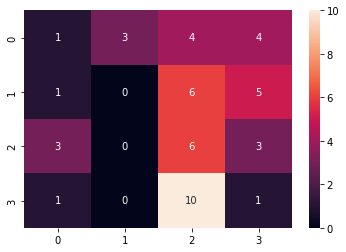

Epoch	 train loss	 test acc
0	1.44	0.25
1	1.20	0.25
2	1.09	0.25
3	1.05	0.25
4	0.96	0.25
5	0.87	0.25
6	0.82	0.25
7	0.72	0.25
8	0.64	0.25
9	0.56	0.25
10	0.47	0.27
11	0.43	0.29
12	0.38	0.25
13	0.33	0.29
14	0.29	0.31
15	0.24	0.27
16	0.20	0.23
17	0.18	0.35
18	0.18	0.35
19	0.16	0.27
20	0.14	0.29
21	0.11	0.29
22	0.10	0.29
23	0.09	0.29
24	0.08	0.33
25	0.07	0.27
26	0.06	0.31
27	0.06	0.33
28	0.05	0.27
29	0.05	0.35
30	0.04	0.17
31	0.03	0.27
32	0.04	0.31
33	0.04	0.25
34	0.03	0.27
35	0.03	0.21
36	0.03	0.25
37	0.02	0.27
38	0.02	0.27
39	0.02	0.27
40	0.02	0.25
41	0.02	0.27
42	0.02	0.27
43	0.02	0.27
44	0.02	0.27
45	0.02	0.25
46	0.02	0.25
47	0.02	0.27
48	0.02	0.25
49	0.01	0.27


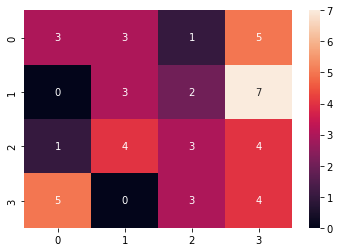

Epoch	 train loss	 test acc
0	1.48	0.25
1	1.24	0.25
2	1.16	0.25
3	1.00	0.25
4	0.98	0.25
5	0.90	0.25
6	0.82	0.25
7	0.71	0.25
8	0.64	0.25
9	0.59	0.25
10	0.51	0.25
11	0.44	0.23
12	0.37	0.21
13	0.32	0.21
14	0.28	0.25
15	0.24	0.19
16	0.20	0.25
17	0.18	0.21
18	0.15	0.29
19	0.14	0.29
20	0.12	0.21
21	0.10	0.25
22	0.09	0.25
23	0.08	0.25
24	0.07	0.31
25	0.06	0.31
26	0.05	0.35
27	0.05	0.27
28	0.05	0.27
29	0.05	0.33
30	0.04	0.29
31	0.04	0.29
32	0.03	0.29
33	0.03	0.31
34	0.03	0.29
35	0.03	0.27
36	0.04	0.29
37	0.04	0.27
38	0.04	0.23
39	0.03	0.25
40	0.02	0.33
41	0.02	0.23
42	0.02	0.29
43	0.02	0.29
44	0.01	0.27
45	0.02	0.31
46	0.01	0.29
47	0.01	0.29
48	0.01	0.29
49	0.01	0.29


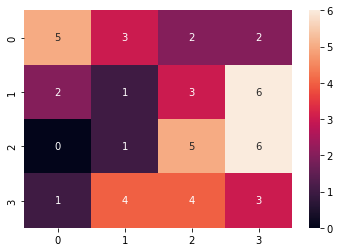

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.22	0.25
2	1.09	0.25
3	0.97	0.25
4	0.86	0.25
5	0.81	0.25
6	0.73	0.25
7	0.64	0.25
8	0.60	0.25
9	0.49	0.25
10	0.44	0.25
11	0.39	0.25
12	0.33	0.27
13	0.28	0.27
14	0.24	0.25
15	0.20	0.27
16	0.19	0.23
17	0.16	0.27
18	0.14	0.25
19	0.11	0.27
20	0.11	0.27
21	0.11	0.27
22	0.08	0.27
23	0.08	0.27
24	0.07	0.25
25	0.06	0.27
26	0.06	0.27
27	0.05	0.27
28	0.05	0.27
29	0.04	0.27
30	0.04	0.27
31	0.03	0.27
32	0.03	0.27
33	0.04	0.27
34	0.03	0.25
35	0.03	0.27
36	0.02	0.27
37	0.03	0.27
38	0.02	0.27
39	0.02	0.25
40	0.02	0.27
41	0.02	0.27
42	0.02	0.27
43	0.02	0.29
44	0.02	0.27
45	0.02	0.27
46	0.01	0.27
47	0.01	0.25
48	0.01	0.29
49	0.01	0.29


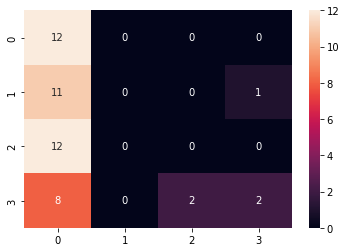

Epoch	 train loss	 test acc
0	1.50	0.25
1	1.27	0.25
2	1.16	0.25
3	1.09	0.25
4	1.00	0.25
5	0.89	0.25
6	0.86	0.25
7	0.76	0.25
8	0.70	0.25
9	0.61	0.25
10	0.52	0.23
11	0.46	0.29
12	0.41	0.29
13	0.35	0.23
14	0.30	0.29
15	0.28	0.25
16	0.21	0.23
17	0.20	0.25
18	0.17	0.25
19	0.14	0.23
20	0.12	0.21
21	0.11	0.25
22	0.11	0.23
23	0.09	0.23
24	0.08	0.25
25	0.06	0.23
26	0.06	0.23
27	0.06	0.21
28	0.05	0.23
29	0.05	0.21
30	0.05	0.23
31	0.04	0.25
32	0.04	0.23
33	0.04	0.23
34	0.03	0.23
35	0.03	0.23
36	0.02	0.21
37	0.02	0.19
38	0.02	0.23
39	0.02	0.25
40	0.02	0.25
41	0.02	0.23
42	0.02	0.21
43	0.02	0.17
44	0.02	0.19
45	0.02	0.23
46	0.01	0.19
47	0.01	0.23
48	0.01	0.17
49	0.01	0.21


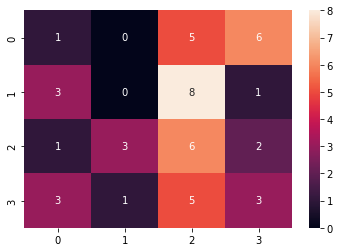

Loading subject  1
Epoch	 train loss	 test acc
0	1.58	0.25
1	1.44	0.25
2	1.43	0.25
3	1.44	0.25
4	1.40	0.25
5	1.33	0.25
6	1.32	0.25
7	1.29	0.25
8	1.25	0.25
9	1.20	0.25
10	1.22	0.25
11	1.23	0.25
12	1.16	0.25
13	1.13	0.25
14	1.15	0.30
15	1.12	0.25
16	1.11	0.25
17	1.11	0.25
18	1.07	0.25
19	1.06	0.25
20	1.04	0.23
21	1.03	0.20
22	0.99	0.23
23	0.99	0.20
24	0.95	0.20
25	0.98	0.20
26	0.96	0.20
27	0.96	0.20
28	0.94	0.17
29	0.91	0.20
30	0.92	0.20
31	0.87	0.20
32	0.87	0.20
33	0.90	0.20
34	0.88	0.20
35	0.88	0.20
36	0.83	0.20
37	0.82	0.20
38	0.81	0.20
39	0.82	0.20
40	0.78	0.23
41	0.81	0.23
42	0.77	0.23
43	0.76	0.20
44	0.79	0.20
45	0.73	0.20
46	0.72	0.20
47	0.72	0.23
48	0.71	0.20
49	0.70	0.23


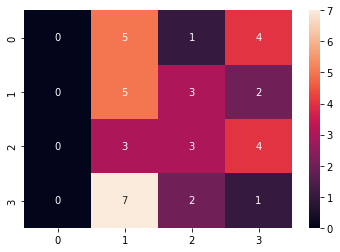

Epoch	 train loss	 test acc
0	1.56	0.25
1	1.47	0.25
2	1.46	0.25
3	1.46	0.25
4	1.41	0.25
5	1.35	0.25
6	1.34	0.25
7	1.33	0.25
8	1.33	0.25
9	1.32	0.25
10	1.26	0.25
11	1.25	0.38
12	1.26	0.38
13	1.23	0.35
14	1.24	0.33
15	1.19	0.30
16	1.15	0.25
17	1.17	0.28
18	1.19	0.25
19	1.14	0.25
20	1.14	0.28
21	1.14	0.28
22	1.11	0.25
23	1.13	0.30
24	1.09	0.33
25	1.08	0.30
26	1.06	0.30
27	1.04	0.30
28	1.01	0.33
29	1.00	0.33
30	1.03	0.33
31	1.00	0.33
32	0.98	0.33
33	0.99	0.33
34	0.94	0.33
35	0.95	0.35
36	0.94	0.33
37	0.93	0.30
38	0.90	0.33
39	0.91	0.33
40	0.91	0.33
41	0.89	0.33
42	0.83	0.30
43	0.85	0.30
44	0.83	0.30
45	0.86	0.35
46	0.85	0.30
47	0.79	0.33
48	0.84	0.33
49	0.78	0.35


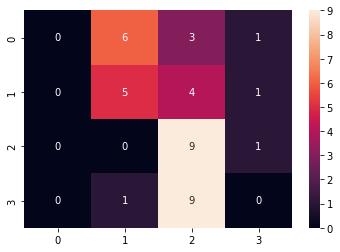

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.46	0.25
2	1.38	0.25
3	1.37	0.25
4	1.32	0.25
5	1.33	0.25
6	1.25	0.25
7	1.27	0.25
8	1.26	0.25
9	1.19	0.25
10	1.21	0.25
11	1.18	0.25
12	1.19	0.25
13	1.14	0.28
14	1.16	0.25
15	1.12	0.23
16	1.12	0.17
17	1.08	0.20
18	1.08	0.20
19	1.08	0.20
20	1.05	0.15
21	1.02	0.15
22	1.02	0.15
23	1.02	0.15
24	0.97	0.17
25	0.95	0.17
26	0.96	0.17
27	0.95	0.17
28	0.92	0.17
29	0.92	0.17
30	0.93	0.17
31	0.86	0.20
32	0.87	0.20
33	0.88	0.20
34	0.84	0.20
35	0.87	0.17
36	0.83	0.17
37	0.80	0.17
38	0.81	0.17
39	0.78	0.17
40	0.76	0.17
41	0.76	0.17
42	0.74	0.17
43	0.71	0.17
44	0.72	0.17
45	0.72	0.17
46	0.71	0.17
47	0.70	0.17
48	0.71	0.17
49	0.67	0.17


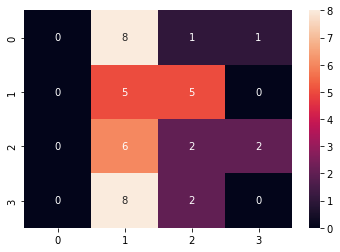

Epoch	 train loss	 test acc
0	1.54	0.25
1	1.47	0.25
2	1.48	0.25
3	1.41	0.25
4	1.40	0.25
5	1.35	0.25
6	1.32	0.25
7	1.29	0.25
8	1.27	0.25
9	1.30	0.25
10	1.19	0.25
11	1.22	0.25
12	1.17	0.28
13	1.18	0.28
14	1.16	0.28
15	1.14	0.23
16	1.12	0.20
17	1.09	0.20
18	1.10	0.20
19	1.08	0.17
20	1.05	0.20
21	1.08	0.17
22	1.05	0.20
23	1.01	0.23
24	1.01	0.20
25	0.98	0.20
26	0.98	0.23
27	0.99	0.23
28	0.95	0.23
29	0.91	0.20
30	0.90	0.20
31	0.93	0.20
32	0.90	0.20
33	0.88	0.23
34	0.84	0.23
35	0.82	0.23
36	0.83	0.23
37	0.83	0.23
38	0.80	0.23
39	0.81	0.23
40	0.78	0.17
41	0.77	0.17
42	0.75	0.17
43	0.75	0.17
44	0.71	0.20
45	0.71	0.20
46	0.68	0.23
47	0.67	0.17
48	0.71	0.17
49	0.68	0.23


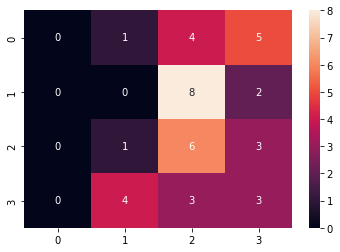

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.47	0.25
2	1.43	0.25
3	1.37	0.25
4	1.33	0.25
5	1.33	0.25
6	1.30	0.25
7	1.28	0.25
8	1.28	0.25
9	1.29	0.25
10	1.24	0.25
11	1.23	0.25
12	1.23	0.25
13	1.14	0.25
14	1.15	0.28
15	1.12	0.30
16	1.13	0.30
17	1.10	0.35
18	1.08	0.35
19	1.07	0.35
20	1.04	0.35
21	1.02	0.33
22	1.05	0.35
23	1.04	0.35
24	1.00	0.35
25	0.98	0.35
26	0.99	0.35
27	0.99	0.33
28	0.97	0.33
29	0.95	0.33
30	0.91	0.33
31	0.92	0.30
32	0.89	0.30
33	0.88	0.28
34	0.87	0.30
35	0.86	0.30
36	0.86	0.30
37	0.84	0.30
38	0.84	0.30
39	0.80	0.30
40	0.80	0.33
41	0.79	0.35
42	0.81	0.33
43	0.78	0.28
44	0.77	0.30
45	0.77	0.28
46	0.74	0.25
47	0.72	0.25
48	0.72	0.25
49	0.70	0.28


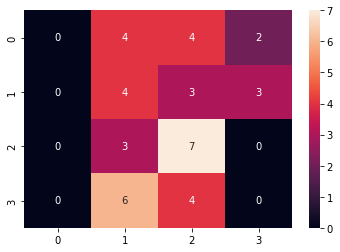

Loading subject  2
Epoch	 train loss	 test acc
0	1.56	0.25
1	1.45	0.25
2	1.42	0.25
3	1.38	0.25
4	1.34	0.25
5	1.32	0.25
6	1.29	0.25
7	1.28	0.25
8	1.23	0.25
9	1.23	0.25
10	1.26	0.29
11	1.15	0.23
12	1.15	0.19
13	1.14	0.21
14	1.13	0.21
15	1.10	0.21
16	1.08	0.19
17	1.04	0.19
18	1.04	0.21
19	1.03	0.19
20	1.00	0.25
21	0.98	0.23
22	0.98	0.23
23	0.96	0.23
24	0.97	0.21
25	0.94	0.23
26	0.90	0.21
27	0.93	0.23
28	0.91	0.23
29	0.86	0.19
30	0.85	0.21
31	0.84	0.21
32	0.85	0.23
33	0.82	0.19
34	0.81	0.19
35	0.77	0.19
36	0.79	0.19
37	0.77	0.19
38	0.76	0.17
39	0.73	0.19
40	0.75	0.19
41	0.72	0.17
42	0.67	0.17
43	0.70	0.17
44	0.67	0.17
45	0.66	0.17
46	0.65	0.17
47	0.62	0.19
48	0.61	0.19
49	0.60	0.19


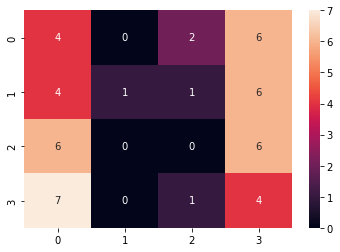

Epoch	 train loss	 test acc
0	1.53	0.25
1	1.48	0.25
2	1.42	0.25
3	1.37	0.25
4	1.34	0.25
5	1.35	0.25
6	1.27	0.25
7	1.23	0.25
8	1.23	0.25
9	1.20	0.21
10	1.19	0.19
11	1.18	0.23
12	1.18	0.27
13	1.12	0.25
14	1.12	0.25
15	1.09	0.27
16	1.08	0.25
17	1.05	0.27
18	1.03	0.25
19	1.00	0.23
20	0.98	0.21
21	0.96	0.19
22	0.96	0.19
23	0.94	0.21
24	0.91	0.21
25	0.92	0.23
26	0.88	0.23
27	0.87	0.21
28	0.86	0.21
29	0.85	0.21
30	0.86	0.21
31	0.79	0.21
32	0.78	0.25
33	0.78	0.25
34	0.77	0.25
35	0.72	0.25
36	0.74	0.23
37	0.73	0.25
38	0.72	0.23
39	0.68	0.23
40	0.64	0.23
41	0.65	0.23
42	0.62	0.21
43	0.62	0.23
44	0.61	0.21
45	0.60	0.19
46	0.59	0.19
47	0.56	0.17
48	0.55	0.17
49	0.55	0.17


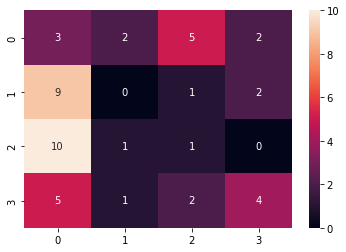

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.48	0.25
2	1.44	0.25
3	1.45	0.25
4	1.35	0.25
5	1.34	0.25
6	1.32	0.25
7	1.31	0.25
8	1.29	0.25
9	1.27	0.25
10	1.26	0.25
11	1.21	0.21
12	1.21	0.23
13	1.19	0.27
14	1.17	0.27
15	1.13	0.27
16	1.15	0.27
17	1.14	0.27
18	1.10	0.25
19	1.12	0.25
20	1.08	0.25
21	1.06	0.25
22	1.05	0.27
23	1.05	0.27
24	1.03	0.29
25	0.98	0.29
26	1.00	0.29
27	0.97	0.31
28	0.94	0.31
29	0.96	0.31
30	0.94	0.31
31	0.92	0.27
32	0.91	0.27
33	0.86	0.27
34	0.88	0.27
35	0.86	0.27
36	0.83	0.27
37	0.84	0.27
38	0.83	0.27
39	0.81	0.25
40	0.81	0.25
41	0.80	0.25
42	0.79	0.25
43	0.76	0.25
44	0.73	0.25
45	0.72	0.25
46	0.71	0.25
47	0.73	0.25
48	0.69	0.25
49	0.69	0.25


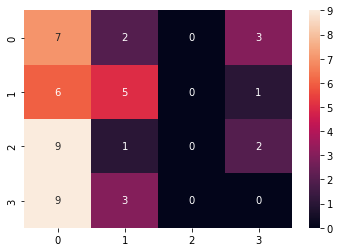

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.43	0.25
2	1.40	0.25
3	1.39	0.25
4	1.30	0.25
5	1.29	0.25
6	1.29	0.25
7	1.23	0.25
8	1.23	0.25
9	1.20	0.25
10	1.17	0.25
11	1.12	0.25
12	1.12	0.25
13	1.13	0.27
14	1.11	0.27
15	1.03	0.27
16	1.03	0.27
17	1.04	0.27
18	1.04	0.27
19	0.99	0.27
20	0.98	0.27
21	0.98	0.27
22	0.96	0.27
23	0.93	0.27
24	0.92	0.27
25	0.90	0.27
26	0.87	0.27
27	0.87	0.27
28	0.86	0.27
29	0.82	0.27
30	0.83	0.27
31	0.80	0.27
32	0.81	0.27
33	0.77	0.27
34	0.75	0.27
35	0.74	0.27
36	0.71	0.27
37	0.73	0.27
38	0.71	0.27
39	0.68	0.27
40	0.67	0.27
41	0.66	0.27
42	0.66	0.27
43	0.63	0.27
44	0.62	0.27
45	0.60	0.27
46	0.58	0.29
47	0.57	0.29
48	0.58	0.27
49	0.54	0.27


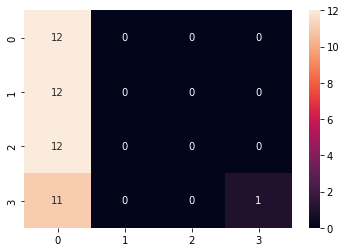

Epoch	 train loss	 test acc
0	1.55	0.25
1	1.47	0.25
2	1.41	0.25
3	1.36	0.25
4	1.33	0.25
5	1.34	0.25
6	1.29	0.25
7	1.25	0.25
8	1.24	0.25
9	1.23	0.25
10	1.20	0.29
11	1.15	0.29
12	1.17	0.33
13	1.12	0.35
14	1.12	0.33
15	1.08	0.31
16	1.07	0.29
17	1.04	0.29
18	1.04	0.29
19	1.01	0.31
20	0.99	0.29
21	0.97	0.31
22	0.96	0.31
23	0.96	0.31
24	0.96	0.31
25	0.91	0.31
26	0.92	0.33
27	0.88	0.33
28	0.88	0.33
29	0.85	0.35
30	0.83	0.33
31	0.83	0.35
32	0.82	0.38
33	0.80	0.33
34	0.78	0.35
35	0.76	0.33
36	0.77	0.33
37	0.76	0.33
38	0.74	0.33
39	0.72	0.33
40	0.71	0.35
41	0.68	0.40
42	0.67	0.38
43	0.67	0.38
44	0.66	0.38
45	0.66	0.38
46	0.61	0.38
47	0.59	0.38
48	0.58	0.38
49	0.57	0.38


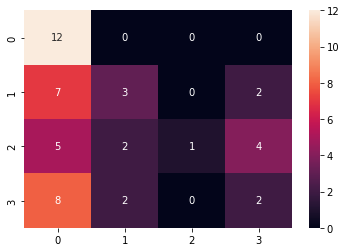

Loading subject  3
Epoch	 train loss	 test acc
0	1.46	0.25
1	1.44	0.25
2	1.43	0.25
3	1.38	0.25
4	1.32	0.25
5	1.29	0.25
6	1.30	0.25
7	1.31	0.25
8	1.30	0.25
9	1.21	0.25
10	1.25	0.28
11	1.25	0.19
12	1.22	0.19
13	1.18	0.14
14	1.16	0.14
15	1.15	0.22
16	1.15	0.17
17	1.12	0.17
18	1.14	0.14
19	1.09	0.14
20	1.09	0.19
21	1.11	0.17
22	1.05	0.14
23	1.11	0.14
24	1.02	0.11
25	1.03	0.14
26	1.06	0.11
27	1.02	0.14
28	0.99	0.14
29	0.95	0.17
30	0.97	0.19
31	0.96	0.19
32	0.92	0.14
33	0.96	0.17
34	0.92	0.14
35	0.92	0.14
36	0.92	0.17
37	0.91	0.17
38	0.85	0.17
39	0.87	0.14
40	0.85	0.17
41	0.84	0.19
42	0.83	0.19
43	0.79	0.22
44	0.79	0.22
45	0.80	0.22
46	0.76	0.22
47	0.76	0.22
48	0.75	0.22
49	0.73	0.22


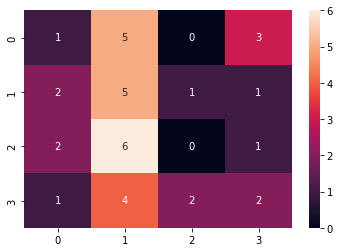

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.45	0.25
2	1.38	0.25
3	1.35	0.25
4	1.31	0.25
5	1.35	0.25
6	1.31	0.25
7	1.29	0.25
8	1.26	0.25
9	1.27	0.25
10	1.22	0.25
11	1.23	0.25
12	1.16	0.25
13	1.23	0.25
14	1.17	0.25
15	1.24	0.25
16	1.17	0.28
17	1.17	0.22
18	1.14	0.28
19	1.09	0.28
20	1.15	0.25
21	1.07	0.22
22	1.08	0.25
23	1.05	0.25
24	1.04	0.31
25	1.03	0.31
26	1.03	0.31
27	0.99	0.31
28	1.00	0.31
29	0.98	0.28
30	0.97	0.33
31	0.94	0.31
32	0.95	0.31
33	0.91	0.31
34	0.92	0.31
35	0.92	0.25
36	0.86	0.25
37	0.88	0.22
38	0.87	0.17
39	0.86	0.19
40	0.88	0.19
41	0.79	0.22
42	0.79	0.25
43	0.80	0.25
44	0.78	0.28
45	0.74	0.25
46	0.73	0.22
47	0.70	0.22
48	0.71	0.22
49	0.69	0.22


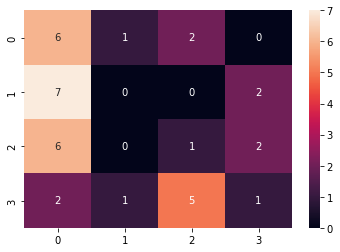

Epoch	 train loss	 test acc
0	1.47	0.25
1	1.42	0.25
2	1.37	0.25
3	1.36	0.25
4	1.39	0.25
5	1.32	0.25
6	1.34	0.25
7	1.26	0.25
8	1.25	0.25
9	1.24	0.25
10	1.23	0.25
11	1.18	0.25
12	1.19	0.25
13	1.15	0.25
14	1.16	0.25
15	1.13	0.25
16	1.11	0.25
17	1.10	0.22
18	1.12	0.25
19	1.07	0.19
20	1.06	0.22
21	1.09	0.19
22	1.04	0.19
23	1.02	0.19
24	1.00	0.19
25	0.96	0.19
26	0.98	0.19
27	0.97	0.19
28	0.95	0.19
29	0.95	0.19
30	0.93	0.19
31	0.90	0.19
32	0.89	0.19
33	0.90	0.19
34	0.86	0.19
35	0.85	0.17
36	0.84	0.17
37	0.84	0.17
38	0.84	0.17
39	0.81	0.17
40	0.81	0.17
41	0.74	0.17
42	0.78	0.17
43	0.78	0.17
44	0.76	0.17
45	0.73	0.19
46	0.75	0.19
47	0.71	0.17
48	0.69	0.17
49	0.68	0.17


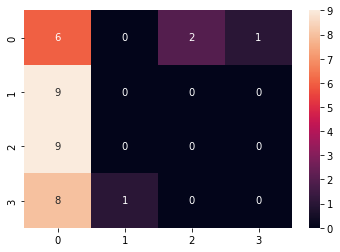

Epoch	 train loss	 test acc
0	1.57	0.25
1	1.54	0.25
2	1.46	0.25
3	1.42	0.25
4	1.37	0.25
5	1.38	0.25
6	1.33	0.25
7	1.33	0.25
8	1.31	0.25
9	1.30	0.25
10	1.27	0.25
11	1.30	0.25
12	1.22	0.25
13	1.21	0.25
14	1.23	0.25
15	1.18	0.25
16	1.17	0.14
17	1.18	0.22
18	1.12	0.28
19	1.12	0.28
20	1.10	0.25
21	1.08	0.25
22	1.07	0.25
23	1.07	0.25
24	1.04	0.25
25	1.06	0.25
26	1.00	0.28
27	1.00	0.28
28	1.00	0.28
29	0.96	0.28
30	0.96	0.28
31	0.93	0.31
32	0.90	0.31
33	0.92	0.28
34	0.89	0.28
35	0.89	0.28
36	0.86	0.28
37	0.86	0.31
38	0.87	0.31
39	0.85	0.31
40	0.80	0.28
41	0.80	0.28
42	0.80	0.28
43	0.78	0.31
44	0.75	0.28
45	0.75	0.28
46	0.76	0.25
47	0.73	0.25
48	0.73	0.22
49	0.71	0.25


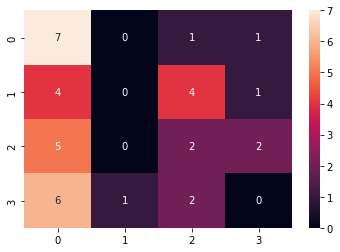

Epoch	 train loss	 test acc
0	1.60	0.25
1	1.52	0.25
2	1.44	0.25
3	1.41	0.25
4	1.38	0.25
5	1.36	0.25
6	1.36	0.25
7	1.29	0.25
8	1.26	0.25
9	1.26	0.25
10	1.25	0.25
11	1.23	0.25
12	1.17	0.25
13	1.17	0.25
14	1.18	0.25
15	1.16	0.25
16	1.11	0.22
17	1.13	0.22
18	1.09	0.22
19	1.12	0.25
20	1.06	0.28
21	1.03	0.25
22	1.04	0.31
23	1.04	0.28
24	0.99	0.31
25	1.03	0.28
26	1.00	0.28
27	0.99	0.28
28	0.97	0.28
29	0.94	0.31
30	0.94	0.31
31	0.88	0.33
32	0.92	0.31
33	0.86	0.33
34	0.88	0.36
35	0.86	0.36
36	0.86	0.36
37	0.83	0.39
38	0.87	0.39
39	0.82	0.39
40	0.82	0.39
41	0.80	0.39
42	0.77	0.36
43	0.77	0.39
44	0.76	0.39
45	0.73	0.39
46	0.74	0.39
47	0.71	0.39
48	0.71	0.39
49	0.69	0.39


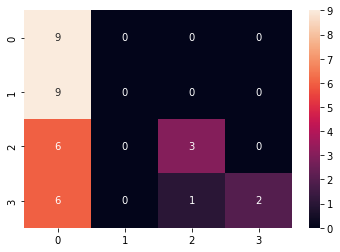

Loading subject  4
Epoch	 train loss	 test acc
0	1.56	0.25
1	1.53	0.25
2	1.45	0.25
3	1.41	0.25
4	1.43	0.25
5	1.41	0.25
6	1.39	0.25
7	1.38	0.25
8	1.33	0.25
9	1.33	0.25
10	1.30	0.25
11	1.31	0.25
12	1.27	0.27
13	1.26	0.25
14	1.26	0.21
15	1.25	0.25
16	1.24	0.27
17	1.20	0.27
18	1.22	0.23
19	1.20	0.23
20	1.17	0.23
21	1.17	0.23
22	1.16	0.25
23	1.14	0.27
24	1.11	0.29
25	1.11	0.33
26	1.10	0.31
27	1.11	0.29
28	1.09	0.33
29	1.07	0.35
30	1.07	0.35
31	1.07	0.33
32	1.05	0.31
33	1.05	0.31
34	1.03	0.31
35	1.00	0.33
36	0.99	0.31
37	1.00	0.31
38	0.99	0.31
39	0.96	0.33
40	0.98	0.29
41	0.99	0.31
42	0.95	0.31
43	0.91	0.35
44	0.93	0.35
45	0.93	0.33
46	0.91	0.35
47	0.90	0.33
48	0.88	0.33
49	0.90	0.35


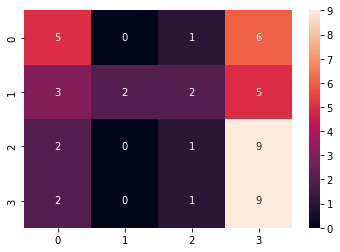

Epoch	 train loss	 test acc
0	1.64	0.25
1	1.53	0.25
2	1.42	0.25
3	1.42	0.25
4	1.35	0.25
5	1.36	0.25
6	1.32	0.25
7	1.31	0.25
8	1.27	0.25
9	1.25	0.25
10	1.20	0.25
11	1.19	0.25
12	1.15	0.27
13	1.19	0.27
14	1.16	0.25
15	1.15	0.25
16	1.17	0.27
17	1.11	0.25
18	1.10	0.27
19	1.09	0.25
20	1.09	0.23
21	1.09	0.23
22	1.06	0.25
23	1.04	0.27
24	1.03	0.25
25	1.05	0.27
26	1.01	0.27
27	1.04	0.25
28	0.98	0.27
29	0.99	0.23
30	0.96	0.23
31	0.97	0.23
32	0.96	0.25
33	0.92	0.27
34	0.92	0.25
35	0.93	0.21
36	0.89	0.21
37	0.91	0.19
38	0.90	0.21
39	0.87	0.19
40	0.86	0.21
41	0.83	0.19
42	0.84	0.21
43	0.83	0.21
44	0.80	0.21
45	0.79	0.21
46	0.78	0.23
47	0.80	0.23
48	0.78	0.21
49	0.78	0.21


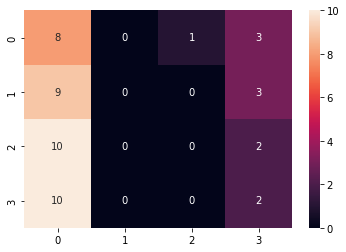

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.51	0.25
2	1.47	0.25
3	1.42	0.25
4	1.38	0.25
5	1.37	0.25
6	1.31	0.25
7	1.28	0.25
8	1.30	0.25
9	1.27	0.25
10	1.26	0.25
11	1.26	0.25
12	1.29	0.31
13	1.18	0.31
14	1.17	0.31
15	1.17	0.31
16	1.12	0.29
17	1.18	0.31
18	1.13	0.31
19	1.16	0.31
20	1.12	0.31
21	1.08	0.29
22	1.07	0.33
23	1.07	0.33
24	1.04	0.31
25	1.05	0.31
26	1.06	0.27
27	1.02	0.29
28	0.99	0.27
29	0.99	0.27
30	1.00	0.29
31	0.99	0.27
32	0.97	0.25
33	0.95	0.25
34	0.94	0.27
35	0.93	0.27
36	0.92	0.29
37	0.92	0.29
38	0.88	0.29
39	0.89	0.29
40	0.86	0.29
41	0.86	0.31
42	0.87	0.27
43	0.85	0.25
44	0.87	0.25
45	0.82	0.25
46	0.85	0.23
47	0.80	0.25
48	0.80	0.25
49	0.80	0.27


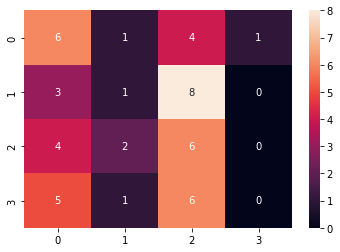

Epoch	 train loss	 test acc
0	1.60	0.25
1	1.53	0.25
2	1.48	0.25
3	1.41	0.25
4	1.42	0.25
5	1.41	0.25
6	1.34	0.25
7	1.36	0.25
8	1.31	0.25
9	1.29	0.25
10	1.34	0.21
11	1.28	0.21
12	1.26	0.21
13	1.25	0.25
14	1.28	0.25
15	1.25	0.25
16	1.24	0.25
17	1.18	0.25
18	1.21	0.25
19	1.18	0.27
20	1.18	0.27
21	1.15	0.29
22	1.14	0.29
23	1.13	0.27
24	1.09	0.27
25	1.09	0.27
26	1.08	0.29
27	1.12	0.29
28	1.07	0.31
29	1.02	0.31
30	1.06	0.31
31	1.02	0.33
32	1.03	0.33
33	1.01	0.33
34	0.99	0.33
35	1.01	0.31
36	1.00	0.31
37	1.00	0.31
38	1.00	0.31
39	0.95	0.29
40	0.97	0.33
41	0.95	0.35
42	0.90	0.33
43	0.91	0.33
44	0.92	0.35
45	0.90	0.33
46	0.91	0.29
47	0.87	0.35
48	0.86	0.35
49	0.86	0.33


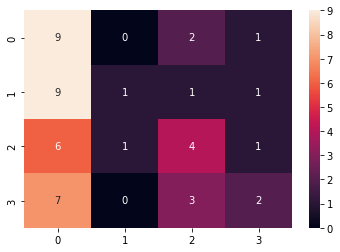

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.38	0.25
2	1.42	0.25
3	1.34	0.25
4	1.34	0.25
5	1.36	0.25
6	1.33	0.25
7	1.28	0.25
8	1.29	0.25
9	1.24	0.25
10	1.22	0.25
11	1.20	0.25
12	1.17	0.25
13	1.17	0.21
14	1.17	0.23
15	1.13	0.23
16	1.14	0.23
17	1.15	0.23
18	1.09	0.23
19	1.08	0.21
20	1.10	0.23
21	1.08	0.23
22	1.04	0.25
23	1.06	0.23
24	1.04	0.25
25	1.05	0.23
26	0.98	0.25
27	0.97	0.23
28	1.00	0.25
29	0.95	0.25
30	0.98	0.25
31	0.95	0.23
32	0.93	0.23
33	0.90	0.23
34	0.93	0.23
35	0.93	0.23
36	0.87	0.23
37	0.88	0.23
38	0.90	0.21
39	0.86	0.23
40	0.83	0.25
41	0.84	0.25
42	0.80	0.25
43	0.83	0.23
44	0.80	0.25
45	0.83	0.25
46	0.79	0.25
47	0.78	0.23
48	0.76	0.21
49	0.77	0.21


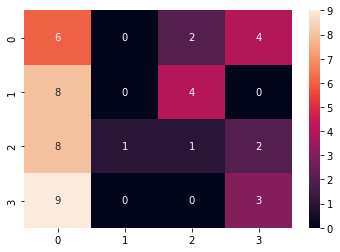

Loading subject  5
Epoch	 train loss	 test acc
0	1.77	0.25
1	1.62	0.25
2	1.53	0.25
3	1.43	0.25
4	1.44	0.25
5	1.37	0.25
6	1.38	0.25
7	1.37	0.25
8	1.34	0.25
9	1.32	0.25
10	1.33	0.19
11	1.29	0.25
12	1.31	0.23
13	1.26	0.19
14	1.26	0.23
15	1.26	0.21
16	1.21	0.21
17	1.23	0.21
18	1.24	0.21
19	1.25	0.23
20	1.18	0.23
21	1.19	0.21
22	1.18	0.21
23	1.16	0.23
24	1.15	0.23
25	1.13	0.25
26	1.10	0.23
27	1.09	0.25
28	1.10	0.25
29	1.12	0.25
30	1.06	0.25
31	1.06	0.23
32	1.09	0.23
33	1.05	0.21
34	0.99	0.19
35	1.03	0.19
36	0.97	0.23
37	1.01	0.19
38	1.00	0.17
39	0.99	0.15
40	0.97	0.19
41	0.97	0.19
42	0.97	0.21
43	0.96	0.19
44	0.94	0.17
45	0.90	0.17
46	0.89	0.17
47	0.91	0.17
48	0.88	0.17
49	0.90	0.17


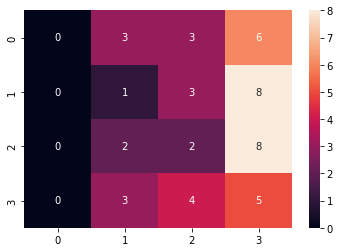

Epoch	 train loss	 test acc
0	1.65	0.25
1	1.54	0.25
2	1.52	0.25
3	1.40	0.25
4	1.41	0.25
5	1.36	0.25
6	1.36	0.25
7	1.32	0.25
8	1.33	0.25
9	1.30	0.25
10	1.30	0.25
11	1.25	0.27
12	1.26	0.25
13	1.23	0.23
14	1.24	0.23
15	1.26	0.21
16	1.24	0.21
17	1.21	0.21
18	1.20	0.25
19	1.17	0.27
20	1.18	0.29
21	1.14	0.25
22	1.14	0.25
23	1.13	0.27
24	1.09	0.27
25	1.11	0.27
26	1.10	0.29
27	1.07	0.29
28	1.05	0.27
29	1.05	0.25
30	1.03	0.25
31	1.02	0.25
32	1.01	0.23
33	1.00	0.25
34	1.01	0.21
35	1.00	0.21
36	0.99	0.21
37	0.97	0.19
38	0.95	0.19
39	0.98	0.23
40	0.91	0.23
41	0.94	0.23
42	0.92	0.23
43	0.90	0.23
44	0.90	0.25
45	0.86	0.27
46	0.83	0.27
47	0.84	0.25
48	0.87	0.25
49	0.84	0.25


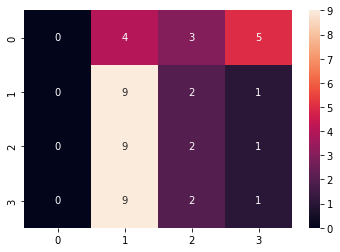

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.48	0.25
2	1.43	0.25
3	1.41	0.25
4	1.40	0.25
5	1.41	0.25
6	1.38	0.25
7	1.33	0.25
8	1.31	0.25
9	1.33	0.25
10	1.33	0.25
11	1.29	0.19
12	1.28	0.21
13	1.24	0.23
14	1.28	0.21
15	1.28	0.23
16	1.20	0.25
17	1.21	0.21
18	1.17	0.23
19	1.21	0.23
20	1.20	0.21
21	1.18	0.21
22	1.17	0.21
23	1.16	0.19
24	1.12	0.19
25	1.15	0.19
26	1.08	0.19
27	1.12	0.19
28	1.11	0.19
29	1.11	0.25
30	1.09	0.21
31	1.04	0.25
32	1.04	0.25
33	1.04	0.25
34	1.05	0.27
35	1.02	0.25
36	1.03	0.23
37	1.07	0.27
38	1.00	0.25
39	1.02	0.25
40	1.00	0.25
41	0.98	0.25
42	0.91	0.25
43	0.95	0.23
44	0.98	0.25
45	0.94	0.23
46	0.92	0.21
47	0.92	0.23
48	0.92	0.23
49	0.88	0.23


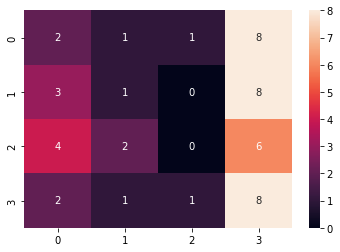

Epoch	 train loss	 test acc
0	1.58	0.25
1	1.45	0.25
2	1.41	0.25
3	1.39	0.25
4	1.41	0.25
5	1.35	0.25
6	1.33	0.25
7	1.33	0.25
8	1.31	0.25
9	1.31	0.25
10	1.28	0.25
11	1.28	0.29
12	1.24	0.25
13	1.24	0.29
14	1.20	0.29
15	1.20	0.31
16	1.21	0.29
17	1.18	0.29
18	1.16	0.29
19	1.21	0.31
20	1.15	0.31
21	1.16	0.29
22	1.14	0.29
23	1.14	0.29
24	1.10	0.31
25	1.11	0.31
26	1.08	0.33
27	1.08	0.31
28	1.08	0.29
29	1.05	0.31
30	1.08	0.29
31	1.01	0.29
32	0.99	0.29
33	0.97	0.29
34	1.03	0.29
35	0.97	0.27
36	0.97	0.27
37	0.98	0.29
38	0.93	0.31
39	0.93	0.31
40	0.91	0.31
41	0.92	0.31
42	0.91	0.29
43	0.93	0.31
44	0.90	0.29
45	0.88	0.29
46	0.89	0.29
47	0.86	0.29
48	0.87	0.31
49	0.84	0.31


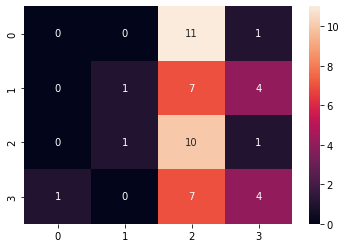

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.42	0.25
2	1.46	0.25
3	1.41	0.25
4	1.43	0.25
5	1.39	0.25
6	1.33	0.25
7	1.35	0.25
8	1.34	0.25
9	1.32	0.25
10	1.30	0.25
11	1.28	0.25
12	1.28	0.23
13	1.24	0.25
14	1.19	0.21
15	1.22	0.21
16	1.22	0.27
17	1.19	0.25
18	1.20	0.27
19	1.18	0.29
20	1.14	0.25
21	1.16	0.23
22	1.15	0.25
23	1.10	0.23
24	1.10	0.23
25	1.10	0.25
26	1.08	0.25
27	1.07	0.25
28	1.07	0.25
29	1.08	0.25
30	1.00	0.25
31	1.03	0.25
32	1.04	0.27
33	1.00	0.27
34	0.98	0.31
35	0.95	0.29
36	0.98	0.29
37	0.95	0.29
38	0.93	0.29
39	0.94	0.29
40	0.92	0.29
41	0.88	0.29
42	0.90	0.29
43	0.86	0.29
44	0.87	0.31
45	0.92	0.31
46	0.86	0.31
47	0.84	0.31
48	0.82	0.31
49	0.82	0.31


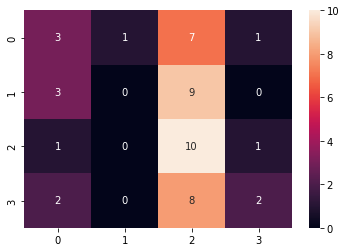

Loading subject  6
Epoch	 train loss	 test acc
0	1.51	0.25
1	1.46	0.25
2	1.39	0.25
3	1.41	0.25
4	1.39	0.25
5	1.31	0.25
6	1.28	0.25
7	1.32	0.25
8	1.27	0.25
9	1.27	0.25
10	1.22	0.25
11	1.23	0.25
12	1.20	0.25
13	1.16	0.23
14	1.15	0.27
15	1.14	0.30
16	1.10	0.30
17	1.07	0.30
18	1.08	0.27
19	1.07	0.27
20	1.02	0.25
21	1.00	0.25
22	1.01	0.25
23	1.00	0.25
24	0.95	0.25
25	0.92	0.25
26	0.95	0.25
27	0.88	0.27
28	0.93	0.27
29	0.89	0.27
30	0.85	0.30
31	0.83	0.27
32	0.82	0.27
33	0.82	0.27
34	0.81	0.25
35	0.79	0.25
36	0.79	0.25
37	0.75	0.25
38	0.73	0.25
39	0.70	0.25
40	0.73	0.23
41	0.69	0.23
42	0.71	0.23
43	0.70	0.23
44	0.65	0.23
45	0.64	0.23
46	0.62	0.23
47	0.61	0.23
48	0.59	0.23
49	0.58	0.23


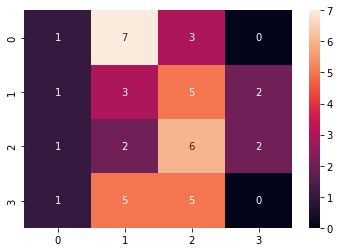

Epoch	 train loss	 test acc
0	1.54	0.26
1	1.43	0.26
2	1.38	0.26
3	1.33	0.26
4	1.34	0.26
5	1.30	0.26
6	1.29	0.26
7	1.28	0.26
8	1.23	0.26
9	1.20	0.26
10	1.17	0.26
11	1.16	0.26
12	1.14	0.26
13	1.13	0.23
14	1.12	0.21
15	1.06	0.23
16	1.06	0.23
17	1.07	0.23
18	1.00	0.23
19	0.99	0.21
20	1.00	0.21
21	0.94	0.23
22	0.96	0.23
23	0.92	0.28
24	0.91	0.28
25	0.86	0.28
26	0.84	0.26
27	0.82	0.26
28	0.84	0.26
29	0.81	0.26
30	0.78	0.28
31	0.77	0.30
32	0.75	0.30
33	0.71	0.28
34	0.69	0.30
35	0.68	0.30
36	0.67	0.28
37	0.66	0.30
38	0.64	0.30
39	0.62	0.30
40	0.61	0.30
41	0.59	0.30
42	0.57	0.30
43	0.55	0.30
44	0.54	0.30
45	0.53	0.33
46	0.48	0.30
47	0.49	0.33
48	0.46	0.35
49	0.46	0.35


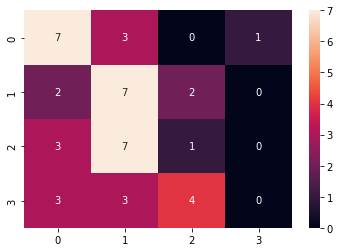

Epoch	 train loss	 test acc
0	1.53	0.26
1	1.51	0.26
2	1.47	0.26
3	1.44	0.26
4	1.34	0.26
5	1.32	0.26
6	1.33	0.26
7	1.32	0.26
8	1.29	0.26
9	1.24	0.26
10	1.23	0.26
11	1.25	0.26
12	1.16	0.26
13	1.23	0.21
14	1.19	0.14
15	1.15	0.19
16	1.16	0.19
17	1.12	0.19
18	1.10	0.21
19	1.10	0.21
20	1.08	0.19
21	1.08	0.21
22	1.03	0.21
23	1.02	0.19
24	1.03	0.21
25	0.99	0.19
26	0.97	0.16
27	0.98	0.14
28	0.94	0.14
29	0.93	0.14
30	0.91	0.16
31	0.85	0.21
32	0.89	0.19
33	0.87	0.14
34	0.84	0.14
35	0.83	0.14
36	0.80	0.16
37	0.79	0.19
38	0.81	0.14
39	0.77	0.16
40	0.73	0.16
41	0.73	0.16
42	0.70	0.16
43	0.72	0.16
44	0.69	0.19
45	0.69	0.19
46	0.65	0.19
47	0.66	0.19
48	0.65	0.19
49	0.61	0.19


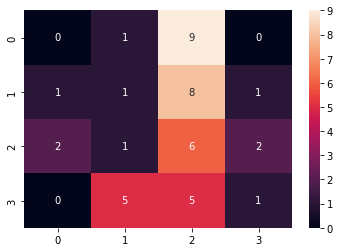

Epoch	 train loss	 test acc
0	1.62	0.26
1	1.52	0.26
2	1.45	0.26
3	1.42	0.26
4	1.38	0.26
5	1.31	0.26
6	1.28	0.26
7	1.28	0.26
8	1.25	0.26
9	1.24	0.26
10	1.21	0.26
11	1.15	0.26
12	1.17	0.23
13	1.14	0.23
14	1.14	0.26
15	1.12	0.23
16	1.08	0.23
17	1.06	0.26
18	1.04	0.26
19	1.03	0.26
20	1.04	0.23
21	0.99	0.23
22	1.00	0.26
23	0.96	0.23
24	0.94	0.23
25	0.94	0.26
26	0.92	0.26
27	0.92	0.26
28	0.87	0.26
29	0.85	0.26
30	0.83	0.26
31	0.83	0.26
32	0.78	0.26
33	0.77	0.26
34	0.79	0.23
35	0.76	0.23
36	0.75	0.23
37	0.72	0.26
38	0.73	0.26
39	0.70	0.26
40	0.66	0.23
41	0.71	0.19
42	0.65	0.21
43	0.63	0.21
44	0.62	0.21
45	0.61	0.19
46	0.61	0.19
47	0.57	0.19
48	0.57	0.19
49	0.57	0.19


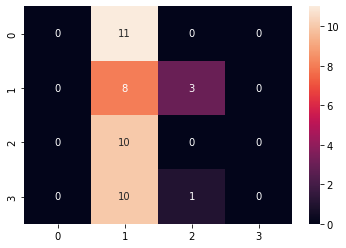

Epoch	 train loss	 test acc
0	1.64	0.26
1	1.51	0.26
2	1.46	0.26
3	1.39	0.26
4	1.38	0.26
5	1.35	0.26
6	1.33	0.26
7	1.26	0.26
8	1.25	0.26
9	1.24	0.26
10	1.24	0.26
11	1.21	0.21
12	1.19	0.23
13	1.18	0.19
14	1.17	0.16
15	1.11	0.19
16	1.12	0.19
17	1.09	0.19
18	1.09	0.19
19	1.07	0.19
20	1.08	0.19
21	1.00	0.19
22	0.97	0.16
23	1.01	0.19
24	0.99	0.19
25	0.94	0.21
26	0.96	0.23
27	0.92	0.23
28	0.93	0.26
29	0.92	0.26
30	0.86	0.26
31	0.85	0.21
32	0.85	0.19
33	0.83	0.19
34	0.80	0.21
35	0.79	0.23
36	0.80	0.23
37	0.77	0.23
38	0.74	0.26
39	0.73	0.26
40	0.73	0.23
41	0.71	0.23
42	0.69	0.21
43	0.68	0.21
44	0.65	0.21
45	0.63	0.19
46	0.64	0.21
47	0.60	0.21
48	0.56	0.21
49	0.57	0.21


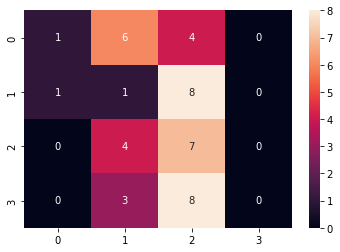

Loading subject  7
Epoch	 train loss	 test acc
0	1.54	0.25
1	1.46	0.25
2	1.40	0.25
3	1.35	0.25
4	1.32	0.25
5	1.32	0.25
6	1.30	0.25
7	1.29	0.25
8	1.22	0.25
9	1.23	0.25
10	1.19	0.25
11	1.19	0.27
12	1.16	0.33
13	1.16	0.27
14	1.14	0.27
15	1.11	0.27
16	1.10	0.27
17	1.04	0.29
18	1.05	0.31
19	1.01	0.29
20	1.03	0.31
21	1.01	0.33
22	0.96	0.33
23	0.95	0.33
24	0.95	0.33
25	0.95	0.35
26	0.90	0.33
27	0.90	0.33
28	0.90	0.40
29	0.89	0.38
30	0.87	0.38
31	0.82	0.38
32	0.81	0.38
33	0.80	0.35
34	0.81	0.38
35	0.79	0.40
36	0.77	0.40
37	0.74	0.35
38	0.74	0.38
39	0.71	0.40
40	0.71	0.35
41	0.69	0.35
42	0.68	0.38
43	0.68	0.38
44	0.62	0.38
45	0.63	0.35
46	0.60	0.35
47	0.61	0.38
48	0.59	0.35
49	0.57	0.38


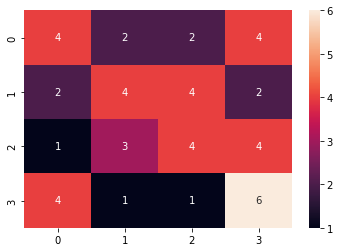

Epoch	 train loss	 test acc
0	1.47	0.25
1	1.47	0.25
2	1.37	0.25
3	1.37	0.25
4	1.34	0.25
5	1.35	0.25
6	1.33	0.25
7	1.28	0.25
8	1.28	0.25
9	1.25	0.25
10	1.25	0.21
11	1.22	0.23
12	1.21	0.21
13	1.20	0.15
14	1.16	0.17
15	1.16	0.15
16	1.16	0.15
17	1.12	0.12
18	1.09	0.15
19	1.08	0.17
20	1.10	0.15
21	1.07	0.15
22	1.05	0.17
23	1.05	0.17
24	1.03	0.17
25	1.03	0.15
26	1.00	0.15
27	0.96	0.17
28	0.98	0.15
29	0.97	0.17
30	0.97	0.19
31	0.95	0.19
32	0.91	0.19
33	0.88	0.19
34	0.88	0.19
35	0.88	0.19
36	0.85	0.15
37	0.85	0.17
38	0.82	0.17
39	0.81	0.17
40	0.81	0.17
41	0.78	0.17
42	0.77	0.17
43	0.80	0.17
44	0.75	0.12
45	0.74	0.15
46	0.76	0.15
47	0.70	0.15
48	0.70	0.15
49	0.69	0.15


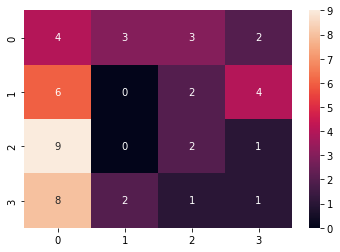

Epoch	 train loss	 test acc
0	1.48	0.25
1	1.44	0.25
2	1.42	0.25
3	1.39	0.25
4	1.36	0.25
5	1.35	0.25
6	1.30	0.25
7	1.29	0.25
8	1.28	0.25
9	1.27	0.25
10	1.28	0.23
11	1.25	0.27
12	1.18	0.23
13	1.18	0.17
14	1.20	0.17
15	1.13	0.19
16	1.15	0.19
17	1.11	0.21
18	1.11	0.23
19	1.08	0.25
20	1.08	0.25
21	1.06	0.25
22	1.04	0.25
23	1.02	0.23
24	1.01	0.23
25	0.99	0.25
26	0.95	0.25
27	0.98	0.21
28	0.98	0.25
29	0.92	0.23
30	0.91	0.25
31	0.90	0.27
32	0.91	0.23
33	0.89	0.23
34	0.84	0.23
35	0.85	0.27
36	0.86	0.27
37	0.82	0.25
38	0.80	0.25
39	0.80	0.25
40	0.78	0.27
41	0.78	0.25
42	0.74	0.25
43	0.76	0.27
44	0.75	0.25
45	0.71	0.27
46	0.70	0.27
47	0.66	0.27
48	0.68	0.27
49	0.68	0.27


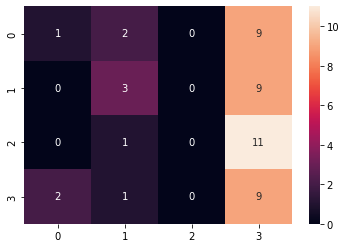

Epoch	 train loss	 test acc
0	1.54	0.25
1	1.48	0.25
2	1.41	0.25
3	1.40	0.25
4	1.37	0.25
5	1.35	0.25
6	1.31	0.25
7	1.30	0.25
8	1.28	0.25
9	1.27	0.23
10	1.22	0.21
11	1.23	0.19
12	1.25	0.15
13	1.18	0.15
14	1.21	0.15
15	1.18	0.15
16	1.15	0.17
17	1.12	0.15
18	1.14	0.15
19	1.09	0.15
20	1.08	0.15
21	1.10	0.15
22	1.05	0.15
23	1.04	0.15
24	1.03	0.15
25	1.04	0.15
26	0.99	0.19
27	0.96	0.19
28	0.97	0.19
29	0.95	0.19
30	0.93	0.19
31	0.90	0.19
32	0.91	0.19
33	0.88	0.21
34	0.87	0.21
35	0.86	0.21
36	0.85	0.21
37	0.85	0.21
38	0.83	0.21
39	0.79	0.21
40	0.79	0.19
41	0.77	0.19
42	0.77	0.19
43	0.72	0.19
44	0.71	0.19
45	0.71	0.17
46	0.69	0.17
47	0.68	0.15
48	0.67	0.17
49	0.67	0.15


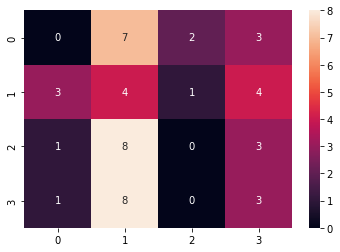

Epoch	 train loss	 test acc
0	1.51	0.25
1	1.44	0.25
2	1.40	0.25
3	1.39	0.25
4	1.32	0.25
5	1.37	0.25
6	1.29	0.25
7	1.28	0.25
8	1.22	0.25
9	1.19	0.25
10	1.20	0.25
11	1.21	0.19
12	1.22	0.15
13	1.15	0.15
14	1.14	0.17
15	1.10	0.17
16	1.11	0.17
17	1.07	0.19
18	1.05	0.21
19	1.04	0.19
20	1.05	0.17
21	1.03	0.17
22	1.04	0.15
23	1.03	0.15
24	0.97	0.17
25	0.96	0.19
26	0.94	0.19
27	0.95	0.19
28	0.91	0.19
29	0.90	0.19
30	0.88	0.19
31	0.88	0.19
32	0.87	0.19
33	0.84	0.19
34	0.84	0.19
35	0.80	0.19
36	0.78	0.21
37	0.79	0.19
38	0.76	0.19
39	0.75	0.21
40	0.77	0.21
41	0.74	0.23
42	0.71	0.23
43	0.72	0.21
44	0.69	0.19
45	0.65	0.19
46	0.66	0.21
47	0.65	0.21
48	0.67	0.21
49	0.63	0.19


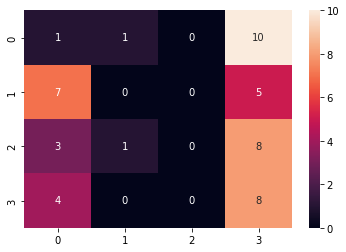

Loading subject  8
Epoch	 train loss	 test acc
0	1.51	0.25
1	1.41	0.25
2	1.38	0.25
3	1.35	0.25
4	1.27	0.25
5	1.28	0.25
6	1.25	0.25
7	1.22	0.25
8	1.23	0.25
9	1.18	0.25
10	1.15	0.25
11	1.16	0.25
12	1.12	0.25
13	1.12	0.25
14	1.06	0.25
15	1.03	0.30
16	1.03	0.28
17	1.02	0.30
18	0.98	0.28
19	0.98	0.30
20	0.96	0.35
21	0.93	0.35
22	0.92	0.38
23	0.91	0.35
24	0.88	0.33
25	0.89	0.33
26	0.88	0.33
27	0.83	0.38
28	0.85	0.35
29	0.83	0.33
30	0.80	0.33
31	0.81	0.35
32	0.77	0.33
33	0.79	0.35
34	0.77	0.35
35	0.74	0.35
36	0.72	0.35
37	0.72	0.40
38	0.72	0.40
39	0.70	0.38
40	0.69	0.40
41	0.68	0.38
42	0.64	0.40
43	0.64	0.38
44	0.62	0.38
45	0.63	0.38
46	0.62	0.38
47	0.59	0.38
48	0.58	0.35
49	0.54	0.35


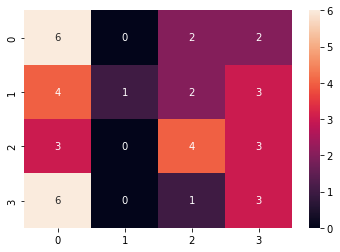

Epoch	 train loss	 test acc
0	1.46	0.25
1	1.42	0.25
2	1.39	0.25
3	1.35	0.25
4	1.37	0.25
5	1.33	0.25
6	1.30	0.25
7	1.28	0.25
8	1.26	0.25
9	1.22	0.25
10	1.21	0.25
11	1.18	0.25
12	1.22	0.25
13	1.15	0.28
14	1.14	0.30
15	1.11	0.23
16	1.08	0.23
17	1.07	0.23
18	1.08	0.25
19	1.07	0.33
20	1.05	0.33
21	1.00	0.33
22	1.00	0.30
23	0.98	0.28
24	0.97	0.30
25	0.95	0.30
26	0.95	0.30
27	0.95	0.30
28	0.91	0.33
29	0.88	0.30
30	0.86	0.28
31	0.86	0.28
32	0.84	0.28
33	0.85	0.30
34	0.82	0.30
35	0.81	0.30
36	0.79	0.33
37	0.78	0.33
38	0.77	0.33
39	0.74	0.30
40	0.73	0.33
41	0.73	0.35
42	0.73	0.33
43	0.68	0.33
44	0.70	0.33
45	0.67	0.33
46	0.68	0.33
47	0.67	0.33
48	0.64	0.33
49	0.62	0.33


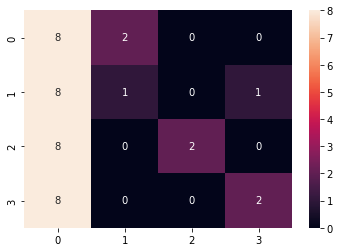

Epoch	 train loss	 test acc
0	1.54	0.25
1	1.48	0.25
2	1.45	0.25
3	1.35	0.25
4	1.32	0.25
5	1.29	0.25
6	1.29	0.25
7	1.27	0.25
8	1.25	0.25
9	1.20	0.25
10	1.21	0.25
11	1.16	0.25
12	1.17	0.25
13	1.14	0.25
14	1.11	0.25
15	1.10	0.25
16	1.08	0.28
17	1.06	0.28
18	1.07	0.28
19	1.04	0.28
20	1.02	0.28
21	0.97	0.28
22	0.97	0.28
23	0.96	0.28
24	0.97	0.25
25	0.95	0.25
26	0.93	0.25
27	0.90	0.25
28	0.92	0.25
29	0.88	0.25
30	0.85	0.25
31	0.89	0.25
32	0.85	0.25
33	0.85	0.25
34	0.83	0.25
35	0.80	0.25
36	0.80	0.25
37	0.81	0.25
38	0.81	0.25
39	0.79	0.25
40	0.71	0.25
41	0.75	0.25
42	0.72	0.25
43	0.73	0.23
44	0.72	0.23
45	0.73	0.25
46	0.68	0.23
47	0.69	0.23
48	0.63	0.23
49	0.66	0.23


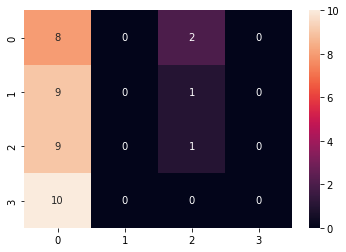

Epoch	 train loss	 test acc
0	1.63	0.25
1	1.56	0.25
2	1.45	0.25
3	1.42	0.25
4	1.34	0.25
5	1.34	0.25
6	1.31	0.25
7	1.27	0.25
8	1.24	0.25
9	1.27	0.25
10	1.21	0.25
11	1.20	0.25
12	1.13	0.25
13	1.18	0.25
14	1.14	0.28
15	1.07	0.23
16	1.09	0.25
17	1.07	0.25
18	1.04	0.23
19	1.02	0.23
20	0.97	0.25
21	0.99	0.25
22	0.95	0.23
23	0.95	0.23
24	0.94	0.23
25	0.89	0.25
26	0.90	0.23
27	0.88	0.25
28	0.89	0.25
29	0.86	0.28
30	0.85	0.28
31	0.83	0.28
32	0.82	0.25
33	0.79	0.25
34	0.78	0.25
35	0.77	0.25
36	0.74	0.25
37	0.72	0.25
38	0.73	0.25
39	0.71	0.25
40	0.69	0.25
41	0.69	0.25
42	0.68	0.25
43	0.66	0.25
44	0.66	0.25
45	0.64	0.28
46	0.62	0.25
47	0.62	0.28
48	0.60	0.25
49	0.61	0.25


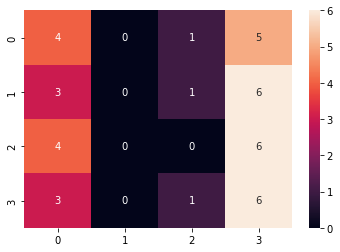

Epoch	 train loss	 test acc
0	1.59	0.25
1	1.50	0.25
2	1.46	0.25
3	1.39	0.25
4	1.37	0.25
5	1.34	0.25
6	1.32	0.25
7	1.27	0.25
8	1.26	0.25
9	1.22	0.25
10	1.19	0.25
11	1.21	0.25
12	1.18	0.25
13	1.15	0.28
14	1.10	0.28
15	1.13	0.28
16	1.10	0.30
17	1.03	0.30
18	1.01	0.30
19	1.00	0.30
20	1.01	0.33
21	0.98	0.28
22	0.98	0.28
23	0.94	0.30
24	0.92	0.28
25	0.90	0.28
26	0.93	0.25
27	0.88	0.23
28	0.86	0.23
29	0.86	0.28
30	0.84	0.25
31	0.83	0.25
32	0.81	0.25
33	0.80	0.25
34	0.78	0.25
35	0.78	0.25
36	0.75	0.25
37	0.76	0.25
38	0.73	0.25
39	0.74	0.28
40	0.73	0.30
41	0.68	0.30
42	0.67	0.30
43	0.67	0.30
44	0.64	0.30
45	0.61	0.30
46	0.59	0.30
47	0.60	0.30
48	0.60	0.30
49	0.59	0.30


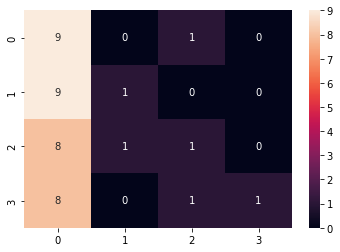

Loading subject  9
Epoch	 train loss	 test acc
0	1.53	0.25
1	1.43	0.25
2	1.42	0.25
3	1.41	0.25
4	1.38	0.25
5	1.33	0.25
6	1.34	0.25
7	1.30	0.25
8	1.26	0.25
9	1.25	0.27
10	1.25	0.27
11	1.19	0.25
12	1.20	0.17
13	1.15	0.17
14	1.16	0.21
15	1.18	0.21
16	1.11	0.21
17	1.12	0.19
18	1.10	0.21
19	1.08	0.19
20	1.09	0.17
21	1.06	0.21
22	1.02	0.21
23	1.05	0.25
24	1.03	0.29
25	0.98	0.29
26	0.99	0.29
27	0.96	0.27
28	0.95	0.29
29	0.94	0.27
30	0.94	0.27
31	0.93	0.27
32	0.91	0.27
33	0.91	0.29
34	0.87	0.27
35	0.85	0.27
36	0.85	0.27
37	0.84	0.27
38	0.84	0.27
39	0.81	0.27
40	0.84	0.27
41	0.83	0.25
42	0.79	0.27
43	0.77	0.27
44	0.77	0.27
45	0.79	0.27
46	0.75	0.27
47	0.75	0.27
48	0.71	0.27
49	0.71	0.27


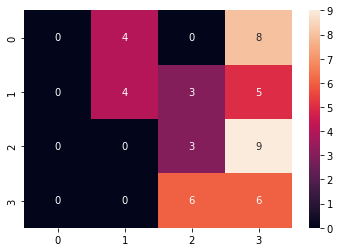

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.45	0.25
2	1.40	0.25
3	1.39	0.25
4	1.33	0.25
5	1.29	0.25
6	1.34	0.25
7	1.26	0.25
8	1.29	0.25
9	1.25	0.25
10	1.23	0.25
11	1.22	0.25
12	1.22	0.21
13	1.19	0.23
14	1.17	0.21
15	1.17	0.21
16	1.13	0.21
17	1.16	0.21
18	1.15	0.21
19	1.10	0.21
20	1.12	0.21
21	1.11	0.21
22	1.07	0.21
23	1.06	0.21
24	1.07	0.21
25	1.02	0.21
26	1.04	0.23
27	1.00	0.23
28	1.00	0.23
29	0.99	0.23
30	0.97	0.23
31	0.96	0.23
32	0.97	0.23
33	0.94	0.23
34	0.94	0.23
35	0.93	0.23
36	0.89	0.23
37	0.91	0.25
38	0.91	0.25
39	0.88	0.25
40	0.88	0.25
41	0.87	0.25
42	0.84	0.25
43	0.83	0.25
44	0.83	0.23
45	0.80	0.25
46	0.80	0.25
47	0.80	0.23
48	0.77	0.23
49	0.77	0.23


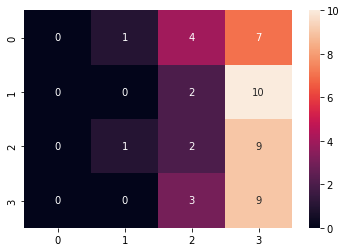

Epoch	 train loss	 test acc
0	1.49	0.25
1	1.43	0.25
2	1.42	0.25
3	1.37	0.25
4	1.38	0.25
5	1.35	0.25
6	1.32	0.25
7	1.31	0.25
8	1.26	0.25
9	1.25	0.25
10	1.26	0.27
11	1.26	0.27
12	1.20	0.33
13	1.22	0.31
14	1.19	0.31
15	1.17	0.29
16	1.18	0.35
17	1.13	0.33
18	1.16	0.35
19	1.09	0.33
20	1.09	0.33
21	1.09	0.33
22	1.06	0.35
23	1.06	0.33
24	1.04	0.35
25	1.05	0.35
26	1.02	0.35
27	1.02	0.38
28	1.00	0.38
29	0.99	0.38
30	0.98	0.38
31	0.95	0.40
32	0.93	0.40
33	0.93	0.40
34	0.92	0.40
35	0.90	0.38
36	0.89	0.40
37	0.90	0.38
38	0.89	0.38
39	0.88	0.38
40	0.85	0.35
41	0.86	0.38
42	0.85	0.42
43	0.80	0.42
44	0.83	0.40
45	0.79	0.40
46	0.77	0.42
47	0.79	0.40
48	0.77	0.40
49	0.76	0.40


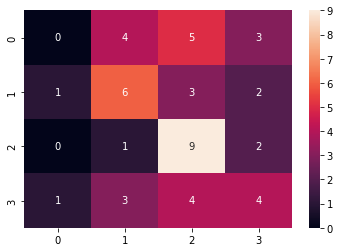

Epoch	 train loss	 test acc
0	1.55	0.25
1	1.43	0.25
2	1.39	0.25
3	1.38	0.25
4	1.31	0.25
5	1.27	0.25
6	1.31	0.25
7	1.24	0.25
8	1.25	0.25
9	1.24	0.25
10	1.23	0.25
11	1.21	0.27
12	1.20	0.23
13	1.16	0.23
14	1.12	0.27
15	1.16	0.27
16	1.10	0.25
17	1.06	0.27
18	1.07	0.23
19	1.06	0.27
20	1.04	0.27
21	1.03	0.27
22	0.99	0.29
23	1.03	0.29
24	0.96	0.29
25	0.97	0.29
26	0.97	0.27
27	0.98	0.29
28	0.95	0.29
29	0.92	0.29
30	0.91	0.31
31	0.88	0.31
32	0.87	0.31
33	0.87	0.31
34	0.86	0.33
35	0.81	0.27
36	0.83	0.31
37	0.80	0.31
38	0.79	0.31
39	0.79	0.33
40	0.80	0.33
41	0.76	0.29
42	0.73	0.27
43	0.73	0.27
44	0.74	0.27
45	0.74	0.29
46	0.71	0.27
47	0.69	0.27
48	0.66	0.29
49	0.69	0.27


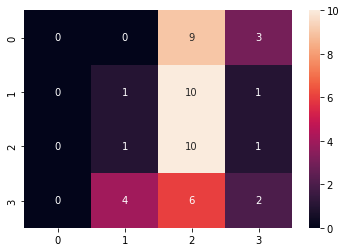

Epoch	 train loss	 test acc
0	1.60	0.25
1	1.52	0.25
2	1.43	0.25
3	1.46	0.25
4	1.39	0.25
5	1.38	0.25
6	1.34	0.25
7	1.35	0.25
8	1.28	0.25
9	1.32	0.25
10	1.30	0.25
11	1.25	0.29
12	1.27	0.25
13	1.25	0.17
14	1.21	0.17
15	1.19	0.17
16	1.20	0.17
17	1.20	0.21
18	1.18	0.21
19	1.18	0.23
20	1.14	0.23
21	1.13	0.23
22	1.13	0.19
23	1.12	0.21
24	1.12	0.25
25	1.13	0.27
26	1.08	0.25
27	1.07	0.25
28	1.06	0.25
29	1.04	0.25
30	1.05	0.25
31	1.01	0.27
32	1.01	0.27
33	0.99	0.25
34	1.02	0.21
35	1.01	0.23
36	1.00	0.25
37	1.00	0.23
38	0.95	0.21
39	0.94	0.21
40	0.93	0.25
41	0.93	0.23
42	0.90	0.23
43	0.94	0.27
44	0.87	0.27
45	0.88	0.23
46	0.86	0.23
47	0.86	0.25
48	0.86	0.25
49	0.83	0.29


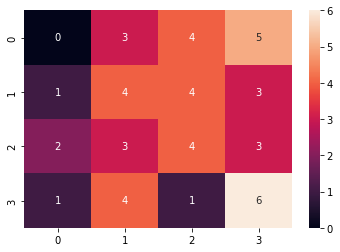

Loading subject  10
Epoch	 train loss	 test acc
0	1.49	0.25
1	1.43	0.25
2	1.36	0.25
3	1.33	0.25
4	1.36	0.25
5	1.31	0.25
6	1.27	0.25
7	1.28	0.25
8	1.24	0.25
9	1.22	0.25
10	1.18	0.25
11	1.17	0.31
12	1.19	0.35
13	1.18	0.38
14	1.12	0.38
15	1.10	0.38
16	1.10	0.38
17	1.08	0.35
18	1.07	0.38
19	1.05	0.38
20	1.06	0.38
21	1.03	0.38
22	1.01	0.35
23	1.02	0.33
24	1.00	0.33
25	0.96	0.31
26	0.97	0.31
27	0.96	0.31
28	0.92	0.35
29	0.93	0.35
30	0.90	0.35
31	0.86	0.35
32	0.90	0.35
33	0.85	0.33
34	0.85	0.35
35	0.85	0.33
36	0.81	0.33
37	0.83	0.35
38	0.76	0.35
39	0.75	0.35
40	0.77	0.35
41	0.78	0.35
42	0.77	0.35
43	0.75	0.38
44	0.73	0.38
45	0.73	0.35
46	0.71	0.35
47	0.69	0.33
48	0.68	0.33
49	0.66	0.33


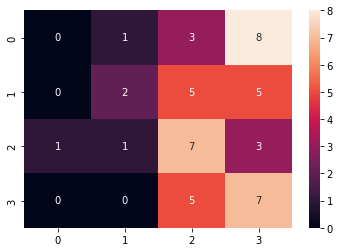

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.48	0.25
2	1.41	0.25
3	1.38	0.25
4	1.34	0.25
5	1.31	0.25
6	1.31	0.25
7	1.30	0.25
8	1.26	0.25
9	1.22	0.25
10	1.26	0.25
11	1.24	0.23
12	1.20	0.23
13	1.17	0.25
14	1.20	0.25
15	1.18	0.23
16	1.14	0.23
17	1.16	0.19
18	1.11	0.21
19	1.12	0.21
20	1.09	0.21
21	1.09	0.21
22	1.09	0.21
23	1.08	0.23
24	1.05	0.23
25	1.03	0.23
26	1.03	0.23
27	1.01	0.23
28	0.98	0.23
29	1.02	0.23
30	0.99	0.23
31	0.96	0.23
32	0.96	0.23
33	0.94	0.23
34	0.95	0.23
35	0.95	0.23
36	0.88	0.23
37	0.87	0.23
38	0.88	0.23
39	0.89	0.23
40	0.90	0.23
41	0.88	0.23
42	0.87	0.23
43	0.83	0.23
44	0.78	0.23
45	0.80	0.23
46	0.80	0.23
47	0.81	0.23
48	0.78	0.23
49	0.78	0.23


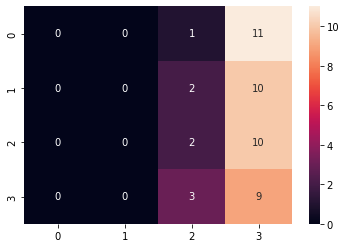

Epoch	 train loss	 test acc
0	1.55	0.25
1	1.45	0.25
2	1.45	0.25
3	1.35	0.25
4	1.39	0.25
5	1.33	0.25
6	1.33	0.25
7	1.28	0.23
8	1.28	0.25
9	1.25	0.25
10	1.21	0.25
11	1.23	0.27
12	1.21	0.29
13	1.19	0.29
14	1.19	0.29
15	1.18	0.31
16	1.14	0.29
17	1.13	0.27
18	1.12	0.27
19	1.13	0.25
20	1.07	0.27
21	1.07	0.25
22	1.06	0.27
23	1.02	0.27
24	1.05	0.27
25	0.98	0.27
26	1.01	0.27
27	1.02	0.27
28	1.01	0.27
29	0.99	0.25
30	0.95	0.25
31	0.96	0.29
32	0.90	0.29
33	0.91	0.29
34	0.90	0.29
35	0.90	0.27
36	0.88	0.29
37	0.89	0.29
38	0.87	0.29
39	0.86	0.29
40	0.84	0.29
41	0.82	0.29
42	0.83	0.31
43	0.81	0.33
44	0.79	0.33
45	0.80	0.33
46	0.79	0.33
47	0.74	0.31
48	0.74	0.31
49	0.75	0.31


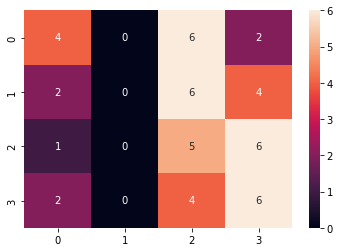

Epoch	 train loss	 test acc
0	1.51	0.25
1	1.43	0.25
2	1.37	0.25
3	1.37	0.25
4	1.34	0.25
5	1.34	0.25
6	1.29	0.25
7	1.27	0.25
8	1.26	0.25
9	1.27	0.25
10	1.21	0.25
11	1.17	0.25
12	1.18	0.23
13	1.16	0.23
14	1.16	0.21
15	1.12	0.21
16	1.13	0.19
17	1.11	0.19
18	1.11	0.21
19	1.08	0.21
20	1.08	0.19
21	1.08	0.19
22	1.03	0.19
23	1.03	0.19
24	1.03	0.17
25	1.00	0.21
26	1.01	0.21
27	0.99	0.21
28	0.94	0.21
29	0.98	0.21
30	0.95	0.23
31	0.94	0.23
32	0.94	0.23
33	0.92	0.23
34	0.89	0.19
35	0.89	0.19
36	0.85	0.19
37	0.88	0.19
38	0.85	0.19
39	0.82	0.19
40	0.81	0.21
41	0.80	0.23
42	0.79	0.21
43	0.77	0.23
44	0.80	0.23
45	0.78	0.21
46	0.77	0.21
47	0.74	0.21
48	0.74	0.19
49	0.72	0.19


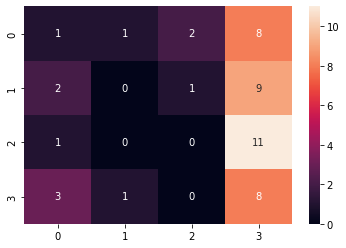

Epoch	 train loss	 test acc
0	1.52	0.25
1	1.45	0.25
2	1.46	0.25
3	1.41	0.25
4	1.36	0.25
5	1.38	0.25
6	1.36	0.25
7	1.31	0.25
8	1.29	0.25
9	1.29	0.25
10	1.25	0.25
11	1.27	0.25
12	1.20	0.25
13	1.24	0.25
14	1.23	0.25
15	1.21	0.25
16	1.18	0.25
17	1.18	0.25
18	1.21	0.25
19	1.16	0.25
20	1.15	0.25
21	1.12	0.25
22	1.11	0.25
23	1.11	0.25
24	1.12	0.25
25	1.07	0.25
26	1.08	0.25
27	1.05	0.25
28	1.07	0.25
29	1.02	0.25
30	1.01	0.25
31	1.01	0.27
32	1.00	0.27
33	0.95	0.27
34	0.98	0.27
35	1.01	0.29
36	0.95	0.29
37	0.93	0.29
38	0.95	0.29
39	0.90	0.27
40	0.89	0.29
41	0.86	0.27
42	0.87	0.25
43	0.88	0.27
44	0.84	0.27
45	0.84	0.27
46	0.83	0.27
47	0.85	0.27
48	0.79	0.27
49	0.83	0.29


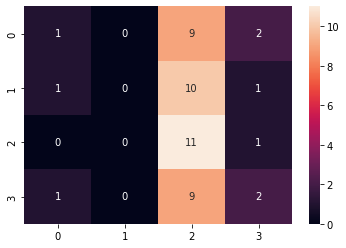

In [2]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

%run deepCNN.ipynb
#%run shallowCNN.ipynb
#%run EEGNet.ipynb
%run data_handler.ipynb


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# TODO: I must implement patience and run on more epochs. Best model was found on epoch 19 very often so there is potential for improvement.
#This is my 5-fold validation loop :D
def cross_validation_loop(LR = 0.001, epochs = 50, batch_size = 10):
    filename = "results/deepCNN_LR_epoch_noVal.txt"

    fil = open(filename, "a")
    fil.write("Experiment done on model {0}. \n Learning rate: {1} \n Optimizer: {2} \n Loss function: {3} \n Epochs: {6}, Batch size: {7} \n Experiments run on {4} interval with frequency {5} Hz on the data."
    .format("deepCNN", LR, "Adam", "NLLLoss", "full", 254, epochs, batch_size))
    fil.close()

    saved_models = []

    for subject_nr in range(1,11): # TODO: change this back
        subject_models = []
        print("Loading subject ", subject_nr)
        data, description = load_subject(subject_nr)
        data, description = get_innerspeech(data, description)
        # data_interval = extract_action_interval(data, hz = 254)
        labels = extract_labels(description)

        train_accuracies = []
        val_accuracies = []
        test_accuracies = []

        i = 0
        for train_index, test_index in kf.split(data, labels, labels):
            # New model
            model = DeepCNN(hz = 254, interval = "full").float().to(device)
            loss_func = nn.NLLLoss()
            op = optim.Adam(params = model.parameters(), lr = LR)

            # Choose train+val data/labels
            train_data=data[train_index]
            train_labels=labels[train_index]
            # Choose test data/labels
            test_data=data[test_index]
            test_labels=labels[test_index]

            # Move to device
            train_data, test_data, train_labels, test_labels = to_device_noval(train_data, test_data, train_labels, test_labels, device)
            # Train loop
            train_model(model, train_data = train_data, train_labels = train_labels, test_data = test_data, test_labels = test_labels, 
                        epochs = epochs, batch_size = batch_size, loss_func = loss_func, optimizer = op)
            # Save model
            subject_models.append(model)
            i += 1
            # Save accuracies
            train_accuracies.append(accuracy_check(model, train_data, train_labels))
            test_accuracies.append(accuracy_check(model, test_data, test_labels))
            cf = get_conf_matrix(model, test_data, test_labels)
            plt.show(sns.heatmap(cf, annot=True))
        
        saved_models.append(subject_models)
        # Write results for subject to file
        fil = open(filename, "a")
        fil.write("\n\nResults for subject {0}.\n".format(subject_nr))
        
        fil.write("Train accuracies from 5 folds:\n")
        for acc in train_accuracies:
            fil.write("{0}, ".format(acc))
        fil.write("\n")

        fil.write("Test accuracies from 5 folds:\n")
        for acc in test_accuracies:
            fil.write("{0}, ".format(acc))
        fil.write("\n")

        fil.write("Avg train acc: {0}, Avg test acc: {1}".format(sum(train_accuracies)/5, sum(test_accuracies)/5))
        fil.write("\n\n#####################################\n\n")
        fil.close()
    return saved_models
    


# LR 0.001
models1 = cross_validation_loop(epochs = 50, LR=0.001)
models2 = cross_validation_loop(epochs = 50, LR=0.0001)
models3 = cross_validation_loop(epochs = 50, LR=0.00001)

